<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-13/blob/main/Moringa_Core_Independent_Project_Week_13_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Definition**
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

#**Data Sourcing**
Data to be used for analysis is found <a href=http://bit.ly/EcommerceCustomersDataset>here</a> . The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

#**Experimental design taken**
 - Problem Definition
 - Data Sourcing
 - Check the Data
 - Perform Data Cleaning
 - Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
 - Implement the Solution
 - Challenge the Solution
 - Follow up Questions

#**Appropriateness of the available data**
The data provided for analysis is very appropriate since it contains different variables which will help in answering our research question.

#**Checking the Dataset.**

In [1]:
#Reading the dataset.
#Previewing the first 6 columns of the dataset.
library("data.table")
data = fread('http://bit.ly/EcommerceCustomersDataset')
head(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [2]:
#Previewing the last 6 columns of the dataset.
tail(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0                0                     1             0                     
2 3              145                     0             0                     
3 0                0                     0             0                     
4 0                0                     0             0                     
5 4               75                     0             0                     
6 0                0                     0             0                     
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1 16              503.000                0.000000000 0.03764706  0.00000  
2 53             1783.792                0.007142857 0.02903061 12.24172  
3  5              465.750                0.000000000 0.02133333  0.00000  
4  6              184.250                0.083333333 0.08666667  0.00000  
5 15              346.000                0.000000000 0.02105263  0.00000  
6  3               21.250                0.000000000 0.06666667  0.00000  
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Nov   2                2       1       1         
2 0          Dec   4                6       1       1         
3 0          Nov   3                2       1       8         
4 0          Nov   3                2       1      13         
5 0          Nov   2                2       3      11         
6 0          Nov   3                2       1       2         
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor  TRUE   FALSE  
3 Returning_Visitor  TRUE   FALSE  
4 Returning_Visitor  TRUE   FALSE  
5 Returning_Visitor FALSE   FALSE  
6 New_Visitor        TRUE   FALSE

In [3]:
#Checking the number of columns in the dataset.
ncol(data)

[1] 18

The dataset has 18 columns.

In [4]:
#Checking the number of rows in the dataset
nrow(data)

[1] 12330

The dataset has 12330 rows.

In [5]:
#Checking the dimensions of the dataset.
dim(data)

[1] 12330    18

In [6]:
#Checking the length of the dataset.
length(data)

[1] 18

In [7]:
#checking the summary of the dataset.
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [8]:
#Checking the structure of the dataset
str(data)

Classes ‘data.table’ and 'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Retu

In [9]:
#Listing variables in our dataset.
names(data)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [10]:
#Checking the column of the evenue column.
class(data$Revenue)

[1] "logical"

#**Cleaning the dataset.**


**Data Completeness.**

In [11]:
#Checking for null values.
#Finding the total missing values in each column
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [12]:
#Omitting the rows with null values
data_clean <-  na.omit(data)
colSums(is.na(data_clean))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [13]:
#Checking the dimensions of the new dataset without null values.
dim(data_clean)

[1] 12316    18

**Data Consistency**

In [14]:
#Checking for duplicated rows
anyDuplicated(data_clean)

[1] 159

The dataset has 159 duplicates.

In [15]:
# showing these unique items and assigning to a variable unique_items below
data_unique <- data_clean[!duplicated(data_clean), ]
data_unique

Administrative Administrative_Duration Informational
1     0               0.0                    0            
2     0               0.0                    0            
3     0              -1.0                    0            
4     0               0.0                    0            
5     0               0.0                    0            
6     0               0.0                    0            
7     0              -1.0                    0            
8     1              -1.0                    0            
9     0               0.0                    0            
10    0               0.0                    0            
11    0               0.0                    0            
12    0               0.0                    0            
13    0               0.0                    0            
14    0               0.0                    0            
15    0               0.0                    0            
16    2              53.0                    0            
17    0              -1.0                    0            
18    0               0.0                    0            
19    0               0.0                    0            
20    0               0.0                    0            
21    0               0.0                    0            
22    0              -1.0                    0            
23    0               0.0                    0            
24    0               0.0                    0            
25    0              -1.0                    0            
26    0               0.0                    0            
27    4              64.6                    0            
28    0               0.0                    0            
29    0               0.0                    0            
30    1               6.0                    1            
⋮     ⋮              ⋮                       ⋮            
12170 0                0.0000                0            
12171 0                0.0000                0            
12172 0                0.0000                0            
12173 0                0.0000                0            
12174 0                0.0000                0            
12175 0                0.0000                0            
12176 0                0.0000                0            
12177 2              305.1250                3            
12178 1               19.0000                0            
12179 3               54.0000                0            
12180 1                5.0000                0            
12181 1                0.0000                2            
12182 7              150.3571                1            
12183 3               16.0000                3            
12184 0                0.0000                0            
12185 0                0.0000                0            
12186 0                0.0000                0            
12187 3              100.5000                0            
12188 0                0.0000                0            
12189 0                0.0000                0            
12190 0                0.0000                0            
12191 0                0.0000                0            
12192 6               76.2500                0            
12193 2               64.7500                0            
12194 0                0.0000                1            
12195 3              145.0000                0            
12196 0                0.0000                0            
12197 0                0.0000                0            
12198 4               75.0000                0            
12199 0                0.0000                0            
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
1      0                      1                0.000000             0.200000000
2      0                      2               64.000000             0.000000000
3     -1                      1               -1.000000             0.200000000
4      0                    

In [16]:
#Checking to see if duplicates have been dropped.
dim(data_unique)

[1] 12199    18

In [17]:
#Changing the column names to lowercase
names(data_unique)[names(data_unique) == "Administrative"] <- "administrative"
names(data_unique)[names(data_unique) == "Administrative_Duration"] <- "administrative_duration"
names(data_unique)[names(data_unique) == "Informational"] <- "informational"
names(data_unique)[names(data_unique) == "Informational_Duration"] <- "informational_duration"
names(data_unique)[names(data_unique) == "ProductRelated"] <- "productrelated"
names(data_unique)[names(data_unique) == "ProductRelated_Duration"] <- "productrelated_duration"
names(data_unique)[names(data_unique) == "BounceRates"] <- "bouncerates"
names(data_unique)[names(data_unique) == "ExitRates"] <- "exitrates"
names(data_unique)[names(data_unique) == "PageValues"] <- "pagevalues"
names(data_unique)[names(data_unique) == "SpecialDay"] <- "specialday"
names(data_unique)[names(data_unique) == "Month"] <- "month"
names(data_unique)[names(data_unique) == "OperatingSystems"] <- "operatingsystems"
names(data_unique)[names(data_unique) == "Browser"] <- "browser"
names(data_unique)[names(data_unique) == "Region"] <- "region"
names(data_unique)[names(data_unique) == "TrafficType"] <- "traffictype"
names(data_unique)[names(data_unique) == "VisitorType"] <- "visitortype"
names(data_unique)[names(data_unique) == "Weekend"] <- "weekend"
names(data_unique)[names(data_unique) == "Revenue"] <- "revenue"
head(data_unique)

administrative administrative_duration informational informational_duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  productrelated productrelated_duration bouncerates exitrates pagevalues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  specialday month operatingsystems browser region traffictype
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  visitortype       weekend revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [18]:
#Checking if the column names have changed to lower case.
names(data_unique)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

**Data Validity**

In [19]:
#Converting the categorical columns to their appropriate data types.
data_unique$operatingsystems <- as.factor(data_unique$operatingsystems)
data_unique$browser <- as.factor(data_unique$browser)
data_unique$region <- as.factor(data_unique$region)
data_unique$traffictype <- as.factor(data_unique$traffictype)
data_unique$weekend <- as.factor(data_unique$weekend)
data_unique$revenue <- as.factor(data_unique$revenue)
data_unique$month <- as.factor(data_unique$month)
data_unique$visitortype <- as.factor(data_unique$visitortype)

In [20]:
#Checking if the data types have been corrected.
str(data_unique)

Classes ‘data.table’ and 'data.frame':	12199 obs. of  18 variables:
 $ administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num  0 64 -1 2.67 627.5 ...
 $ bouncerates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ operatingsystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1

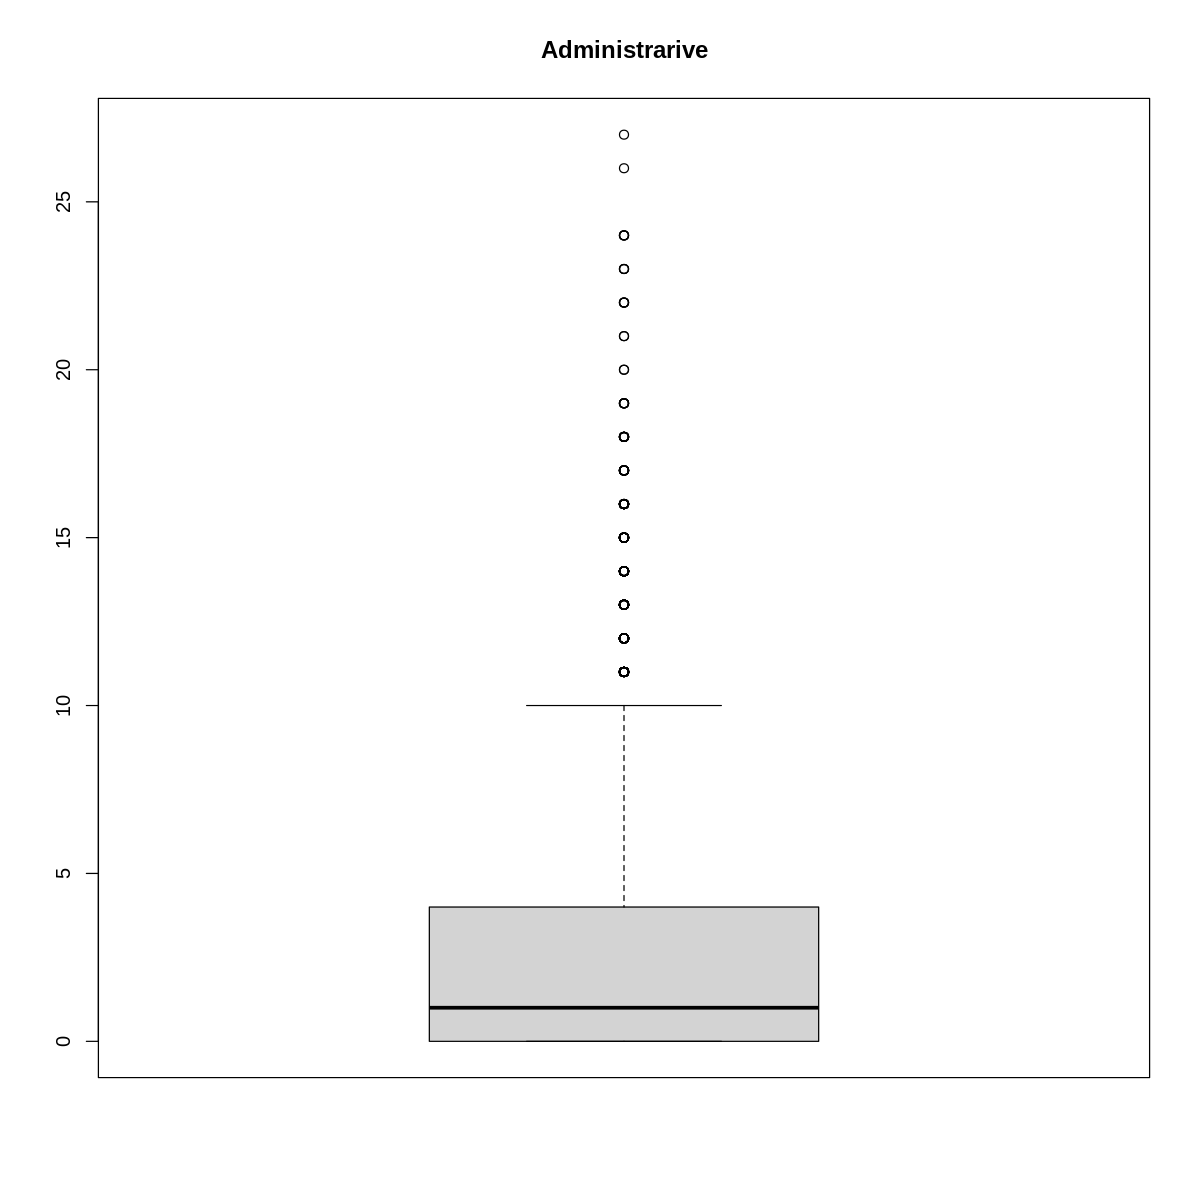

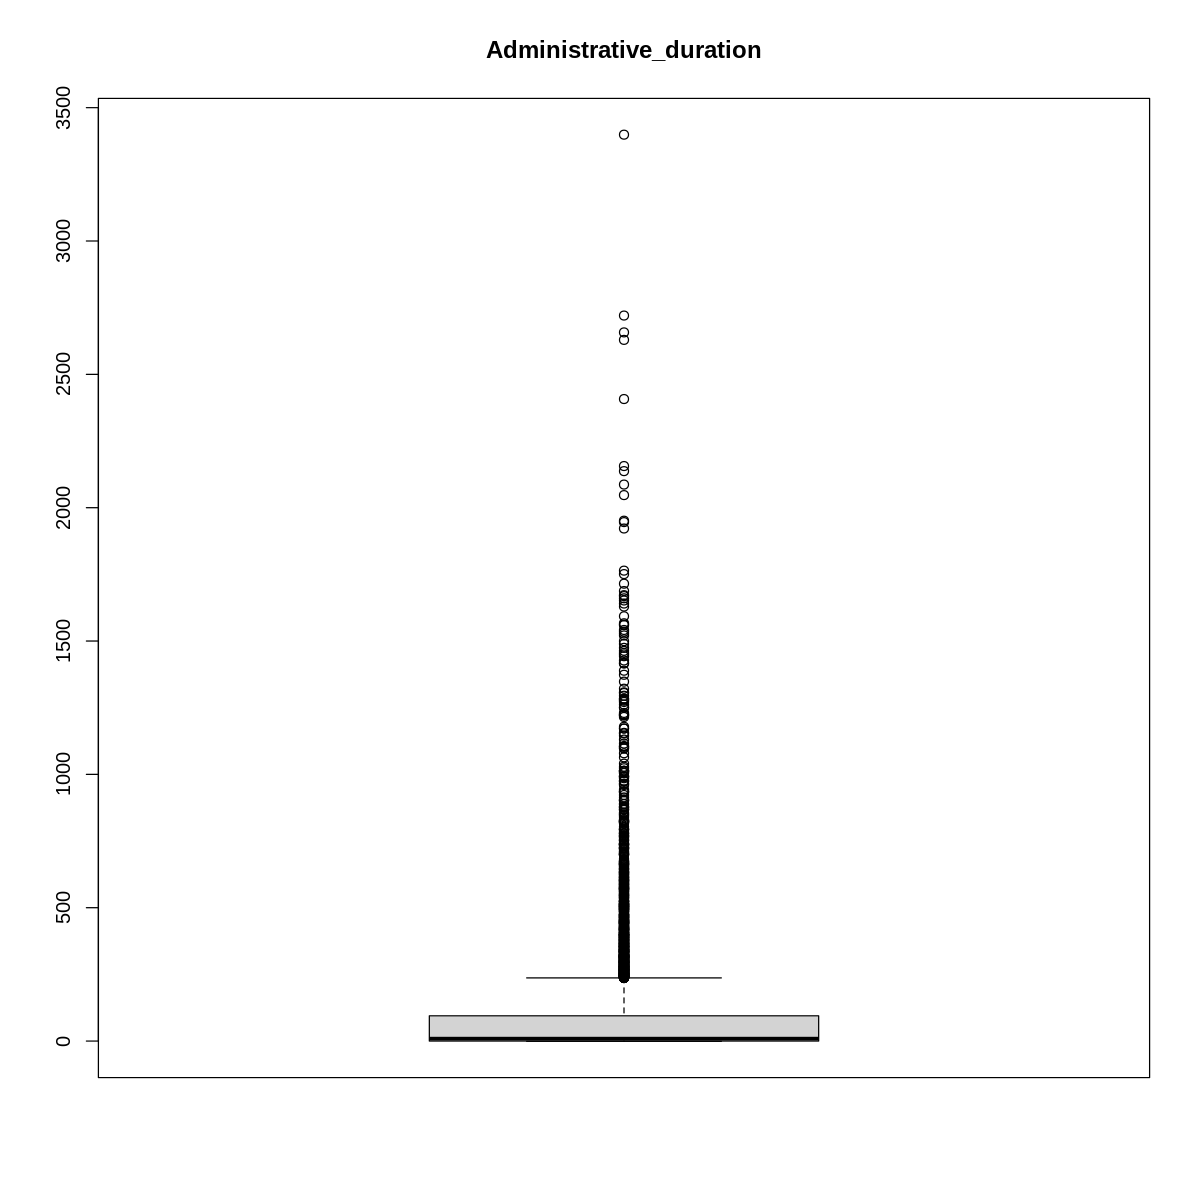

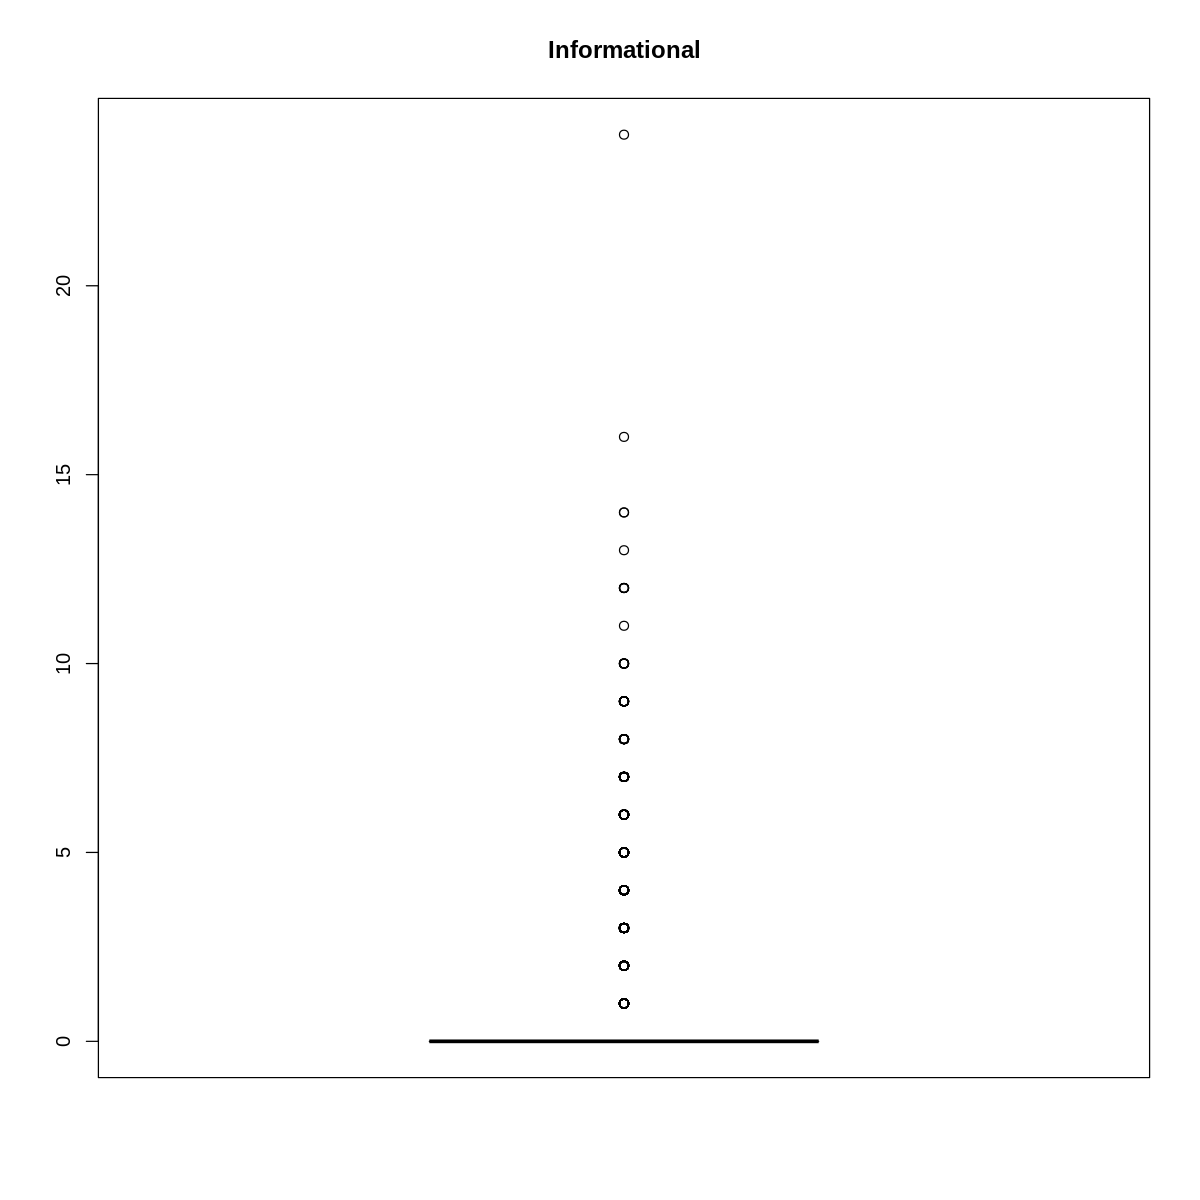

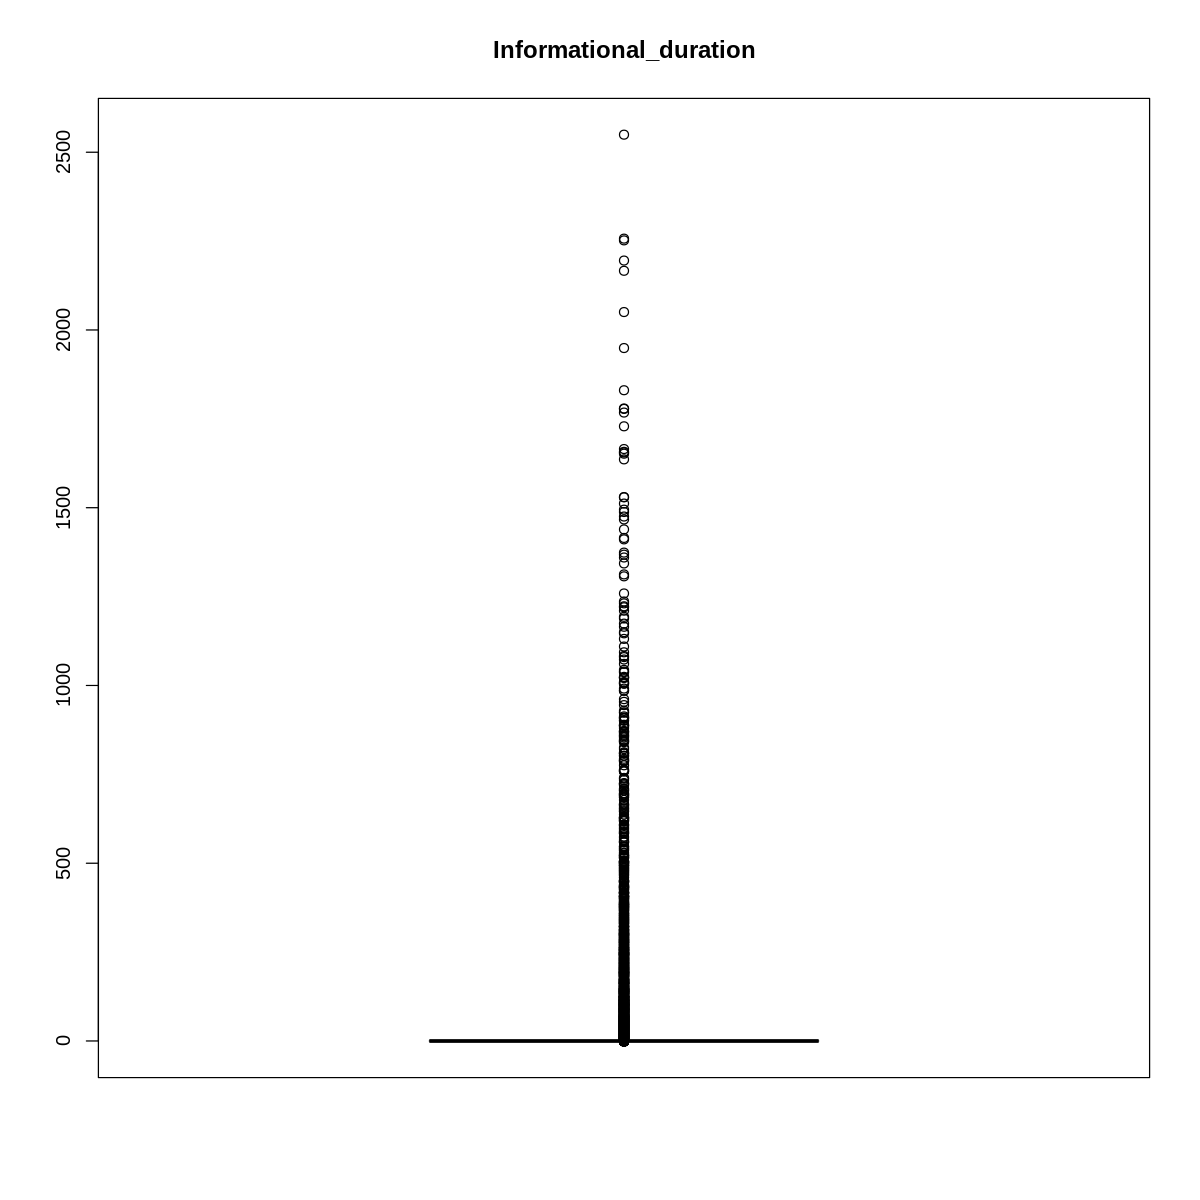

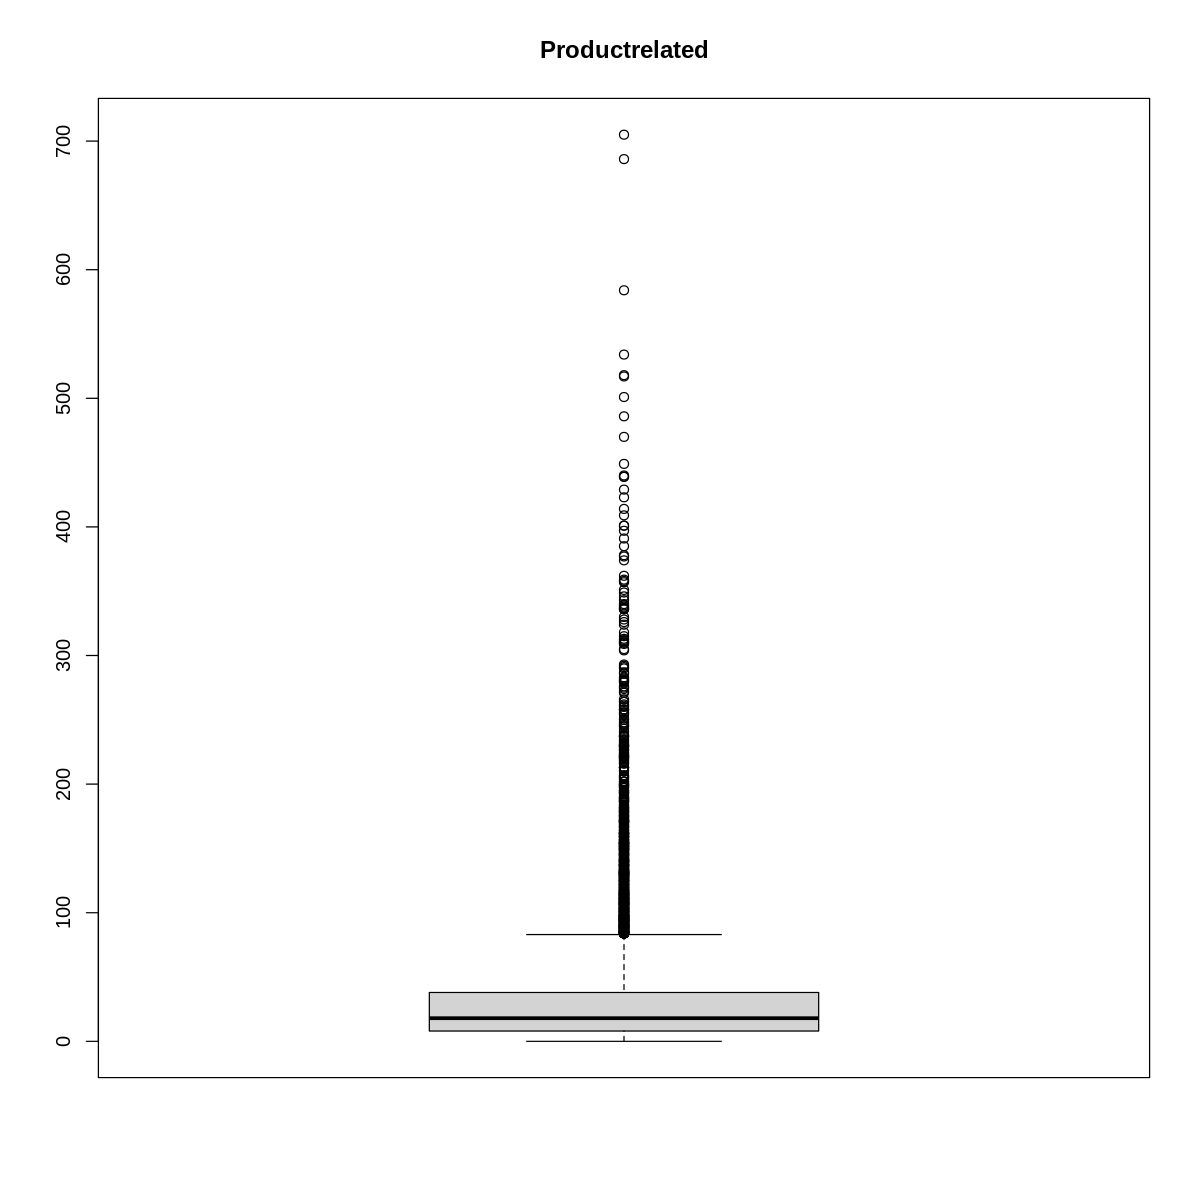

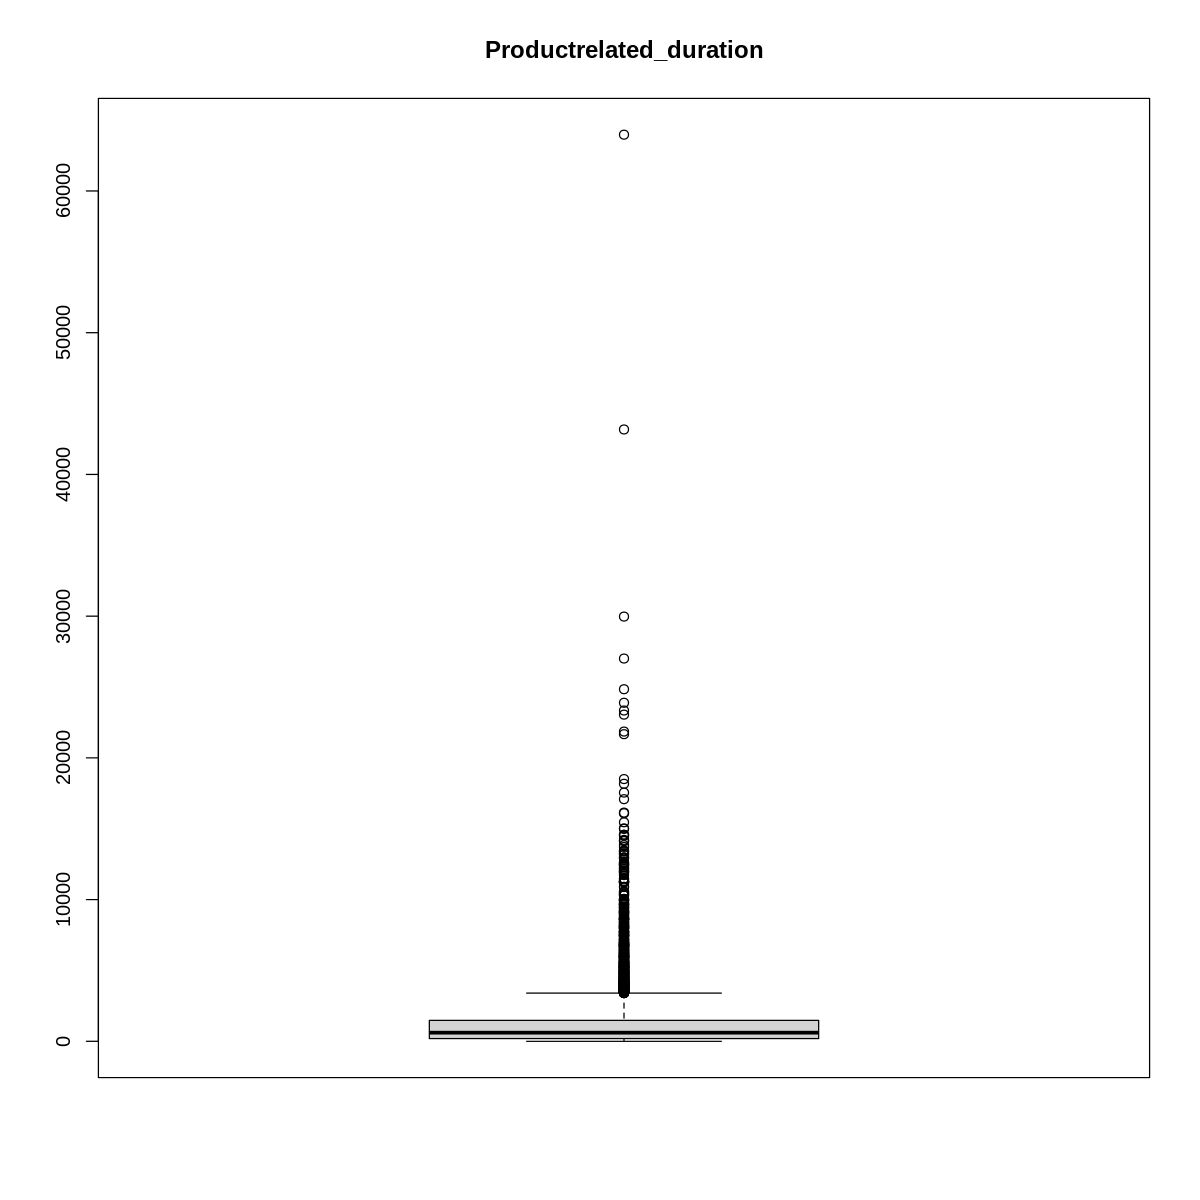

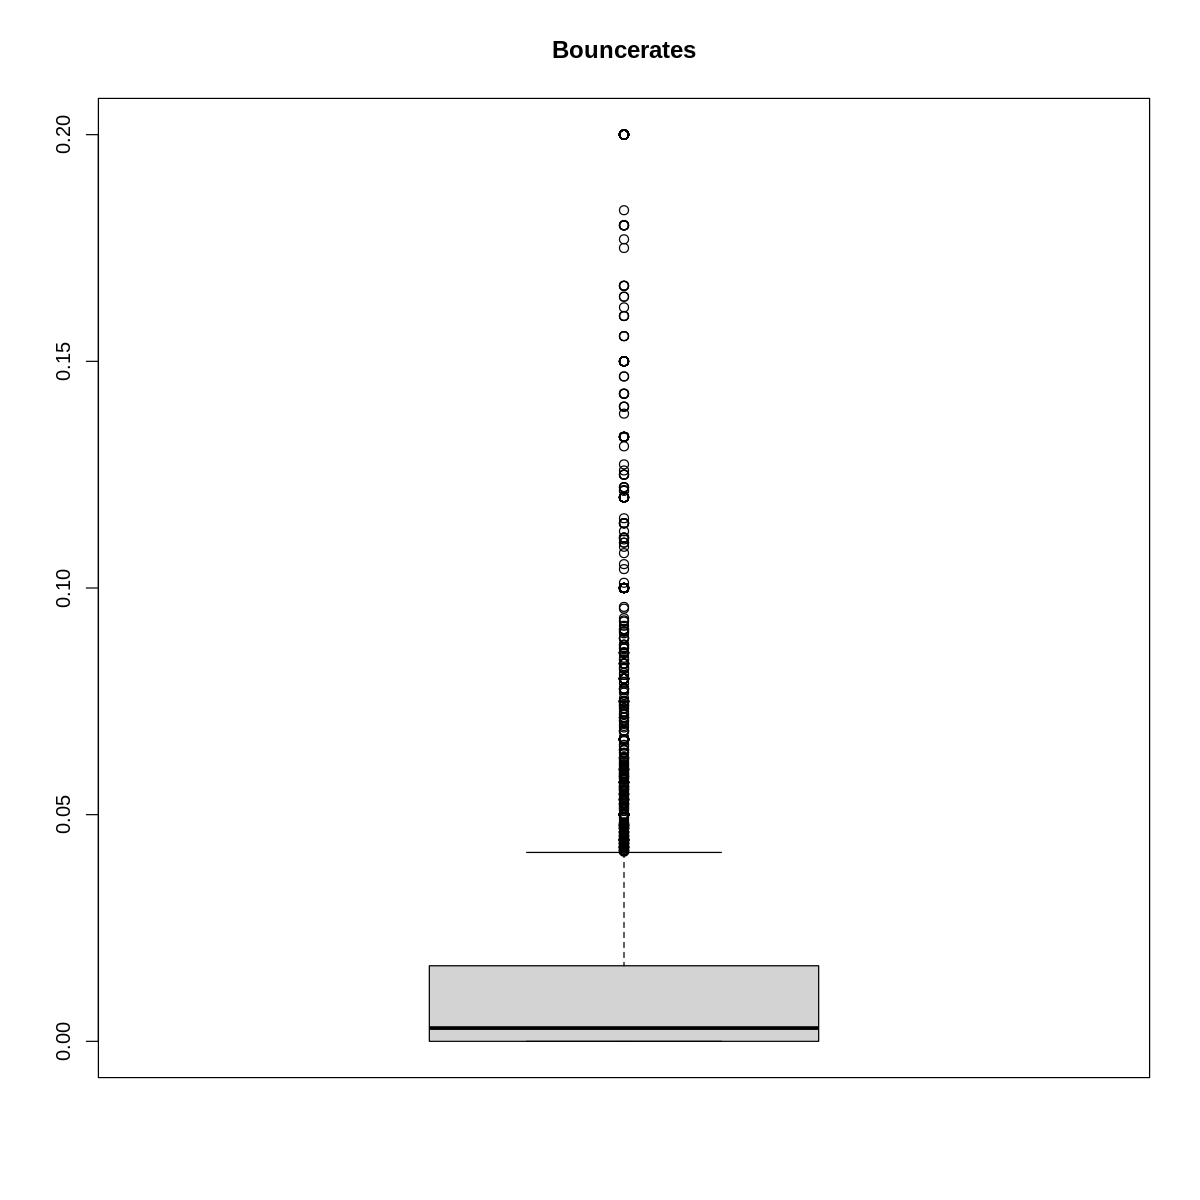

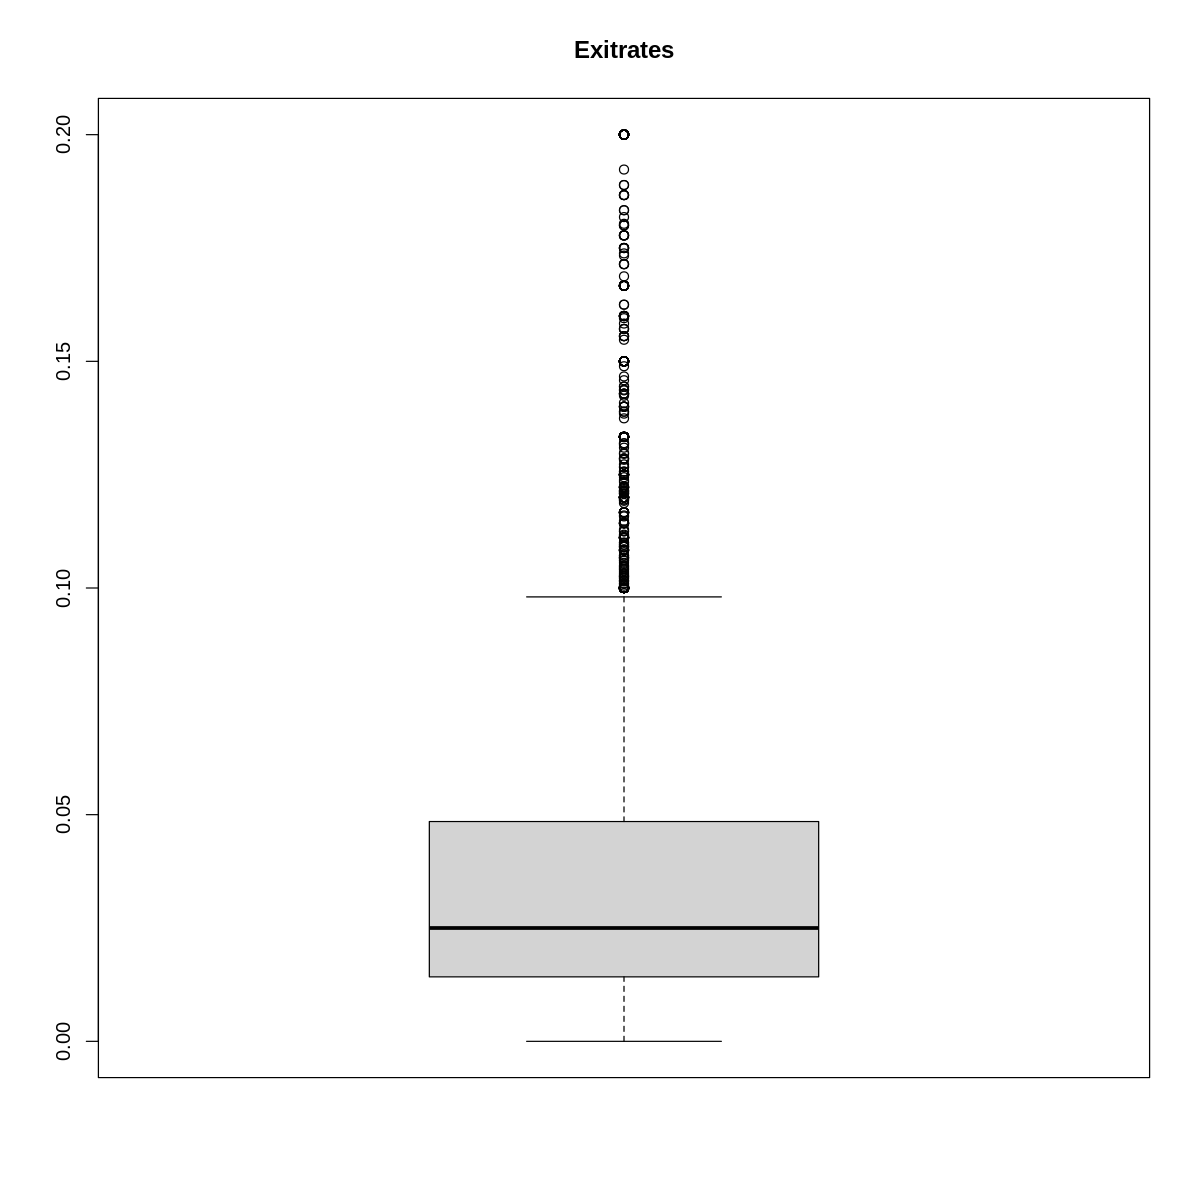

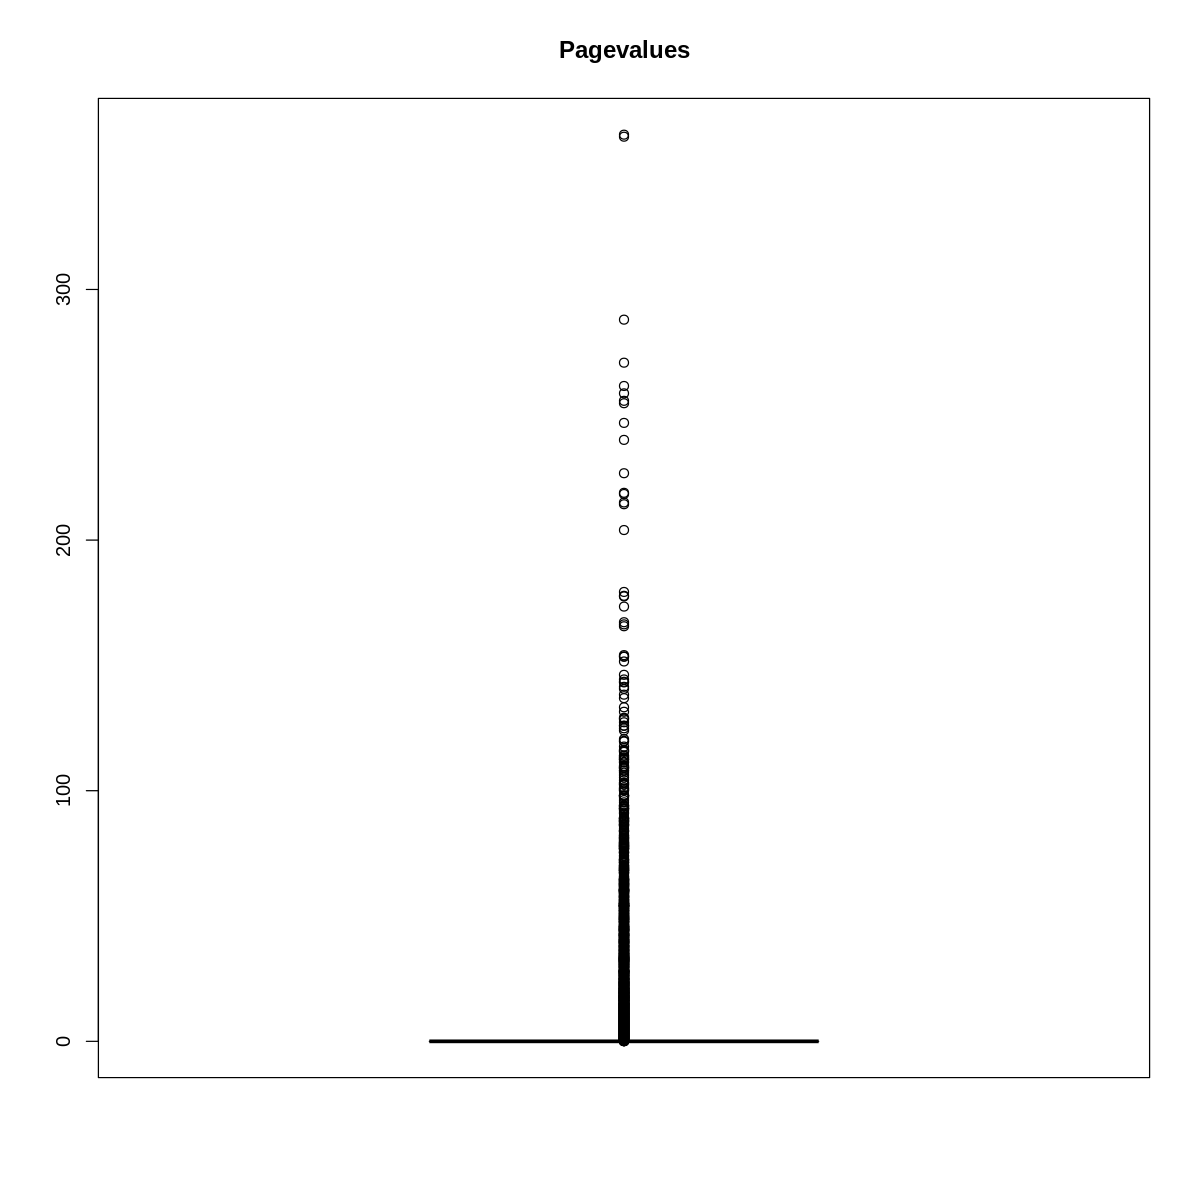

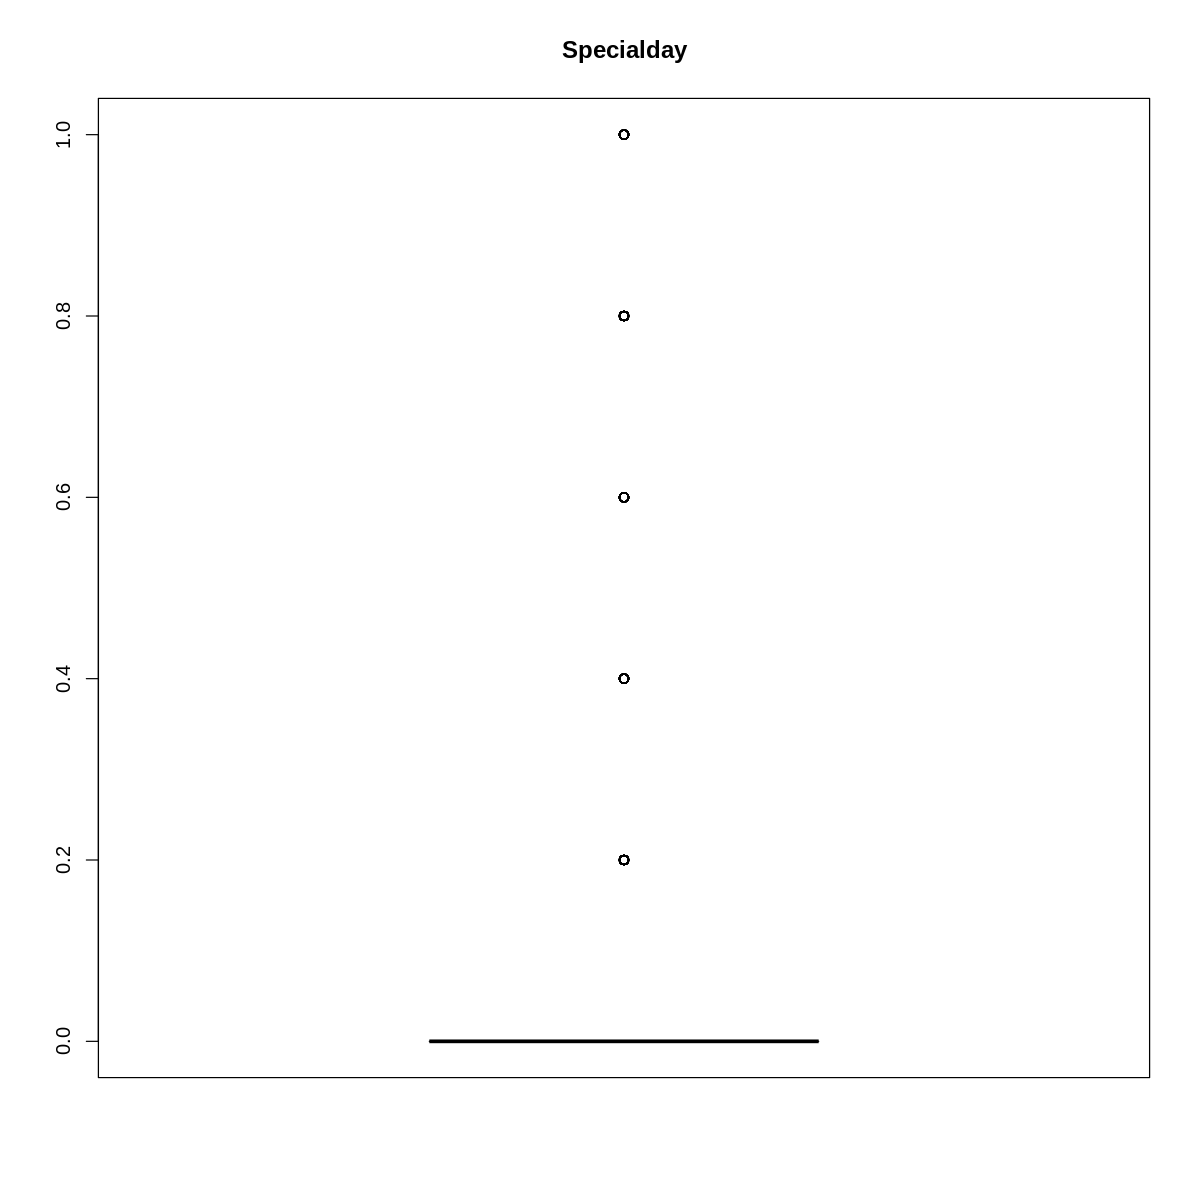

In [21]:
#Checking for outliers in the numerical variables.
options(repr.plot.width = 10, repr.plot.height = 10)
boxplot(data_unique$administrative, main = 'Administrarive')
boxplot(data_unique$administrative_duration, main = 'Administrative_duration')
boxplot(data_unique$informational, main = 'Informational')
boxplot(data_unique$informational_duration, main = 'Informational_duration') 
boxplot(data_unique$productrelated, main = 'Productrelated')
boxplot(data_unique$productrelated_duration, main = 'Productrelated_duration') 
boxplot(data_unique$bouncerates, main = 'Bouncerates') 
boxplot(data_unique$exitrates, main = 'Exitrates')
boxplot(data_unique$pagevalues, main = 'Pagevalues')
boxplot(data_unique$specialday, main = 'Specialday')

We have many outliers in our dataset. 

In [22]:
#Checking for anomalies in the operating system column 
levels(data_unique$operatingsystems)

[1] "1" "2" "3" "4" "5" "6" "7" "8"

In [ ]:
There are no anomalies in this column.

In [23]:
#Checking for anomalies in the Browser column 
levels(data_unique$browser)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13"

There are no anomalies.

In [24]:
#Checking for anomalies in the region column 
levels(data_unique$region)

[1] "1" "2" "3" "4" "5" "6" "7" "8" "9"

There are no anomalies.

In [25]:
#Checking for anomalies in the traffictype column 
levels(data_unique$traffictype)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20"

There are no anomalies.

In [26]:
#Checking for anomalies in the weekend column 
levels(data_unique$weekend)

[1] "FALSE" "TRUE"

There are no anomalies.

In [27]:
#Checking for anomalies in the revenue column 
levels(data_unique$revenue)

[1] "FALSE" "TRUE"

There are no anomalies.

In [28]:
#Checking for anomalies in the month column 
levels(data_unique$month)

[1] "Aug"  "Dec"  "Feb"  "Jul"  "June" "Mar"  "May"  "Nov"  "Oct"  "Sep"

There are no anomalies.

In [29]:
#Checking for anomalies in the visitortype column 
levels(data_unique$visitortype)

[1] "New_Visitor"       "Other"             "Returning_Visitor"

There are no anomalies.

#**Univariate Analysis**

##**Measures of central tendency and Measures of dispersion.**

In [30]:
#Checking the summary of different variables in the dataset.
summary(data_unique)

 administrative  administrative_duration informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 informational_duration productrelated   productrelated_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  bounce

In [31]:
#Checking the description of different variables in the dataset.
install.packages("psych")
library("psych")
describe(data_unique)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




vars n     mean         sd           median      
administrative           1   12199 2.340028e+00 3.330851e+00 1.000000e+00
administrative_duration  2   12199 8.168214e+01 1.775282e+02 9.000000e+00
informational            3   12199 5.088122e-01 1.275817e+00 0.000000e+00
informational_duration   4   12199 3.483734e+01 1.414585e+02 0.000000e+00
productrelated           5   12199 3.205845e+01 4.460091e+01 1.800000e+01
productrelated_duration  6   12199 1.207508e+03 1.919927e+03 6.095417e+02
bouncerates              7   12199 2.044674e-02 4.540250e-02 2.930403e-03
exitrates                8   12199 4.149678e-02 4.624716e-02 2.500000e-02
pagevalues               9   12199 5.952500e+00 1.865779e+01 0.000000e+00
specialday              10   12199 6.197229e-02 1.997106e-01 0.000000e+00
month*                  11   12199 6.167965e+00 2.374870e+00 7.000000e+00
operatingsystems*       12   12199 2.124354e+00 9.069856e-01 2.000000e+00
browser*                13   12199 2.358144e+00 1.710578e+00 2.000000e+00
region*                 14   12199 3.153291e+00 2.402439e+00 3.000000e+00
traffictype*            15   12199 4.074596e+00 4.015813e+00 2.000000e+00
visitortype*            16   12199 2.715796e+00 6.935669e-01 3.000000e+00
weekend*                17   12199 1.234118e+00 4.234634e-01 1.000000e+00
revenue*                18   12199 1.156406e+00 3.632550e-01 1.000000e+00
                        trimmed      mad          min max        range     
administrative          1.656593e+00 1.482600e+00  0     27.0000    27.0000
administrative_duration 4.286683e+01 1.334340e+01 -1   3398.7500  3399.7500
informational           1.824608e-01 0.000000e+00  0     24.0000    24.0000
informational_duration  3.726866e+00 0.000000e+00 -1   2549.3750  2550.3750
productrelated          2.305573e+01 1.927380e+01  0    705.0000   705.0000
productrelated_duration 8.323577e+02 7.451177e+02 -1  63973.5222 63974.5222
bouncerates             8.135649e-03 4.344615e-03  0      0.2000     0.2000
exitrates               3.131007e-02 2.059167e-02  0      0.2000     0.2000
pagevalues              1.331972e+00 0.000000e+00  0    361.7637   361.7637
specialday              6.146911e-04 0.000000e+00  0      1.0000     1.0000
month*                  6.356009e+00 1.482600e+00  1     10.0000     9.0000
operatingsystems*       2.058088e+00 0.000000e+00  1      8.0000     7.0000
browser*                2.004098e+00 0.000000e+00  1     13.0000    12.0000
region*                 2.794181e+00 2.965200e+00  1      9.0000     8.0000
traffictype*            3.224465e+00 1.482600e+00  1     20.0000    19.0000
visitortype*            2.894580e+00 0.000000e+00  1      3.0000     2.0000
weekend*                1.167708e+00 0.000000e+00  1      2.0000     1.0000
revenue*                1.070587e+00 0.000000e+00  1      2.0000     1.0000
                        skew       kurtosis    se          
administrative           1.9460087   4.6348537 3.015735e-02
administrative_duration  5.5895226  50.0851812 1.607330e+00
informational            4.0129580  26.6376802 1.155118e-02
informational_duration   7.5365079  75.4512246 1.280758e+00
productrelated           4.3316012  31.0434452 4.038142e-01
productrelated_duration  7.2505117 136.5679069 1.738292e+01
bouncerates              3.1524863   9.2530550 4.110718e-04
exitrates                2.2328507   4.6230025 4.187193e-04
pagevalues               6.3478824  64.9291691 1.689266e-01
specialday               3.2840768   9.7839577 1.808169e-03
month*                  -0.8323355  -0.3734310 2.150195e-02
operatingsystems*        2.0317047  10.2666928 8.211799e-03
browser*                 3.2152573  12.5340432 1.548748e-02
region*                  0.9786100  -0.1602703 2.175155e-02
traffictype*             1.9582813   3.4650674 3.635895e-02
visitortype*            -2.0496869   2.2296982 6.279517e-03
weekend*                 1.2556489  -0.4233805 3.834014e-03
revenue*                 1.8915947   1.5782599 3.288891e-03

##**Univariate graphs**

In [32]:
#Frequency table of the revenue column.
revenue <- data_unique$revenue
revenue_frequency <- table(revenue)
revenue_frequency

revenue
FALSE  TRUE 
10291  1908 

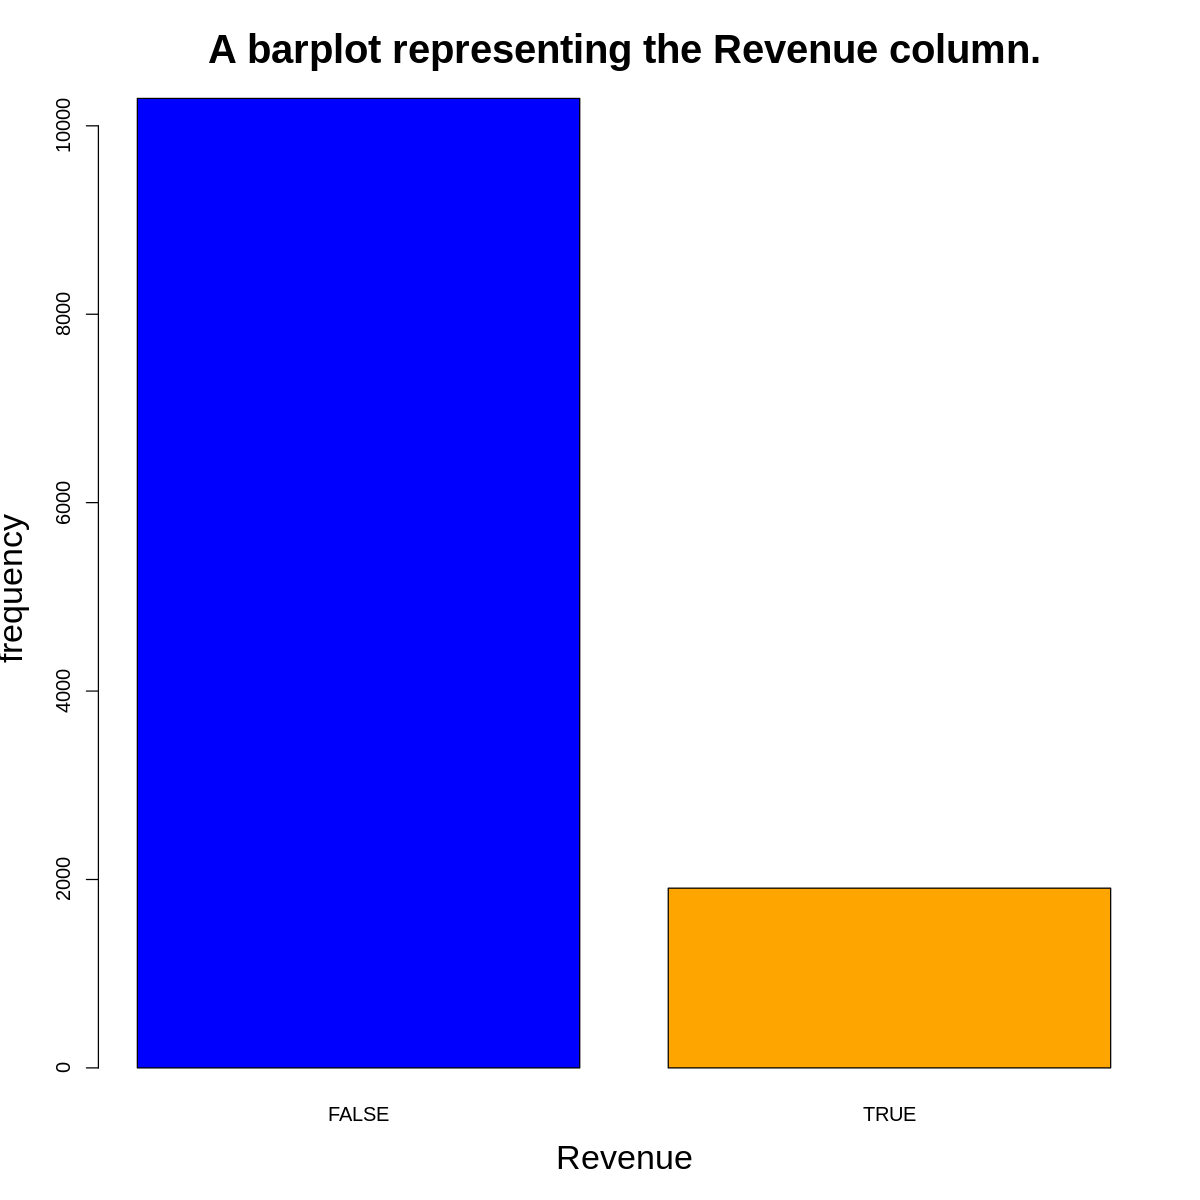

In [33]:
#Bar graph representing revenue frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(revenue_frequency), main="A barplot representing the Revenue column.",
        xlab="Revenue",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

From the frequency table and the bar chart we can observe that there are more false revenues than true revenues.

In [34]:
#Frequency table of the operating systems column.
operatingsystems <- data_unique$operatingsystems
os_frequency <- table(operatingsystems)
os_frequency

operatingsystems
   1    2    3    4    5    6    7    8 
2548 6536 2530  478    6   19    7   75 

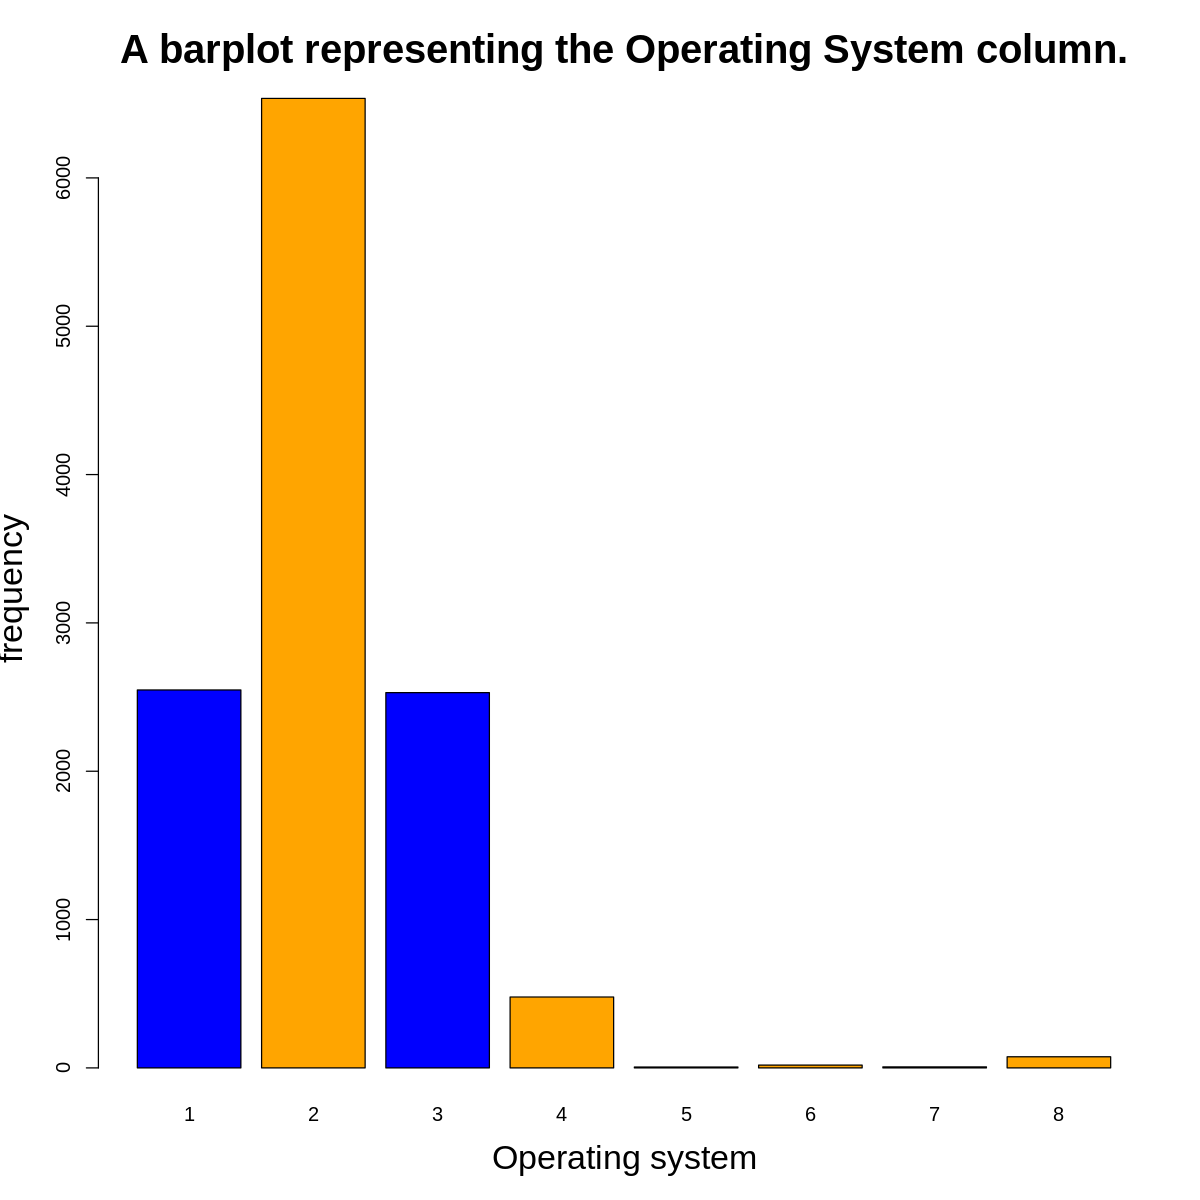

In [35]:
#Bar graph representing operating systems frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(os_frequency), main="A barplot representing the Operating System column.",
        xlab="Operating system",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Operation system 2 is the most used operating system followed by operation system 1 and then 3.

In [36]:
#Frequency table of the browser column.
browser <- data_unique$browser
browser_frequency <- table(browser)
browser_frequency

browser
   1    2    3    4    5    6    7    8    9   10   11   12   13 
2426 7878  105  730  466  174   49  135    1  163    6   10   56 

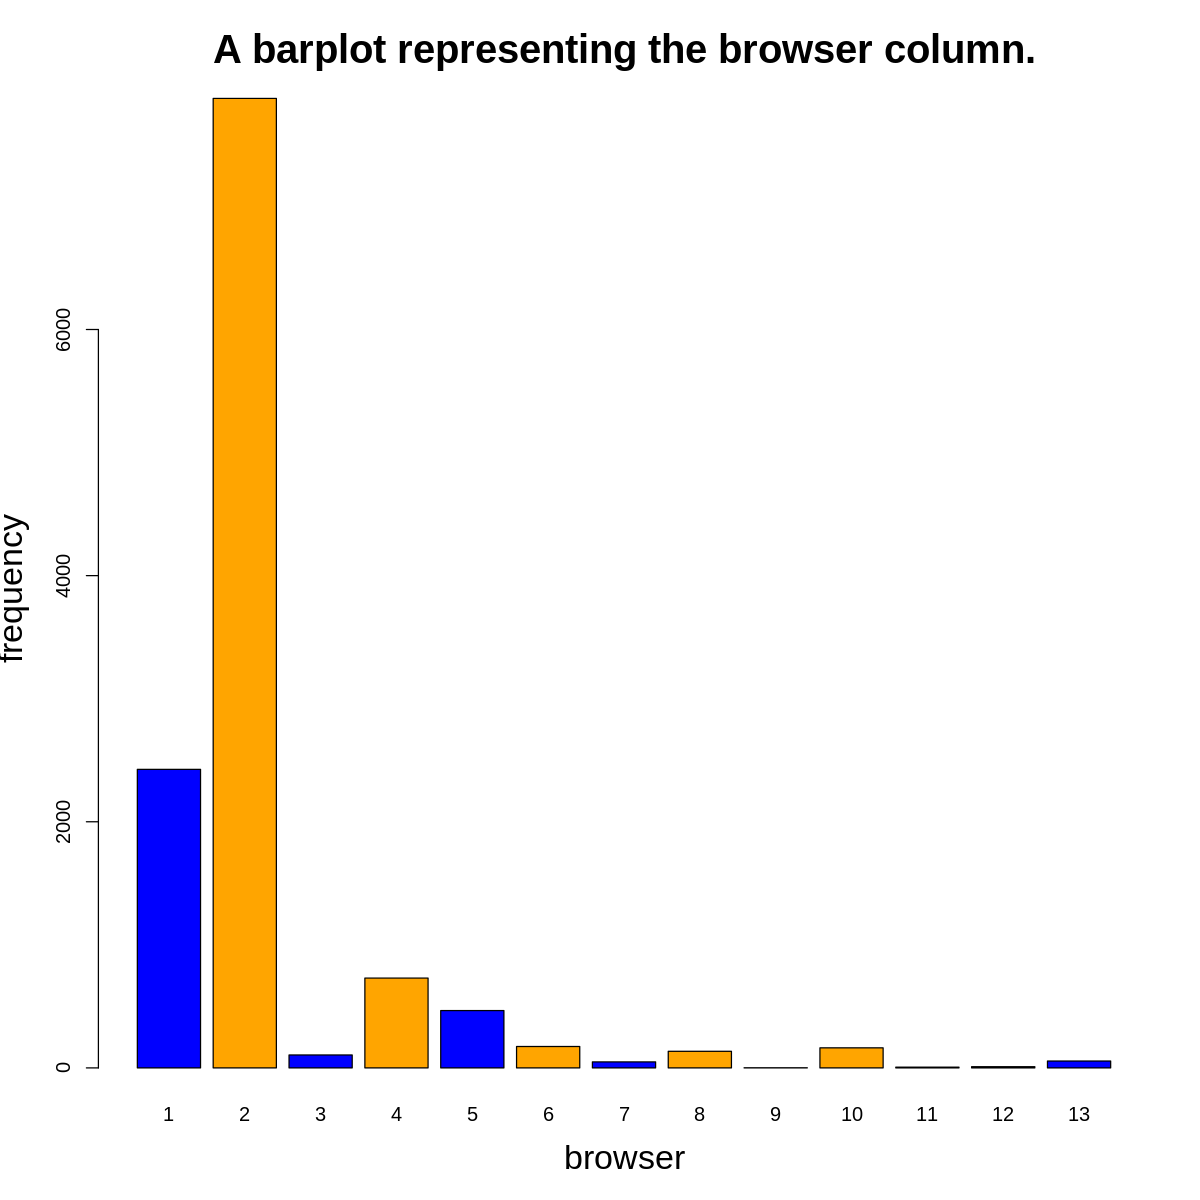

In [37]:
#Bar graph representing browser frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(browser_frequency), main="A barplot representing the browser column.",
        xlab="browser",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Browser 2 is the most frequently used browser followed by browser 1.

In [38]:
#Frequency table of the region column.
region <- data_unique$region
region_frequency <- table(region)
region_frequency

region
   1    2    3    4    5    6    7    8    9 
4711 1127 2382 1168  317  800  758  431  505 

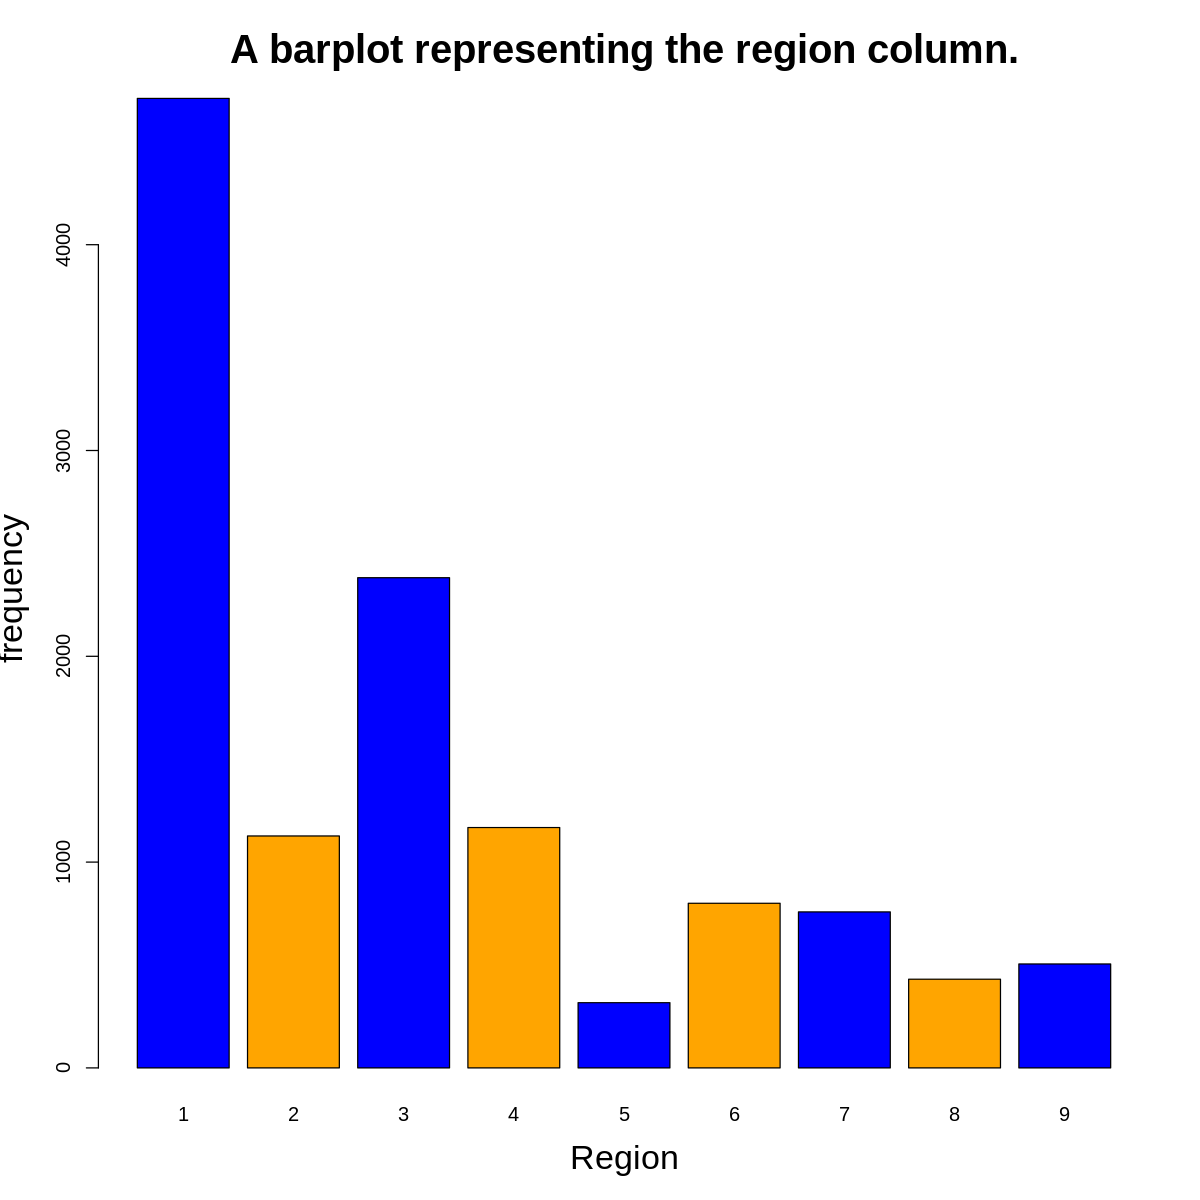

In [39]:
#Bar graph representing region frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(region_frequency), main="A barplot representing the region column.",
        xlab="Region",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Region 1 is the most occurring region while region 5 is the least occuring region.

In [40]:
#Frequency table of the traffic type column.
traffictype <- data_unique$traffictype
tt_frequency <- table(traffictype)
tt_frequency

traffictype
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2383 3907 2017 1066  260  443   40  343   41  450  247    1  728   13   36    3 
  17   18   19   20 
   1   10   17  193 

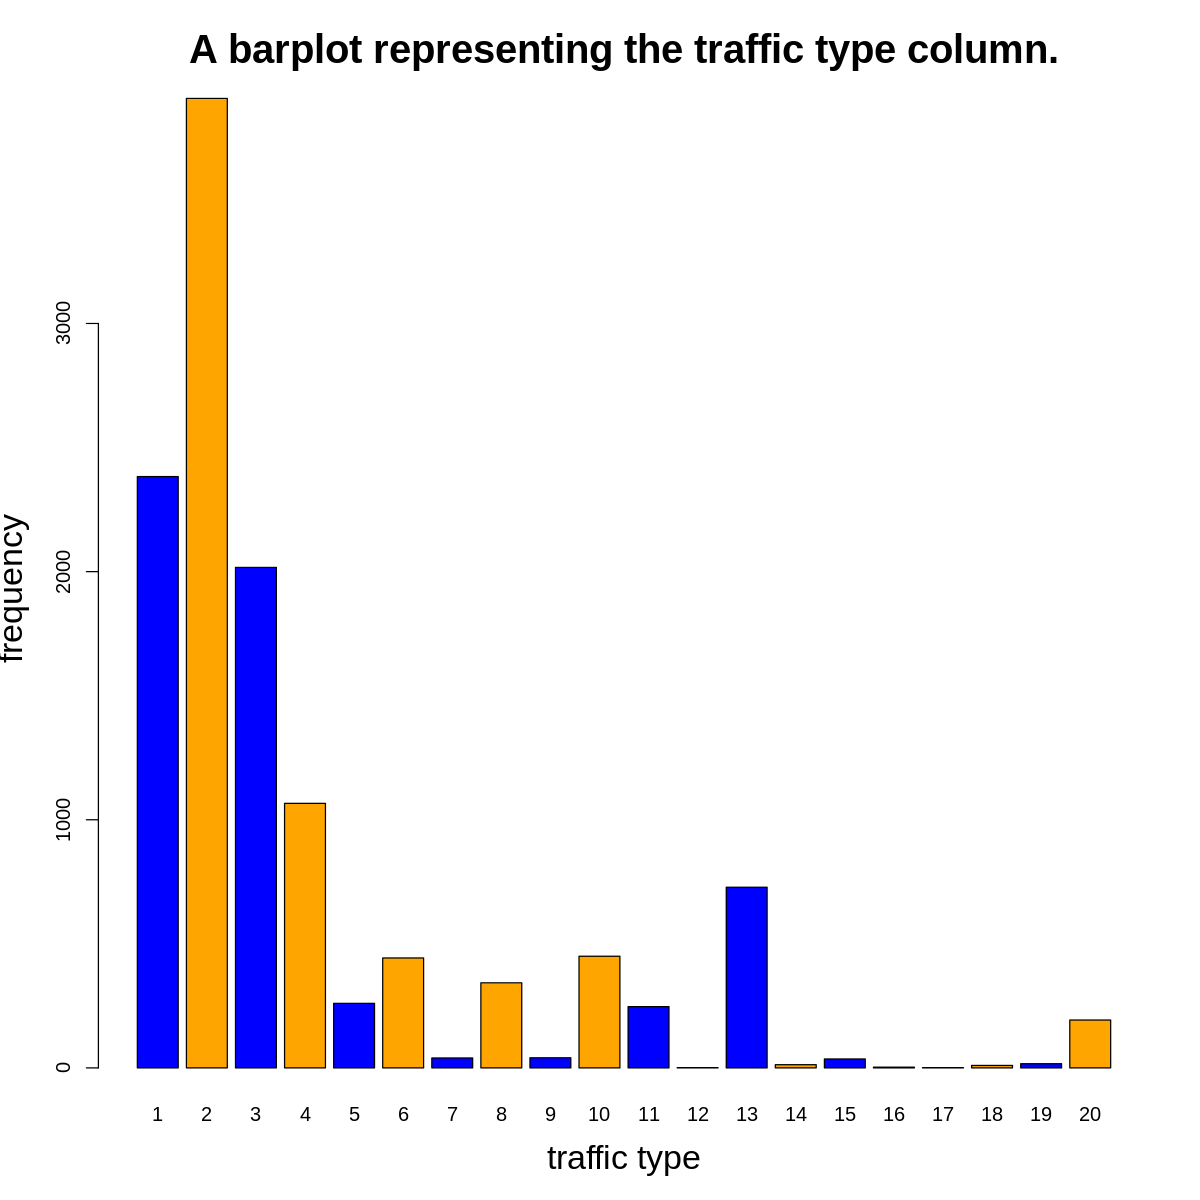

In [41]:
#Bar graph representing Traffic type frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(tt_frequency), main="A barplot representing the traffic type column.",
        xlab="traffic type",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Traffic type two is the most frequent used followed by traffic type 1.

In [42]:
#Frequency table of the weekend column.
weekend <- data_unique$weekend
weekend_frequency <- table(weekend)
weekend_frequency

weekend
FALSE  TRUE 
 9343  2856 

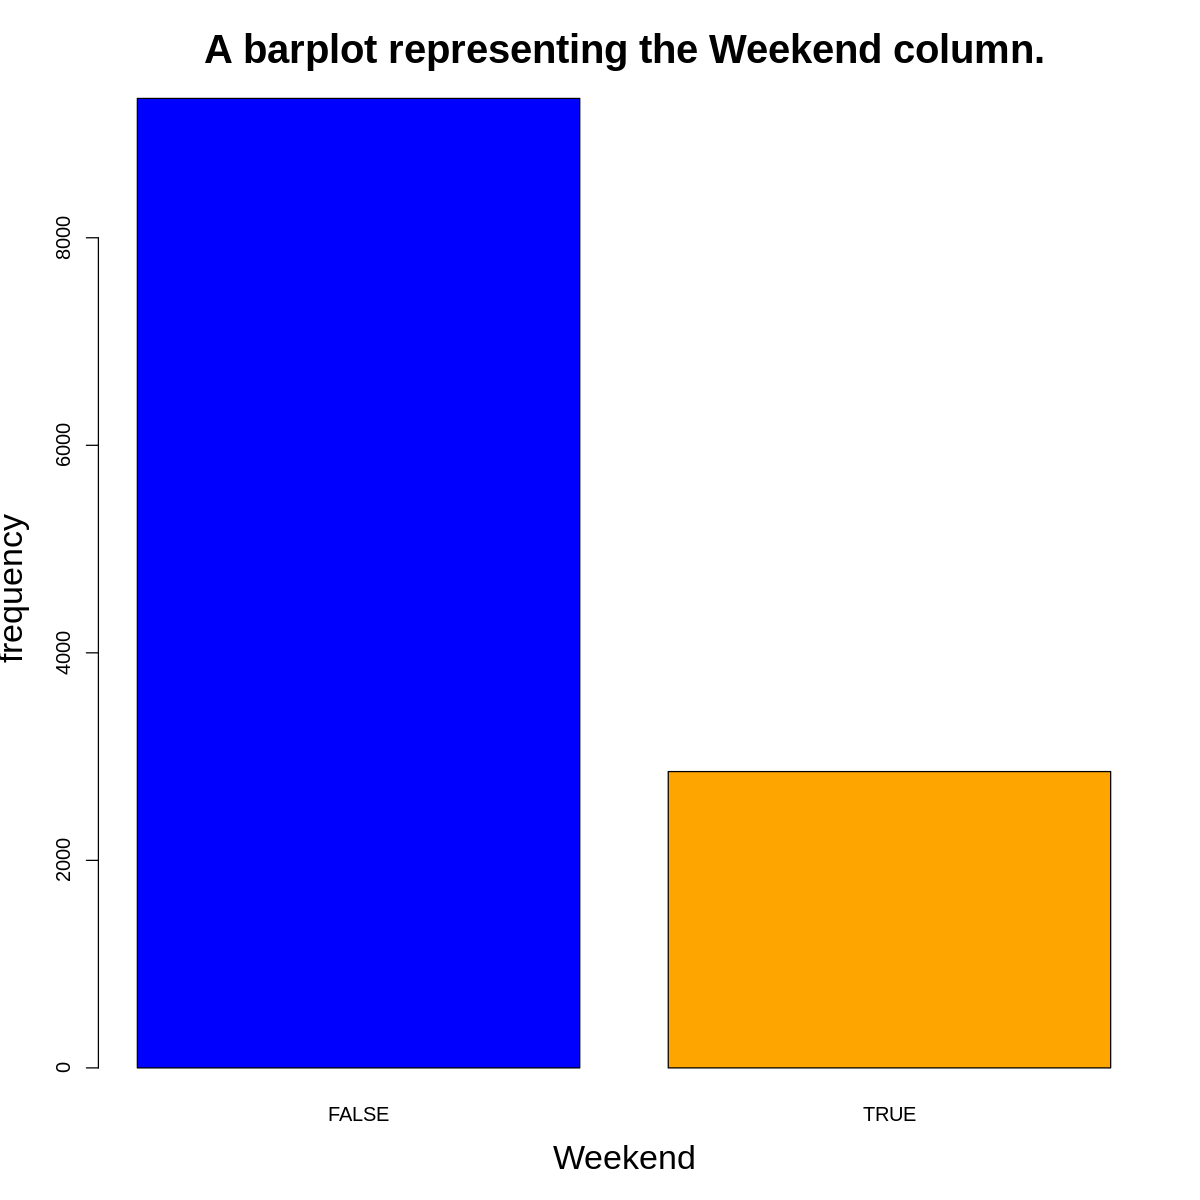

In [43]:
#Bar graph representing Weekend frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(weekend_frequency), main="A barplot representing the Weekend column.",
        xlab="Weekend",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Weekdays are more than weekends.

In [44]:
#Frequency table of the month column
month <- data_unique$month
month_frequency <- table(month)
month_frequency

month
 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1706  182  432  285 1853 3328 2983  549  448 

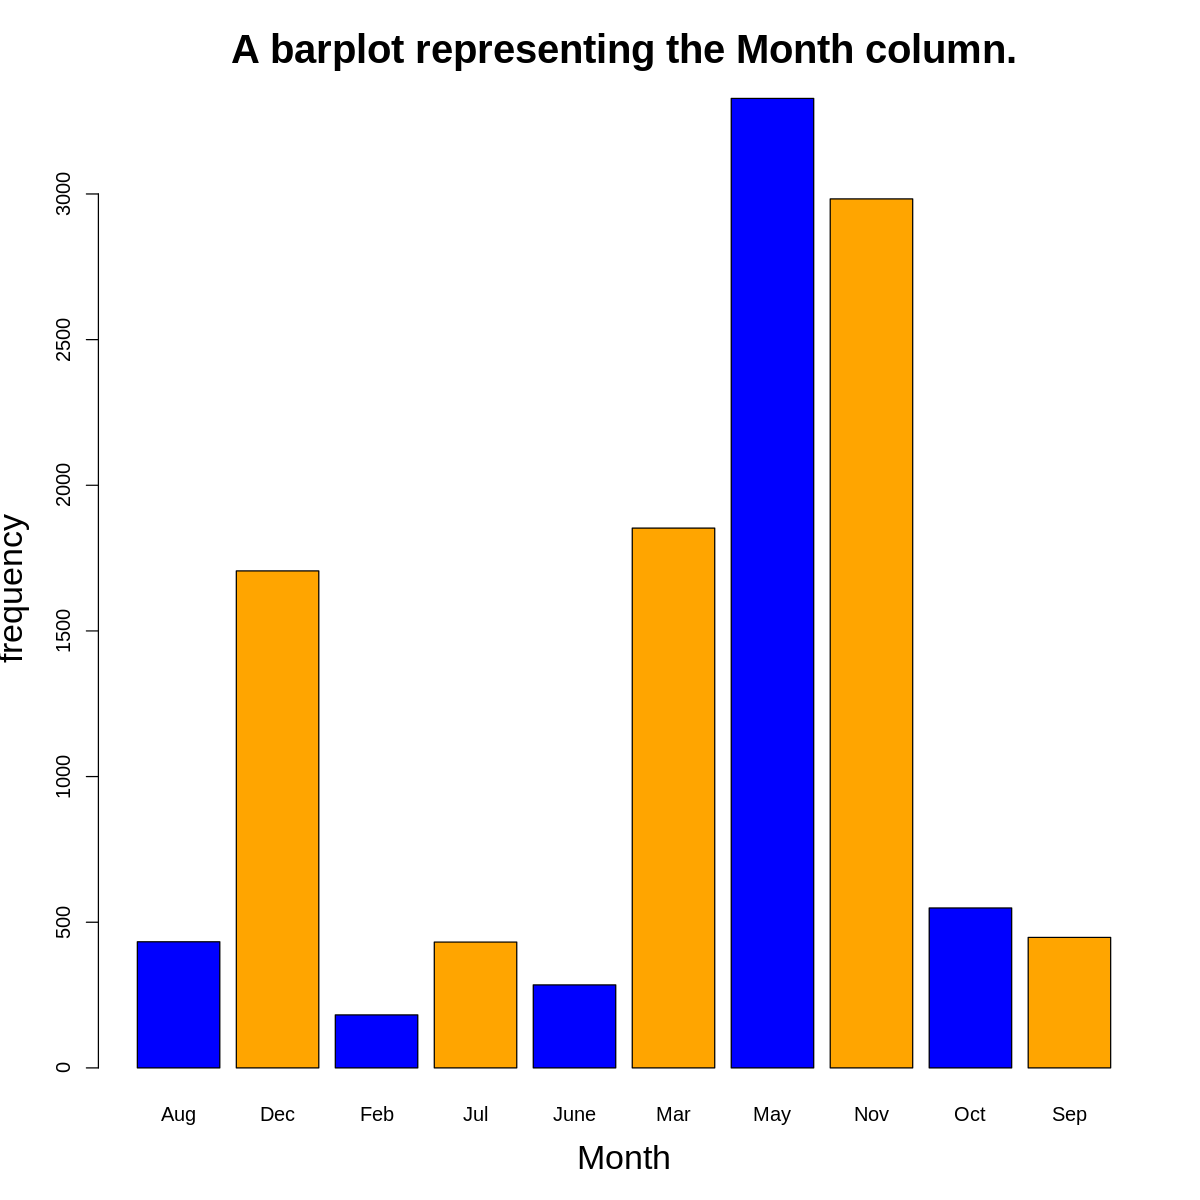

In [45]:
#Bar graph representing Month frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(month_frequency), main="A barplot representing the Month column.",
        xlab="Month",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

The most frequent month was May followed by November. The least frequent month is February.

In [46]:
#Frequency table of the visitor type column.
visitortype <- data_unique$visitortype
visitortype_frequency <- table(visitortype)
visitortype_frequency

visitortype
      New_Visitor             Other Returning_Visitor 
             1693                81             10425 

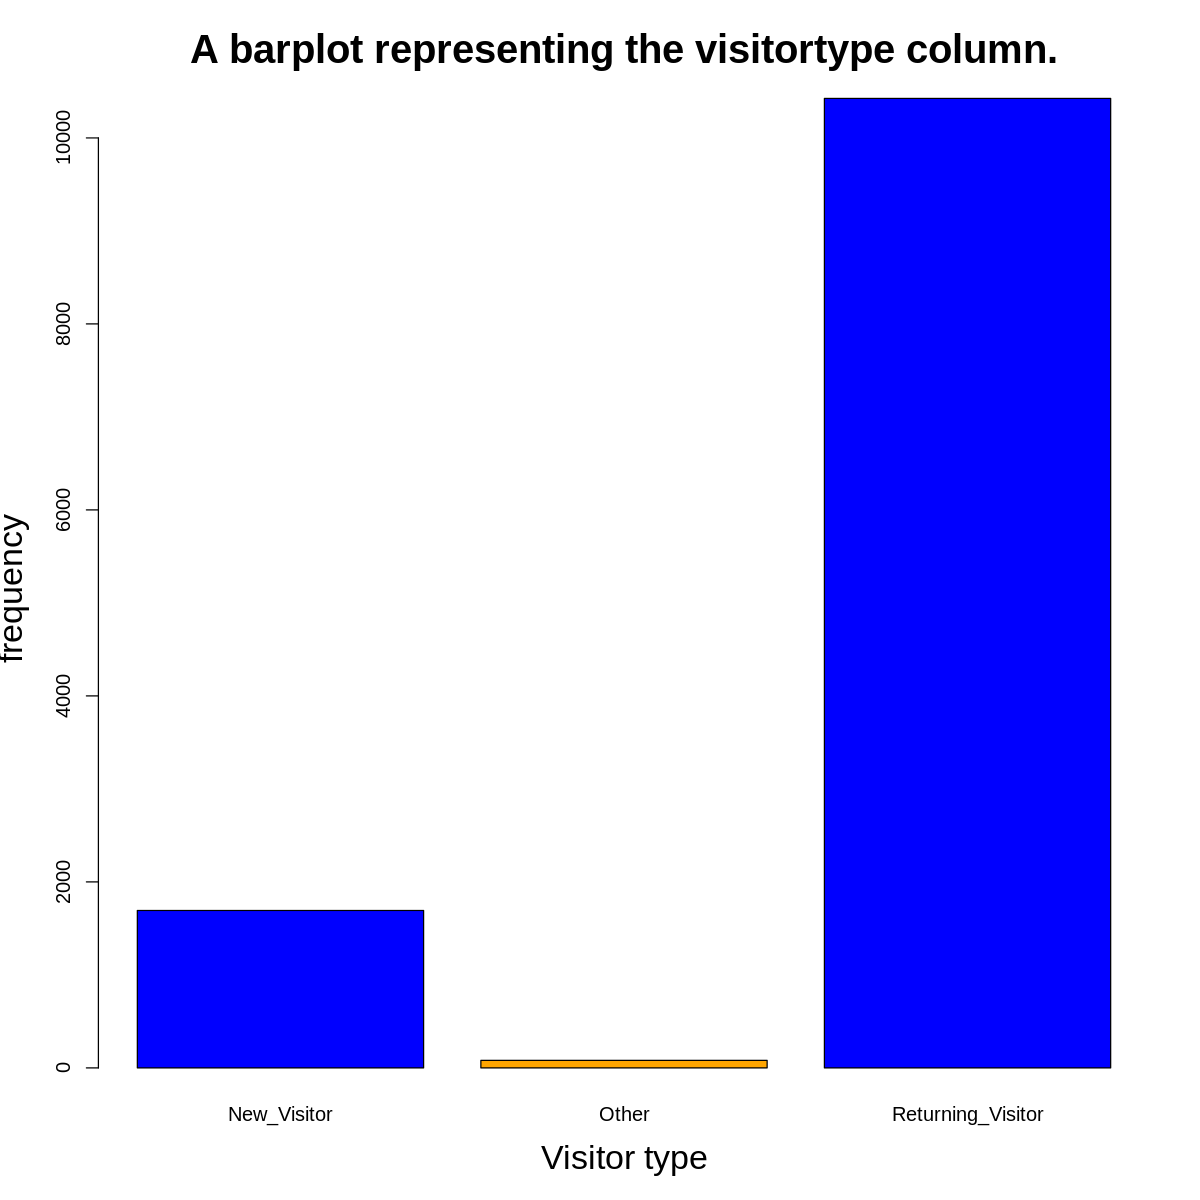

In [47]:
#Bar graph representing Visitor type frequency.
#options(repr.plot.width = 10, repr.plot.height = 10)
barplot(c(visitortype_frequency), main="A barplot representing the visitortype column.",
        xlab="Visitor type",
        ylab="frequency",
        cex.main=2, cex.lab=1.7,cex.sub=1.2,
        width=c(30,30),
        col=c("blue","orange"))

Most visitors were returning visitors while the least were the other visitors.

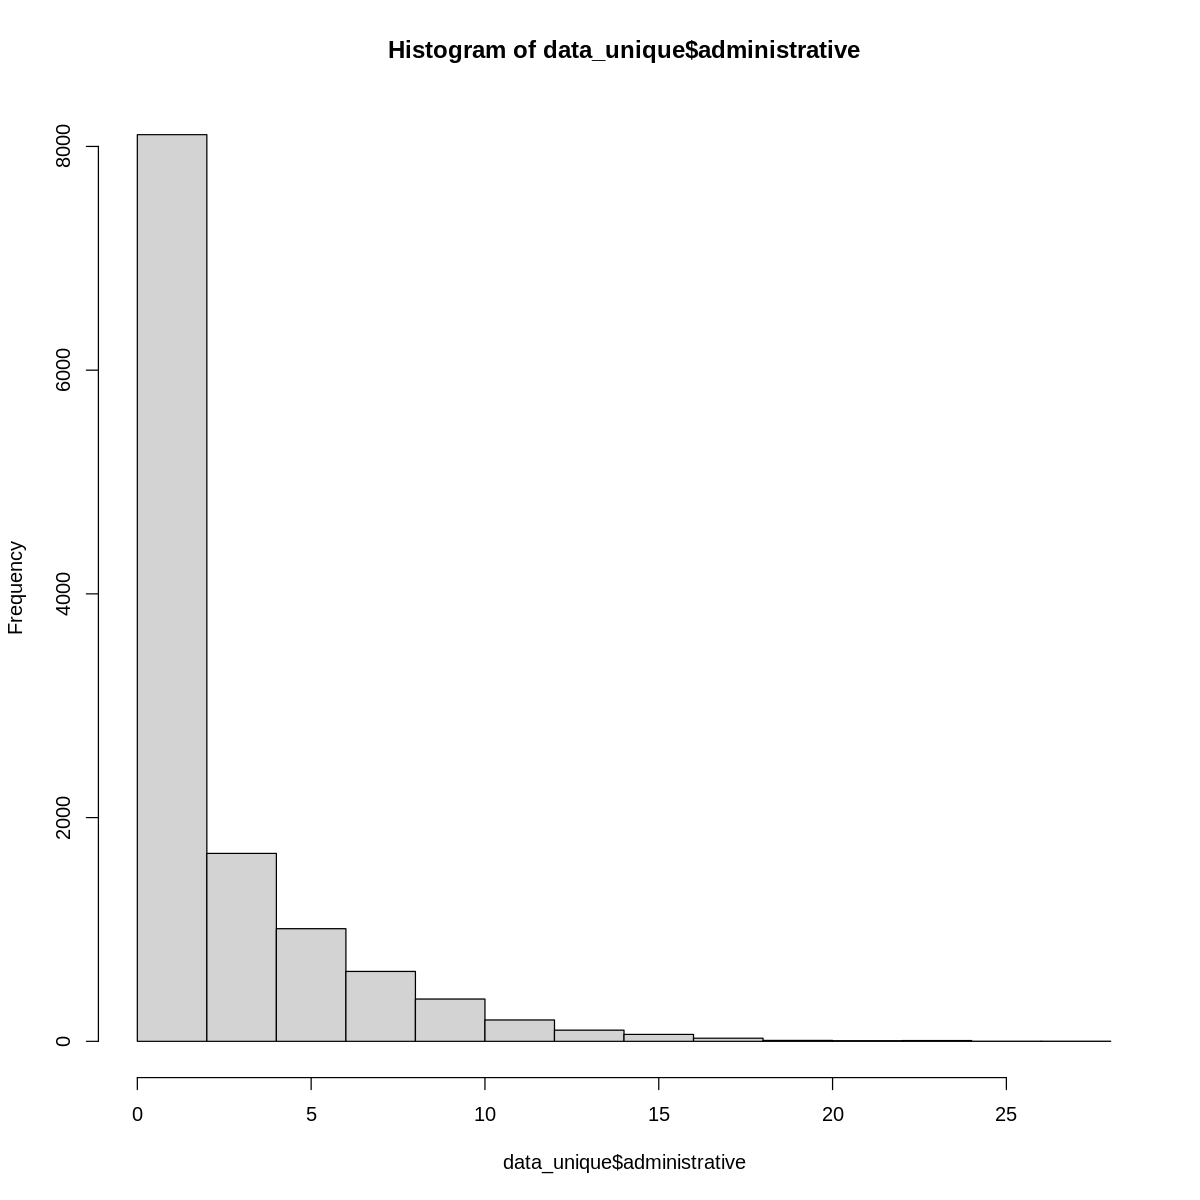

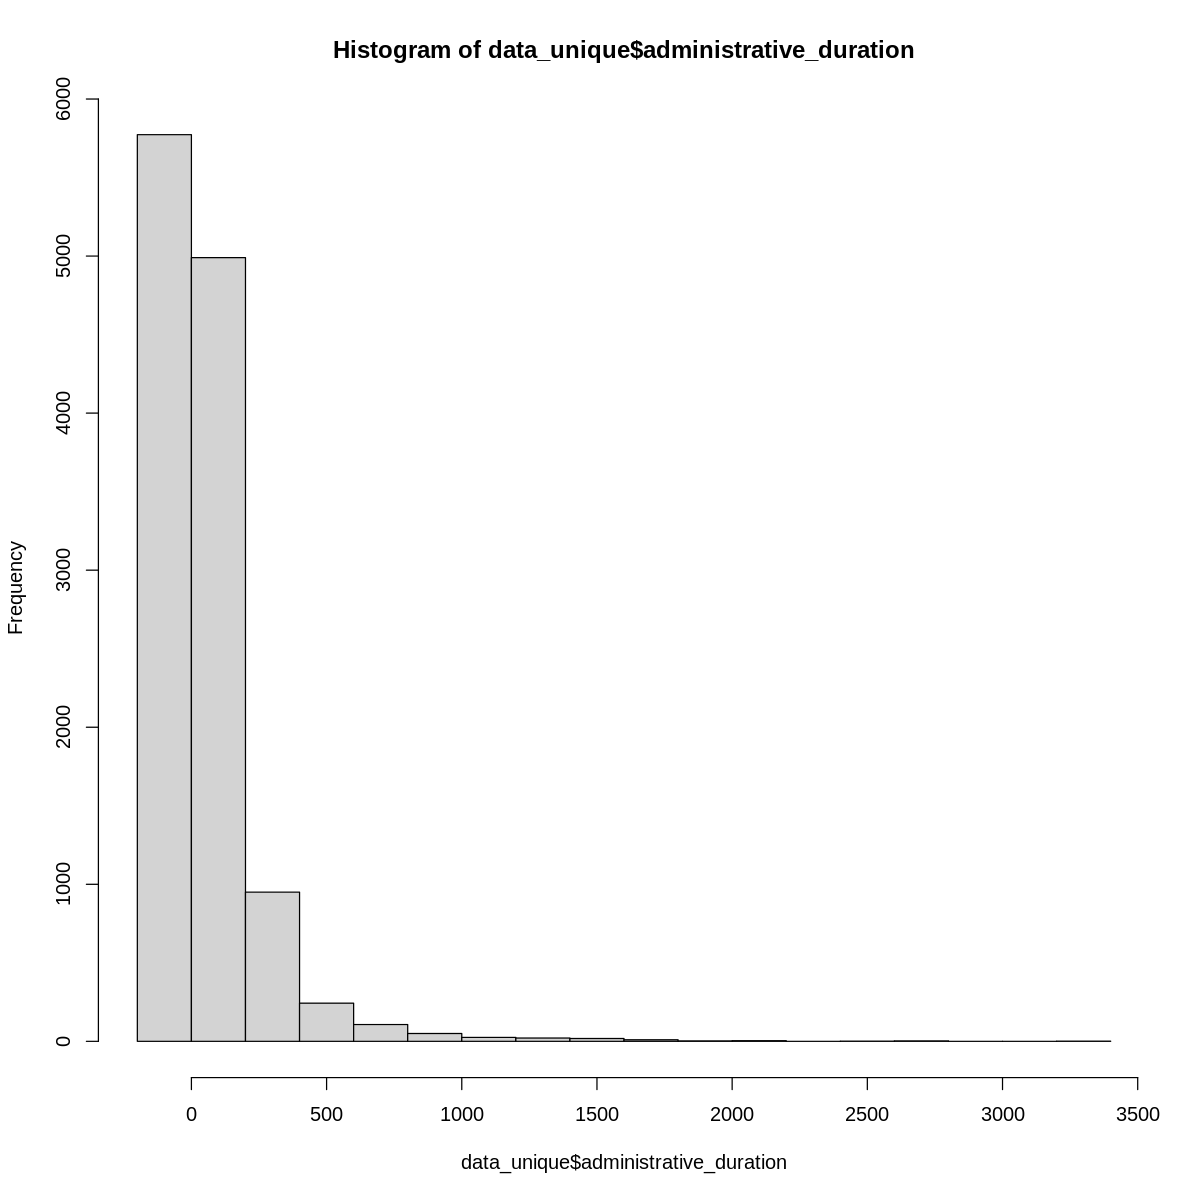

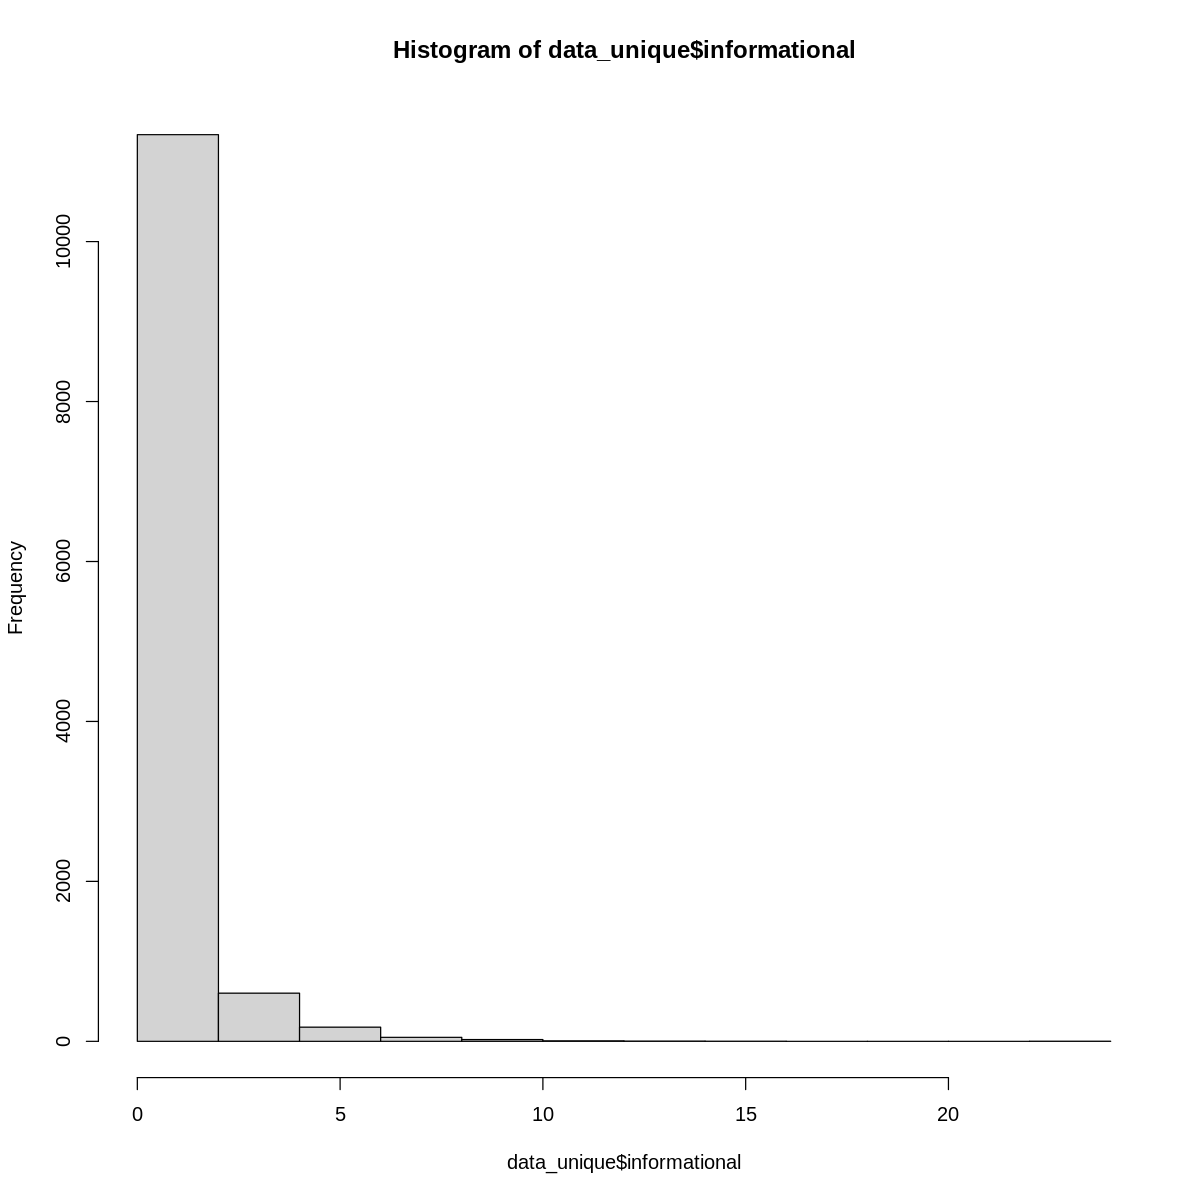

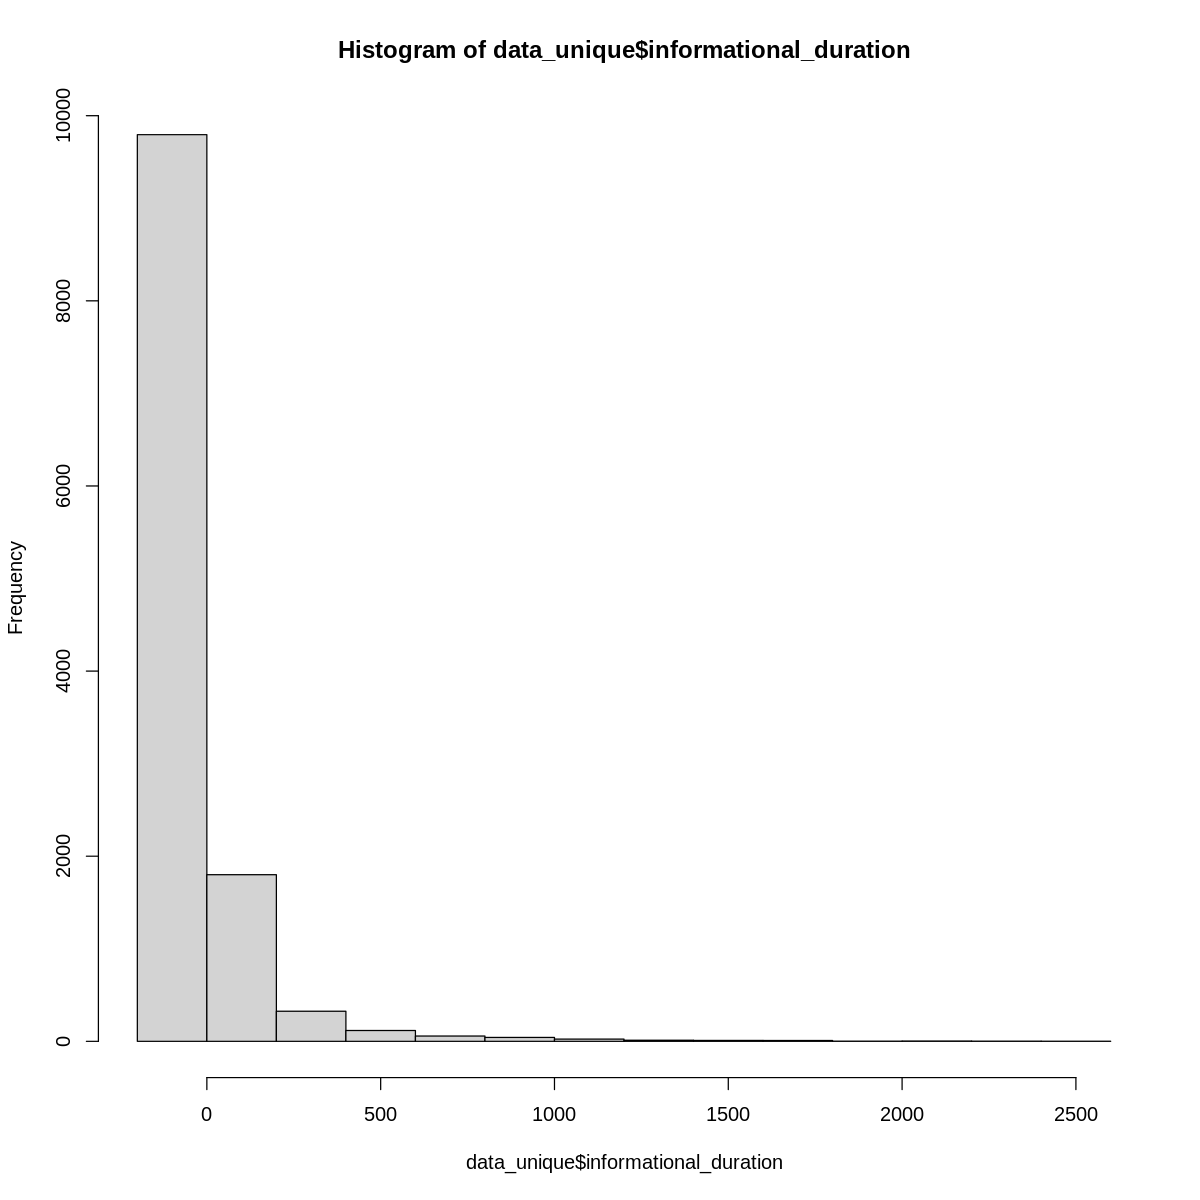

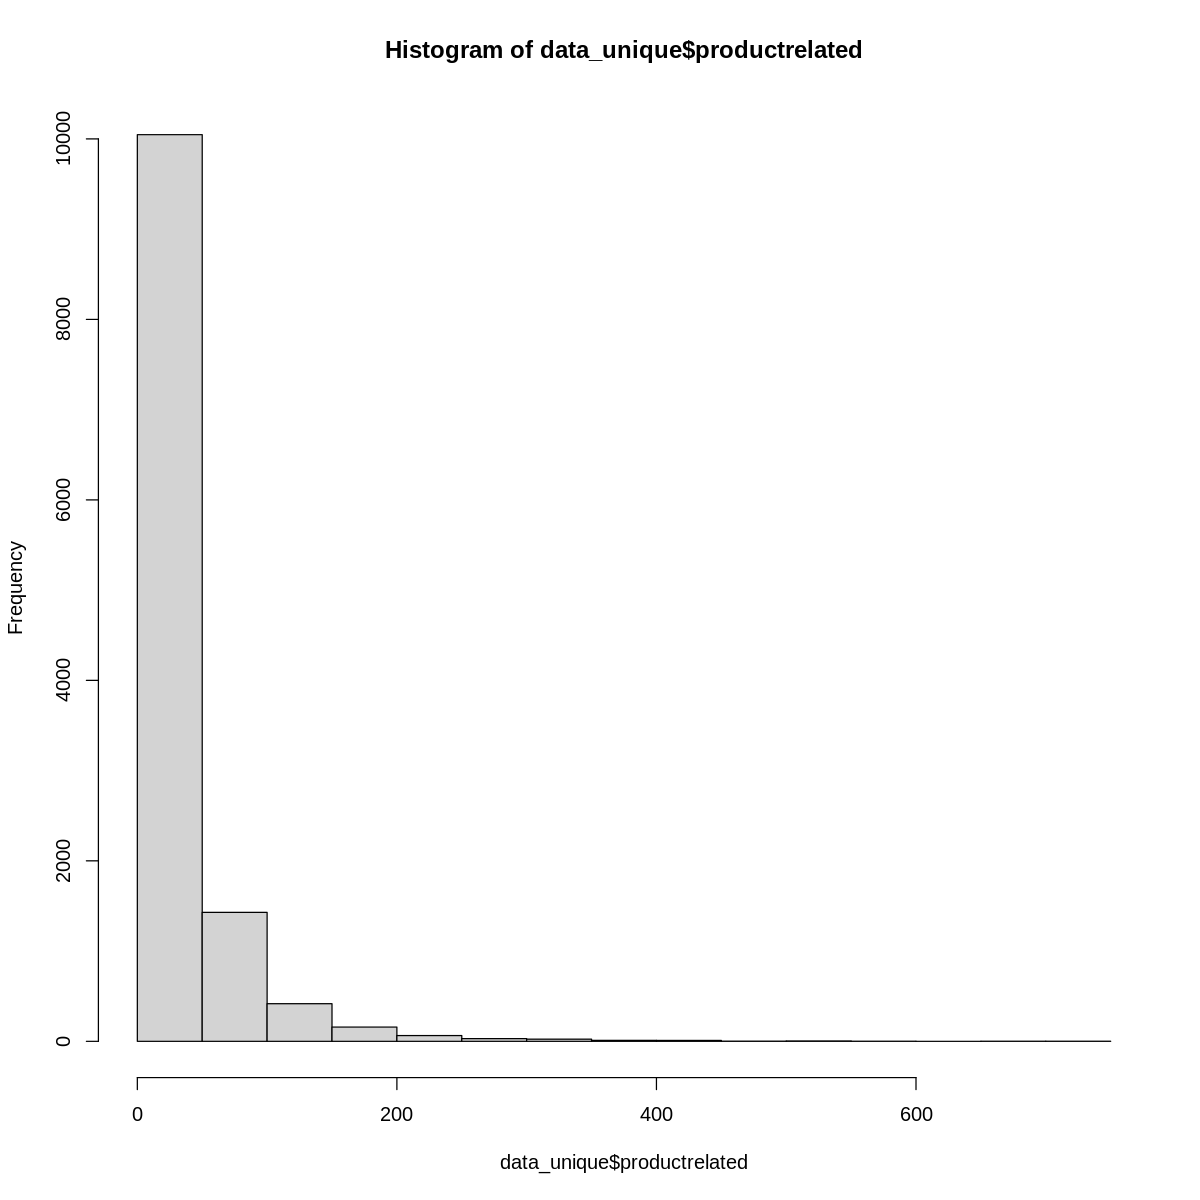

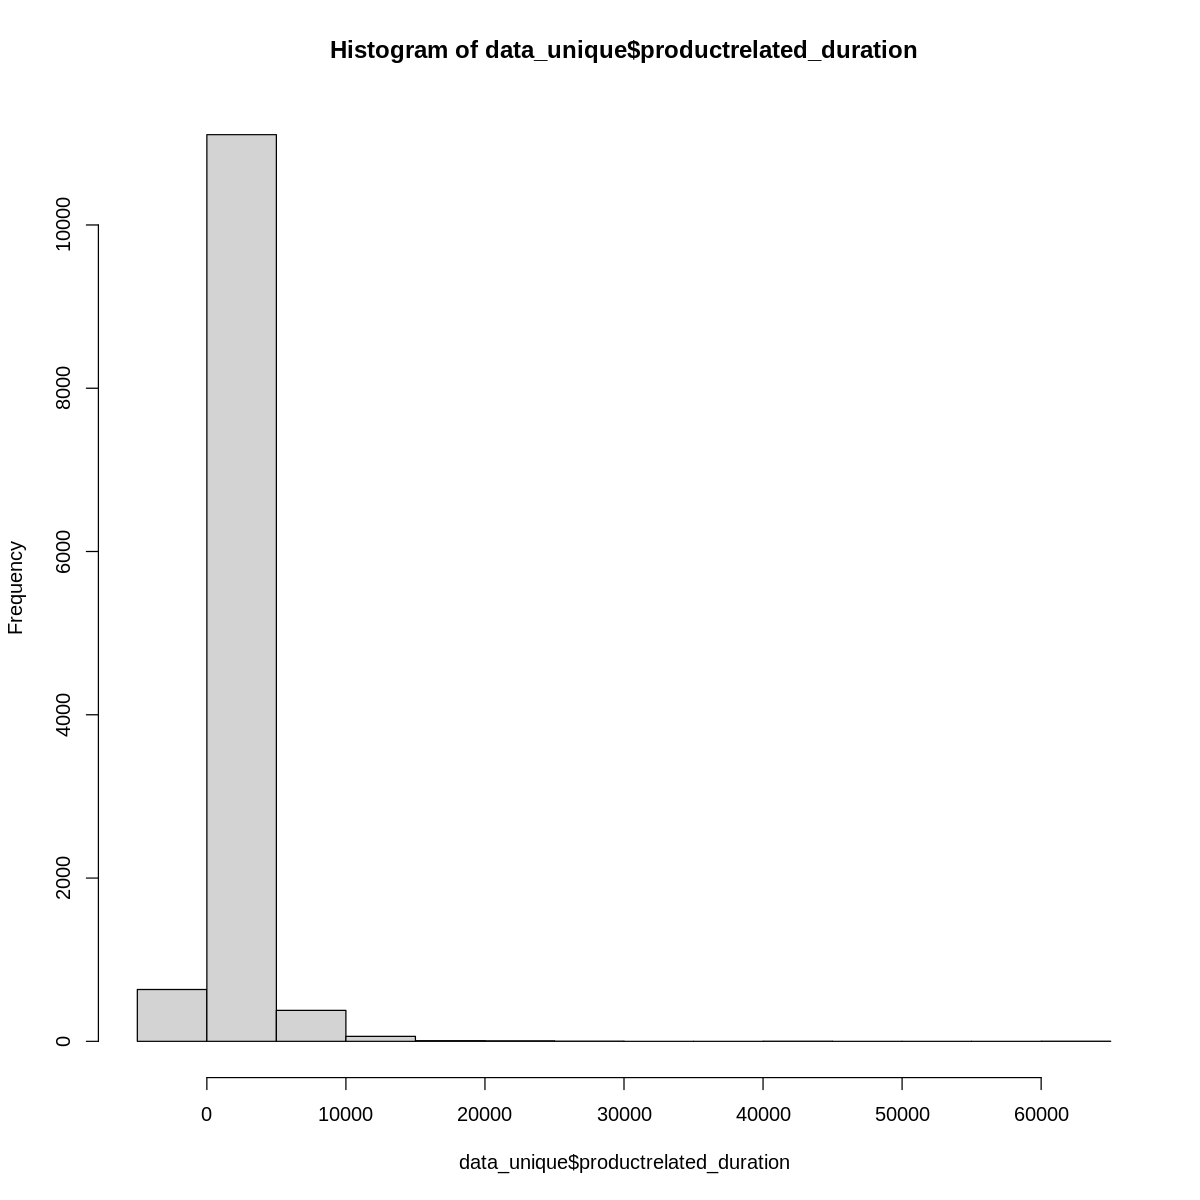

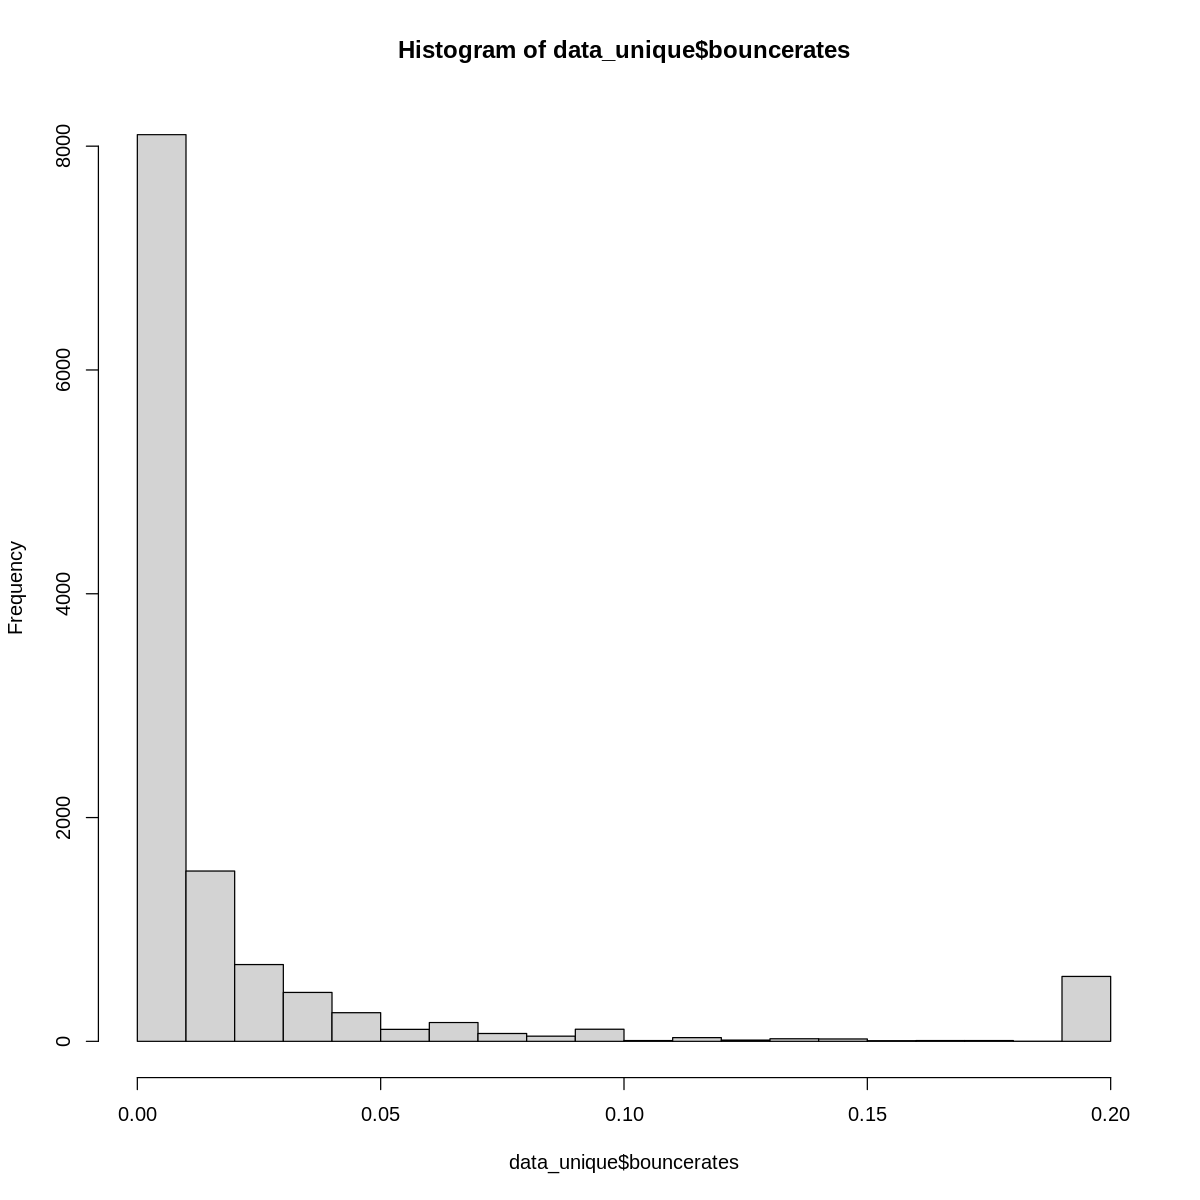

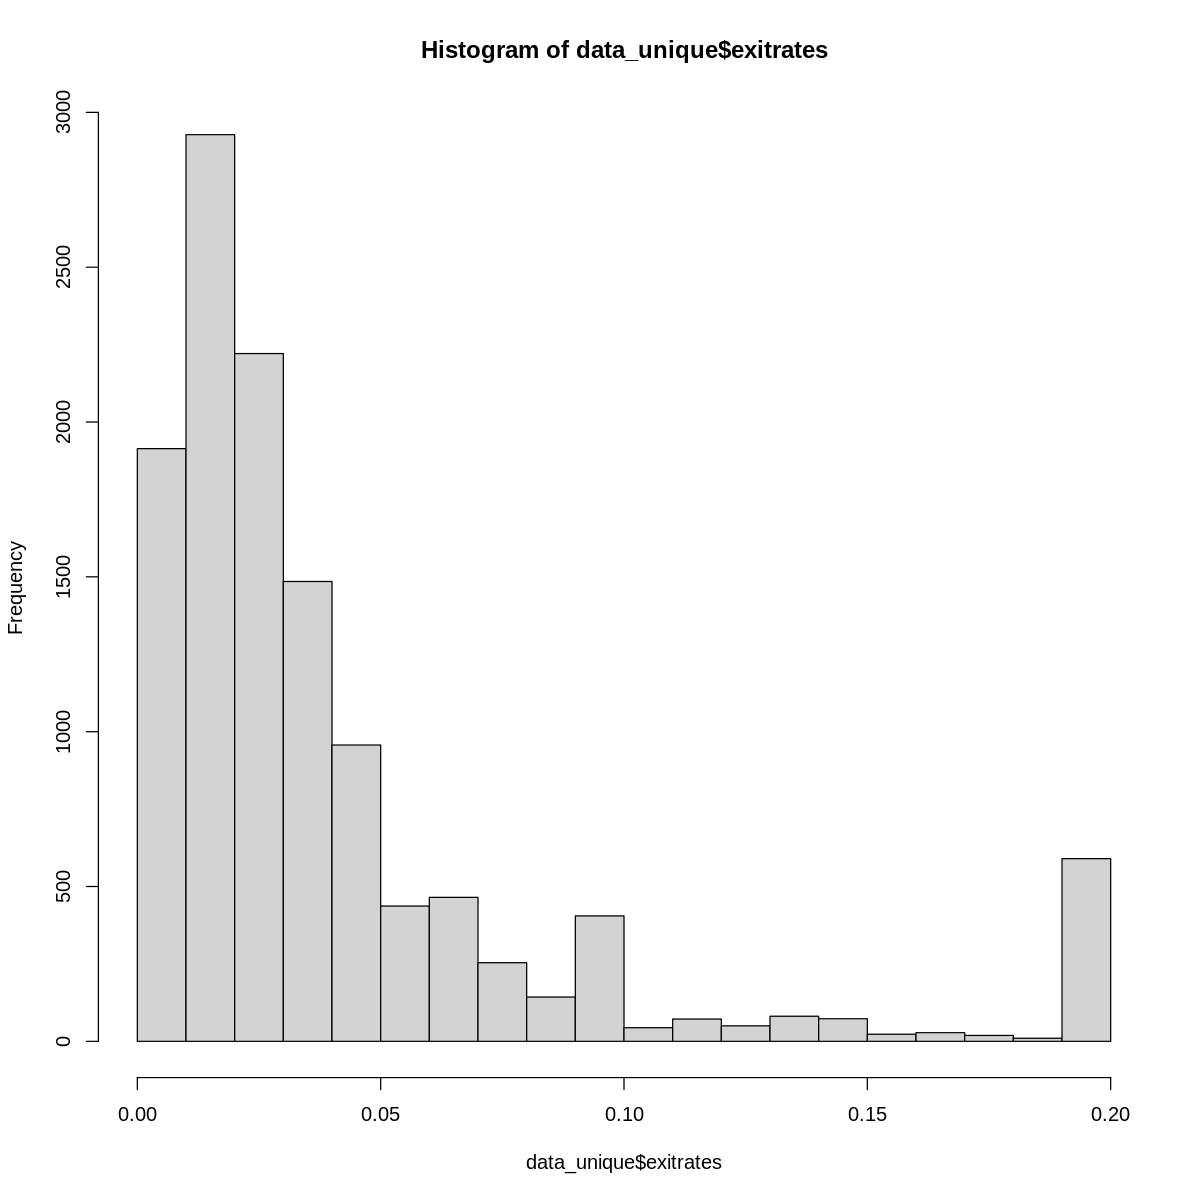

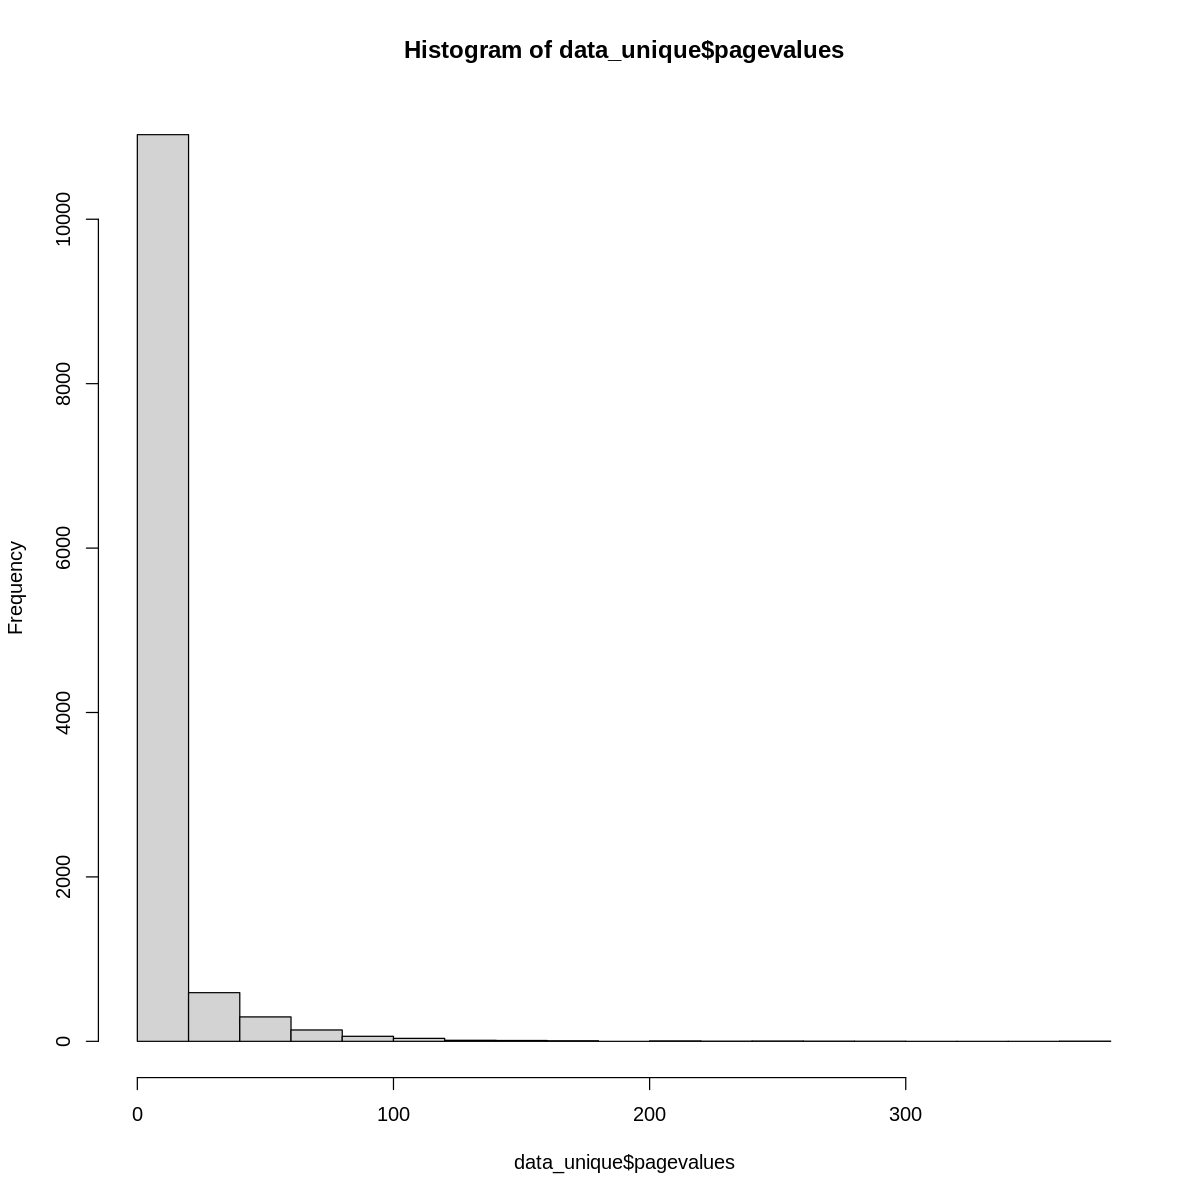

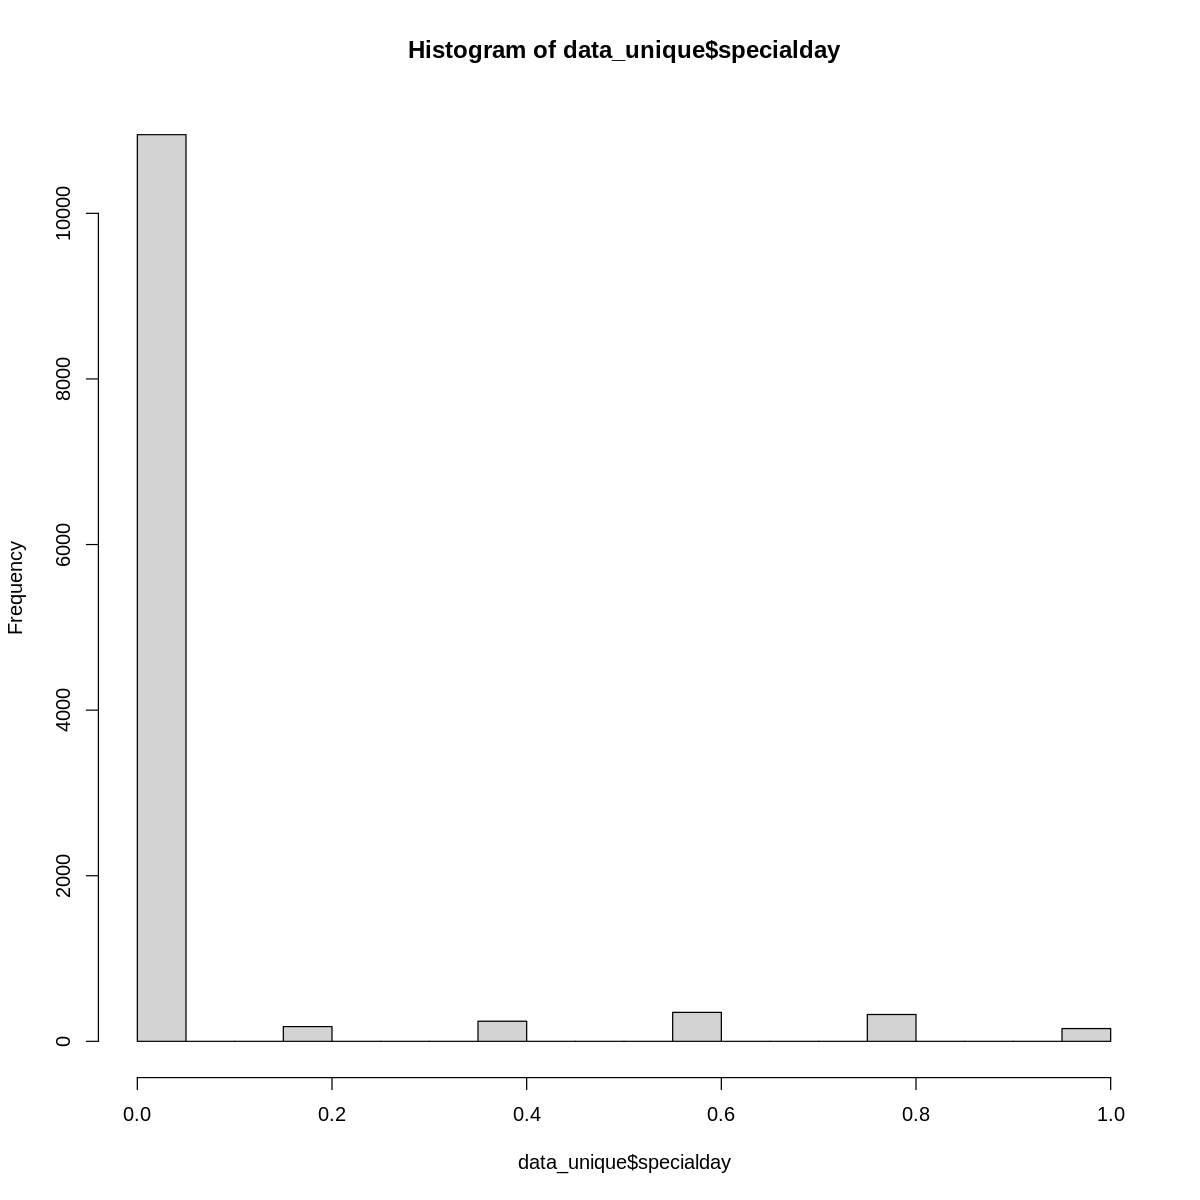

In [49]:
#Histograms of all the numerical variables
options(repr.plot.width = 10, repr.plot.height = 10)
hist(data_unique$administrative)
hist(data_unique$administrative_duration)
hist(data_unique$informational)
hist(data_unique$informational_duration)
hist(data_unique$productrelated)
hist(data_unique$productrelated_duration)
hist(data_unique$bouncerates)
hist(data_unique$exitrates)
hist(data_unique$pagevalues)
hist(data_unique$specialday)


The histograms representing the numerical columns are all skewed to the right.

#**Bivariate Analysis.**

In [50]:
#Specifying the numeric variables.
#Checking the correlation of numeric variables
data_numeric <- data_unique[,1:10]
cor(data_numeric)

administrative administrative_duration informational
administrative           1.00000000     0.60040965              0.37528761  
administrative_duration  0.60040965     1.00000000              0.30143630  
informational            0.37528761     0.30143630              1.00000000  
informational_duration   0.25478602     0.23718986              0.61867795  
productrelated           0.42819151     0.28678391              0.37260472  
productrelated_duration  0.37102722     0.35351379              0.38608372  
bouncerates             -0.21366664    -0.13733340             -0.10950530  
exitrates               -0.31127413    -0.20202445             -0.15956681  
pagevalues               0.09692097     0.06616837              0.04739015  
specialday              -0.09707210    -0.07473689             -0.04937677  
                        informational_duration productrelated
administrative           0.25478602             0.42819151   
administrative_duration  0.23718986             0.28678391   
informational            0.61867795             0.37260472   
informational_duration   1.00000000             0.27906195   
productrelated           0.27906195             1.00000000   
productrelated_duration  0.34658069             0.86030819   
bouncerates             -0.07015947            -0.19351577   
exitrates               -0.10293268            -0.28616321   
pagevalues               0.03006416             0.05411549   
specialday              -0.03129304            -0.02593062   
                        productrelated_duration bouncerates exitrates 
administrative           0.37102722             -0.21366664 -0.3112741
administrative_duration  0.35351379             -0.13733340 -0.2020245
informational            0.38608372             -0.10950530 -0.1595668
informational_duration   0.34658069             -0.07015947 -0.1029327
productrelated           0.86030819             -0.19351577 -0.2861632
productrelated_duration  1.00000000             -0.17437550 -0.2453340
bouncerates             -0.17437550              1.00000000  0.9033582
exitrates               -0.24533401              0.90335819  1.0000000
pagevalues               0.05084062             -0.11599198 -0.1735715
specialday              -0.03821065              0.08783999  0.1167838
                        pagevalues  specialday 
administrative           0.09692097 -0.09707210
administrative_duration  0.06616837 -0.07473689
informational            0.04739015 -0.04937677
informational_duration   0.03006416 -0.03129304
productrelated           0.05411549 -0.02593062
productrelated_duration  0.05084062 -0.03821065
bouncerates             -0.11599198  0.08783999
exitrates               -0.17357154  0.11678376
pagevalues               1.00000000 -0.06453271
specialday              -0.06453271  1.00000000

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




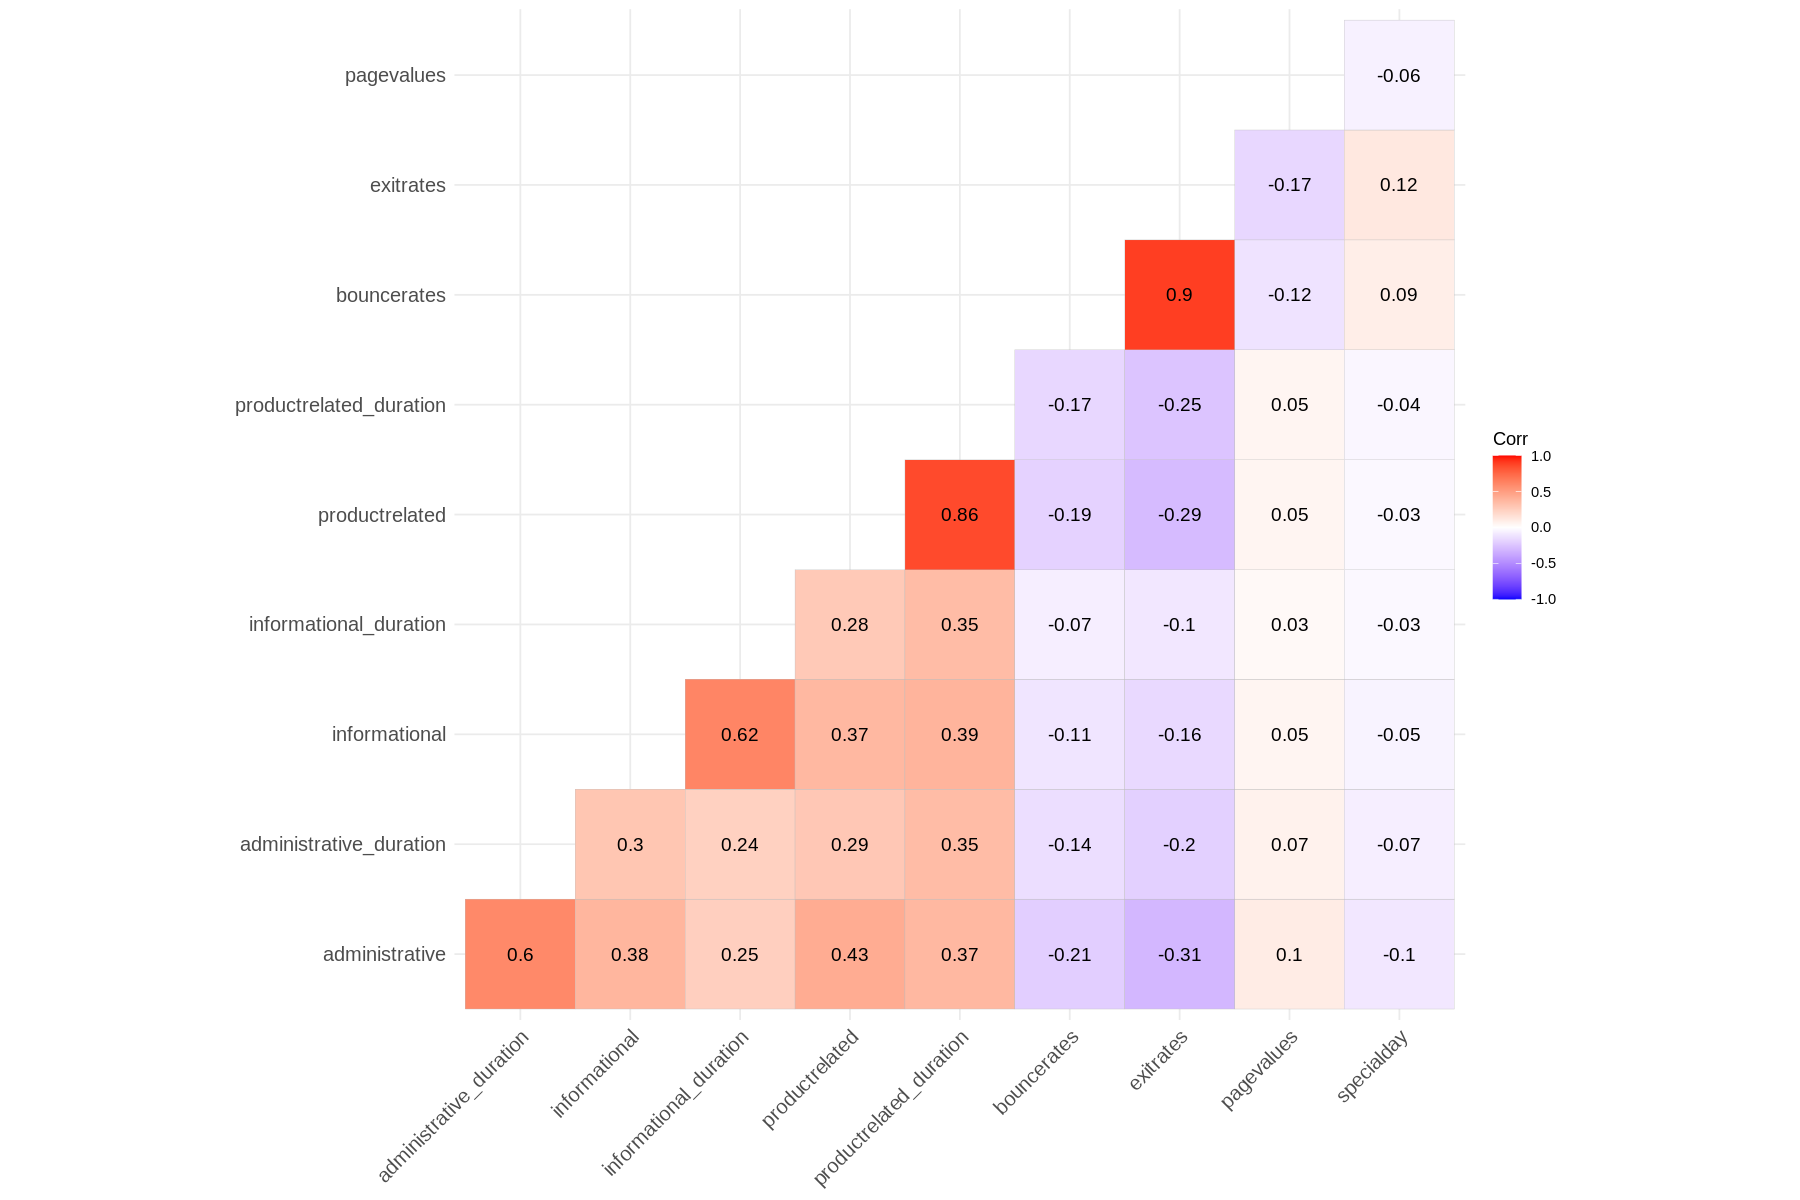

In [51]:
#A heat map to visualize correlations.
options(repr.plot.width = 15, repr.plot.height = 10)
install.packages("ggcorrplot")
library(ggcorrplot)
corr_data <- cor(data_numeric)
ggcorrplot(round(corr_data, 2) ,lab = T,type = 'lower')

The highly correlated variables in our case are, administrative and administrative duration, informational and informational duration, product related and product related duration and lastly exitrates and bounce rates.

In [52]:
#Checking the covariance of the numerical variables.
cov(data_numeric)

administrative administrative_duration informational
administrative            11.09456996     355.034186             1.594806280
administrative_duration  355.03418646   31516.250360            68.273361883
informational              1.59480628      68.273362             1.627709681
informational_duration   120.04936778    5956.517671           111.656022657
productrelated            63.61170357    2270.731540            21.202182071
productrelated_duration 2372.71642208  120492.067559           945.703033133
bouncerates               -0.03231259      -1.106938            -0.006343127
exitrates                 -0.04794942      -1.658656            -0.009414909
pagevalues                 6.02328225     219.168388             1.128072018
specialday                -0.06457297      -2.649741            -0.012580917
                        informational_duration productrelated
administrative            120.0493678             63.6117036 
administrative_duration  5956.5176708           2270.7315396 
informational             111.6560227             21.2021821 
informational_duration  20010.5068642           1760.6514935 
productrelated           1760.6514935           1989.2412959 
productrelated_duration 94127.8699847          73668.6330189 
bouncerates                -0.4506041             -0.3918681 
exitrates                  -0.6733911             -0.5902590 
pagevalues                 79.3484334             45.0324519 
specialday                 -0.8840522             -0.2309712 
                        productrelated_duration bouncerates   exitrates    
administrative             2372.71642           -3.231259e-02  -0.047949418
administrative_duration  120492.06756           -1.106938e+00  -1.658655837
informational               945.70303           -6.343127e-03  -0.009414909
informational_duration    94127.86998           -4.506041e-01  -0.673391128
productrelated            73668.63302           -3.918681e-01  -0.590258984
productrelated_duration 3686121.49674           -1.520023e+01 -21.783499809
bouncerates                 -15.20023            2.061387e-03   0.001896814
exitrates                   -21.78350            1.896814e-03   0.002138800
pagevalues                 1821.19283           -9.825801e-02  -0.149769655
specialday                  -14.65110            7.964769e-04   0.001078620
                        pagevalues    specialday   
administrative             6.02328225 -6.457297e-02
administrative_duration  219.16838756 -2.649741e+00
informational              1.12807202 -1.258092e-02
informational_duration    79.34843344 -8.840522e-01
productrelated            45.03245187 -2.309712e-01
productrelated_duration 1821.19282970 -1.465110e+01
bouncerates               -0.09825801  7.964769e-04
exitrates                 -0.14976966  1.078620e-03
pagevalues               348.11318376 -2.404591e-01
specialday                -0.24045911  3.988432e-02

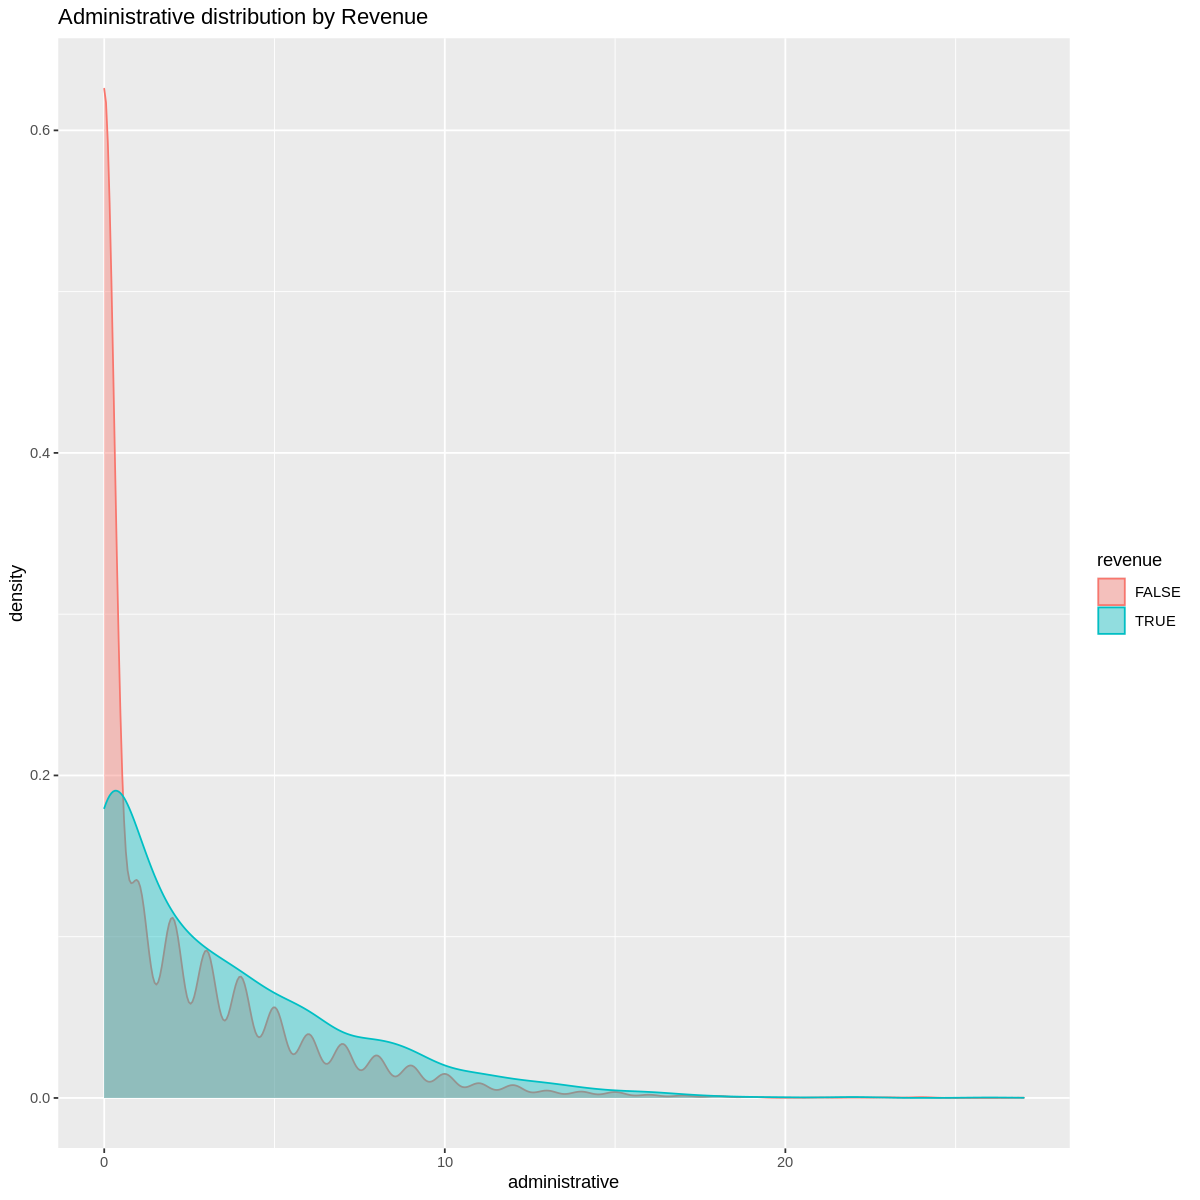

In [53]:
#Administrative Vs Revenue
options(repr.plot.width = 10, repr.plot.height = 10)
library(ggplot2)
ggplot(data_unique, 
       aes(x = administrative, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Administrative distribution by Revenue")

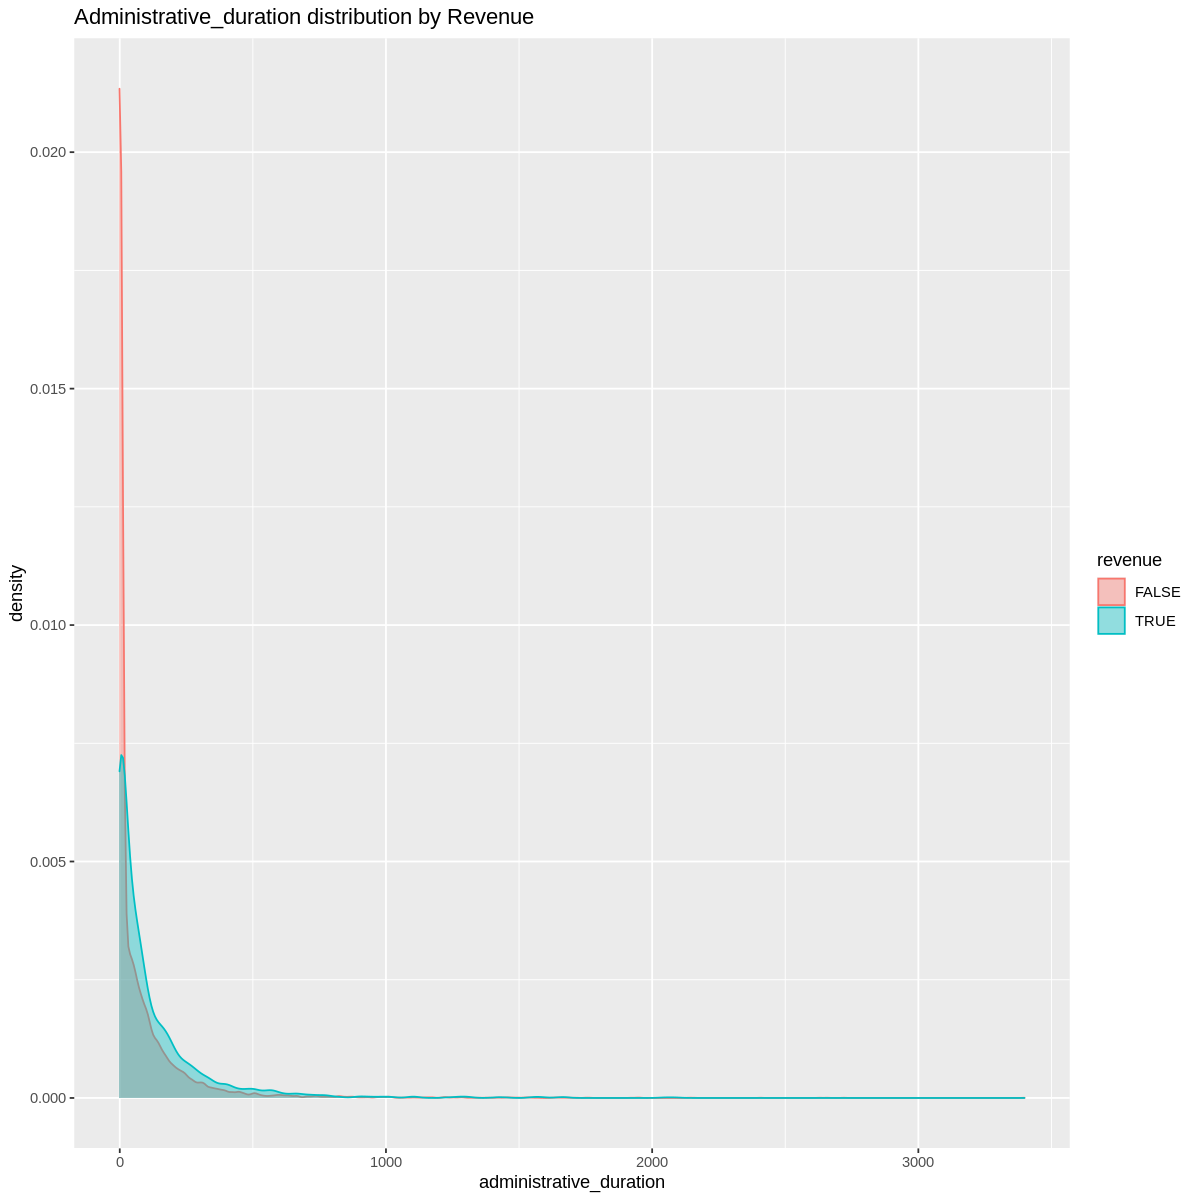

In [54]:
#Administrative duration Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = administrative_duration, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Administrative_duration distribution by Revenue")

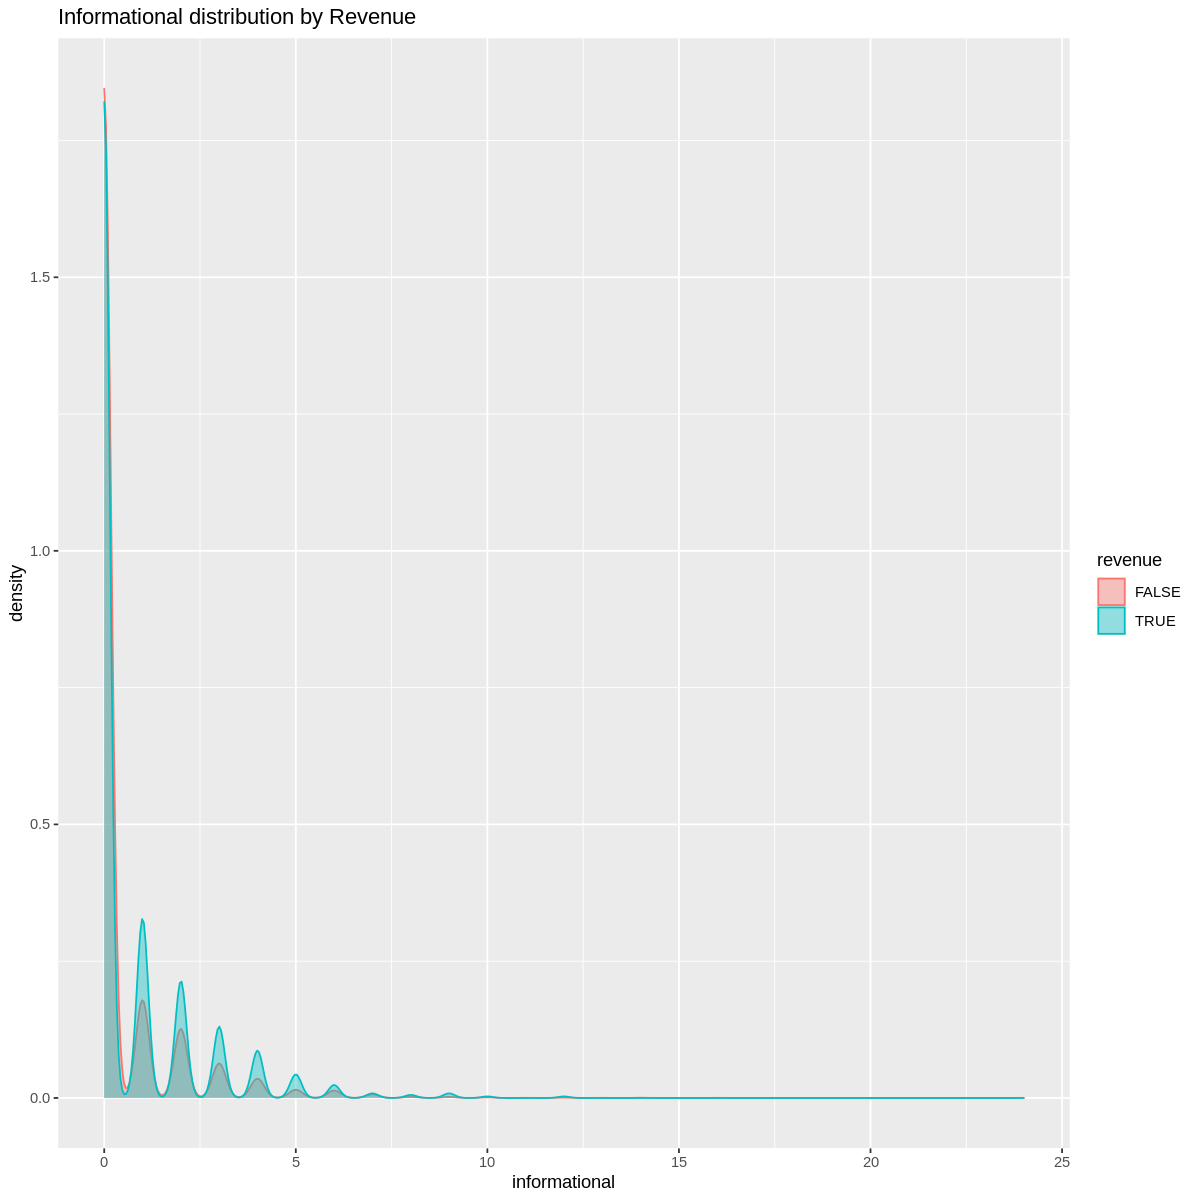

In [55]:
#Informational duration Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = informational, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Informational distribution by Revenue")

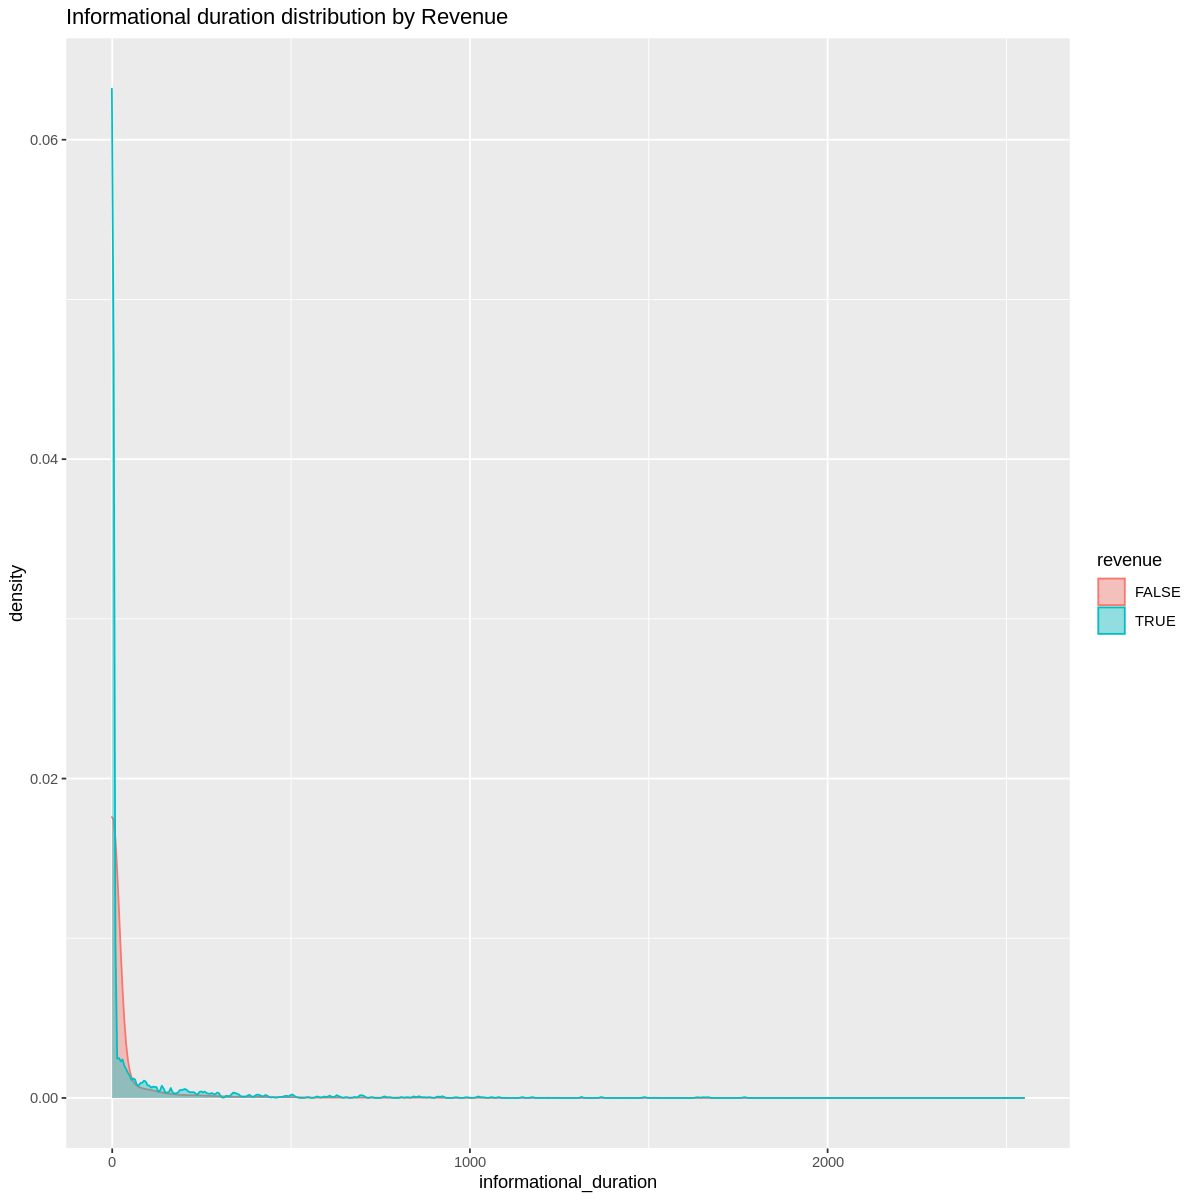

In [56]:
#Informational duration Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = informational_duration, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Informational duration distribution by Revenue")

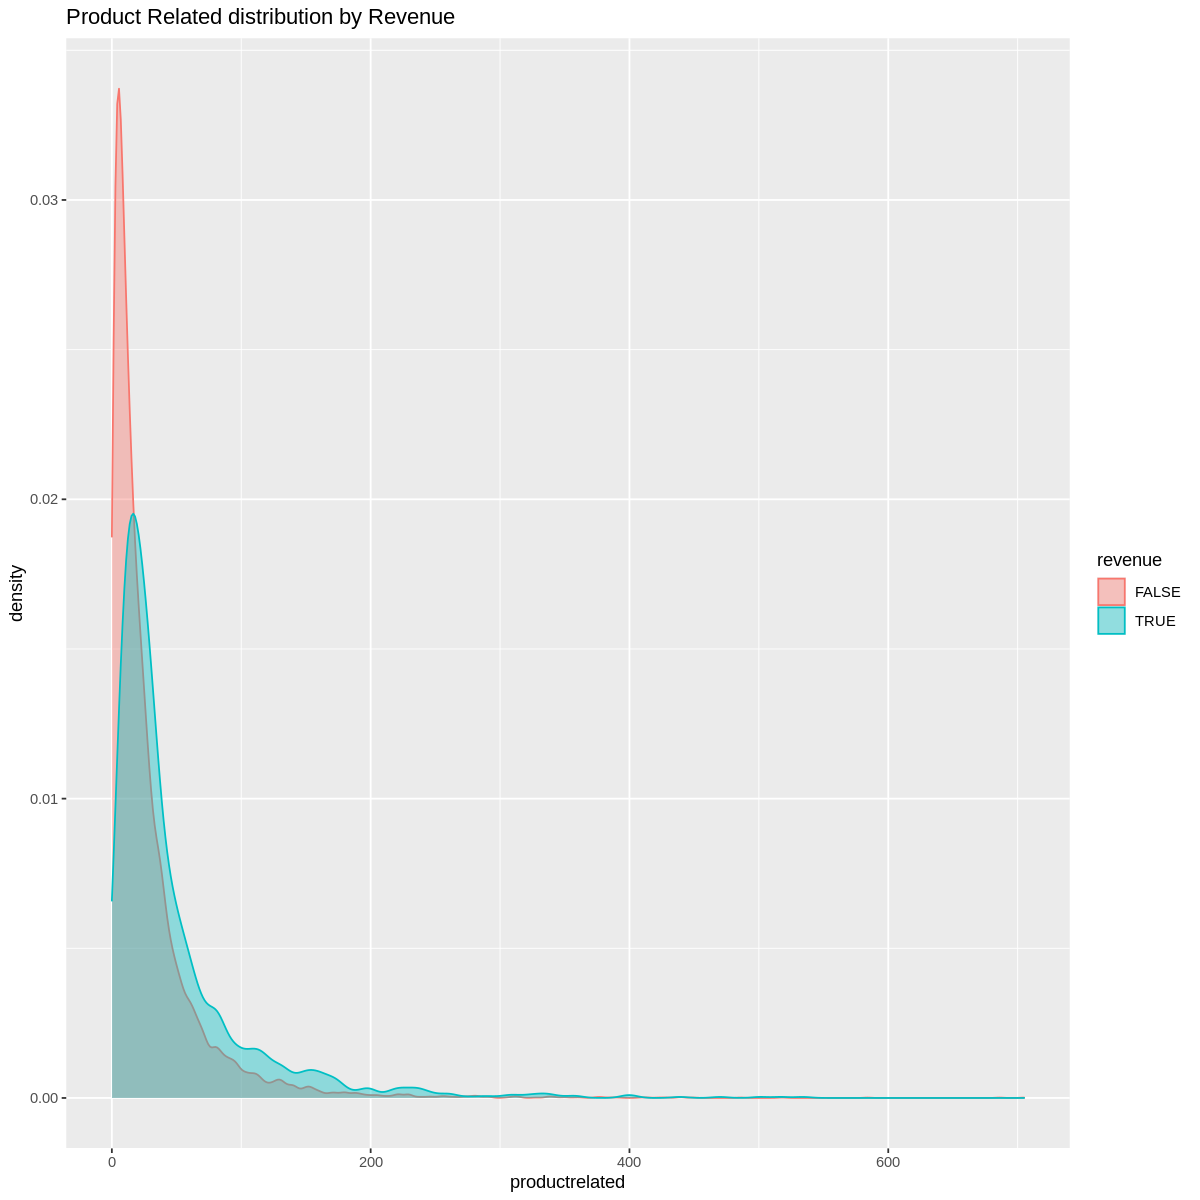

In [57]:
#Product Related Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = productrelated, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Product Related distribution by Revenue")

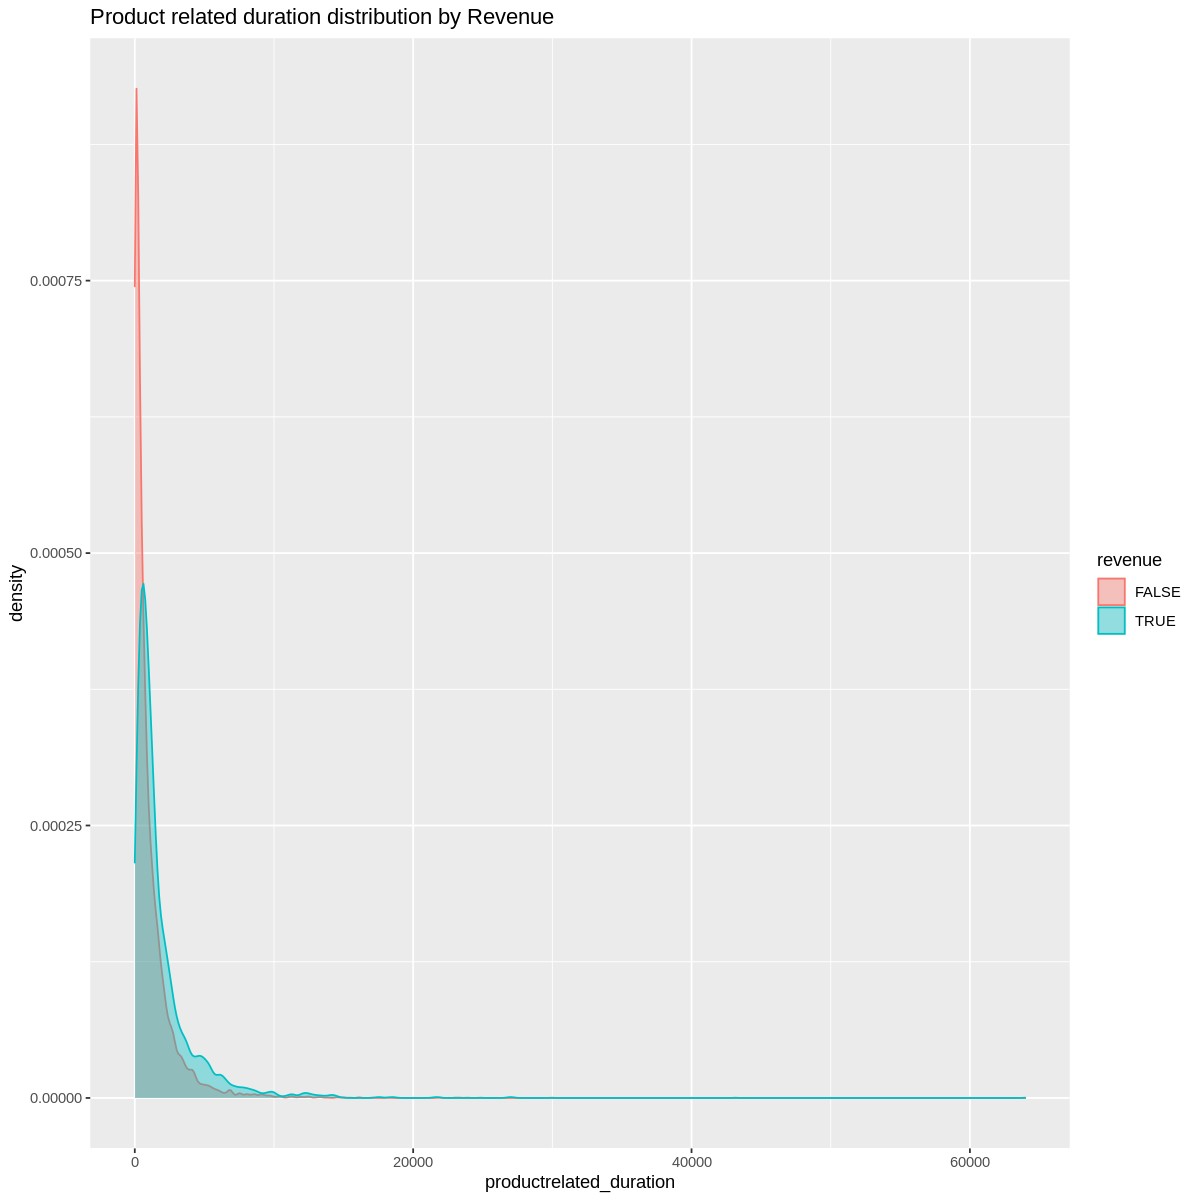

In [58]:
#Product related duration Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = productrelated_duration, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Product related duration distribution by Revenue")

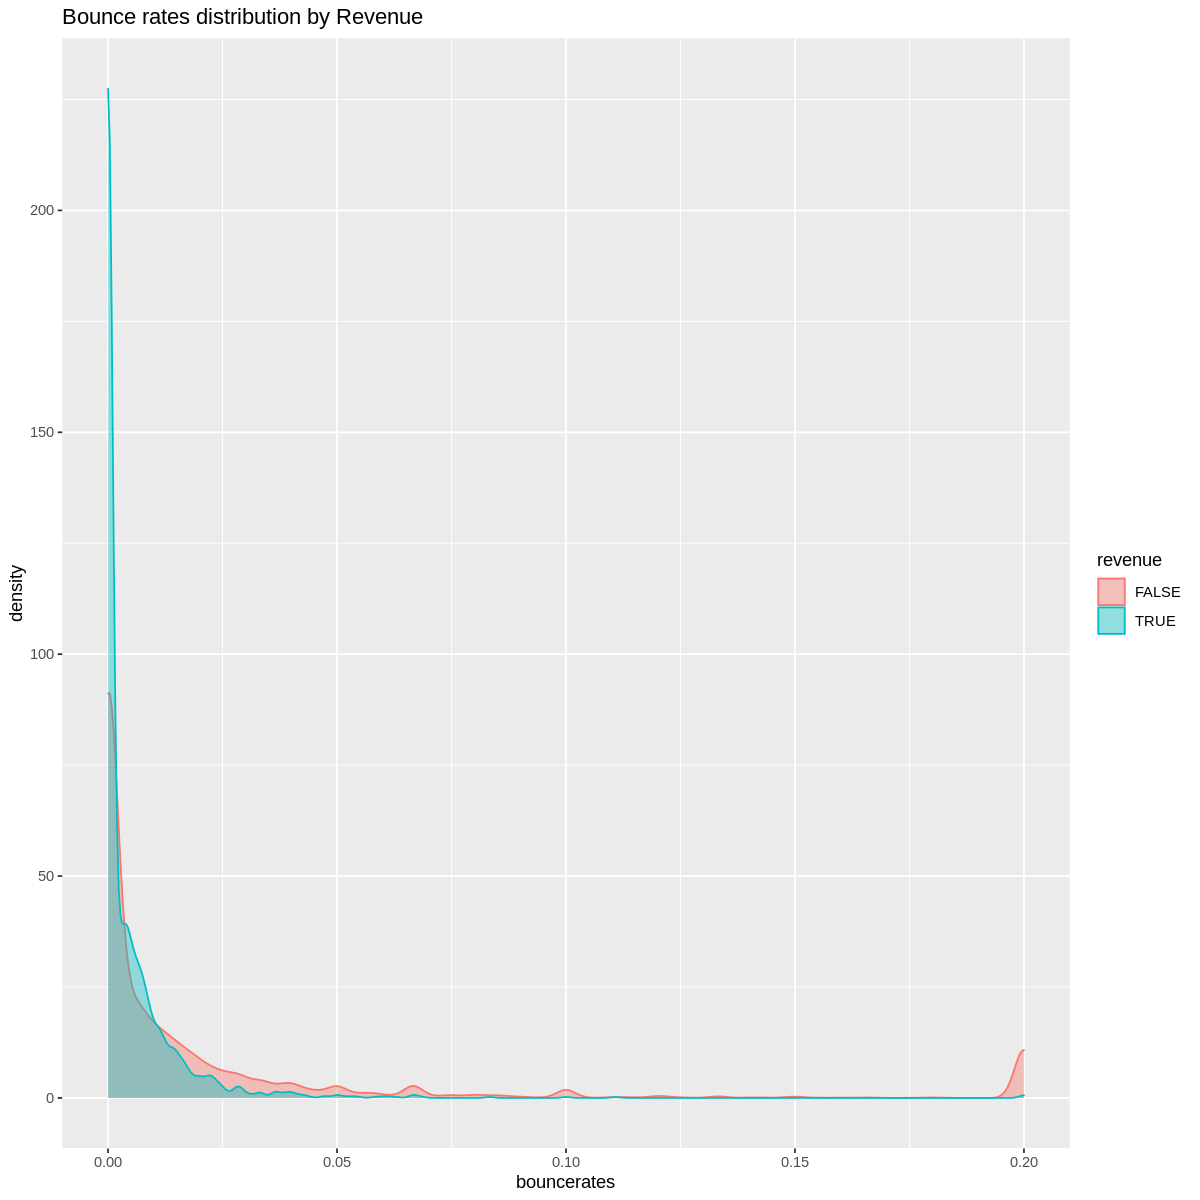

In [59]:
#Bounce rates Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = bouncerates, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Bounce rates distribution by Revenue")

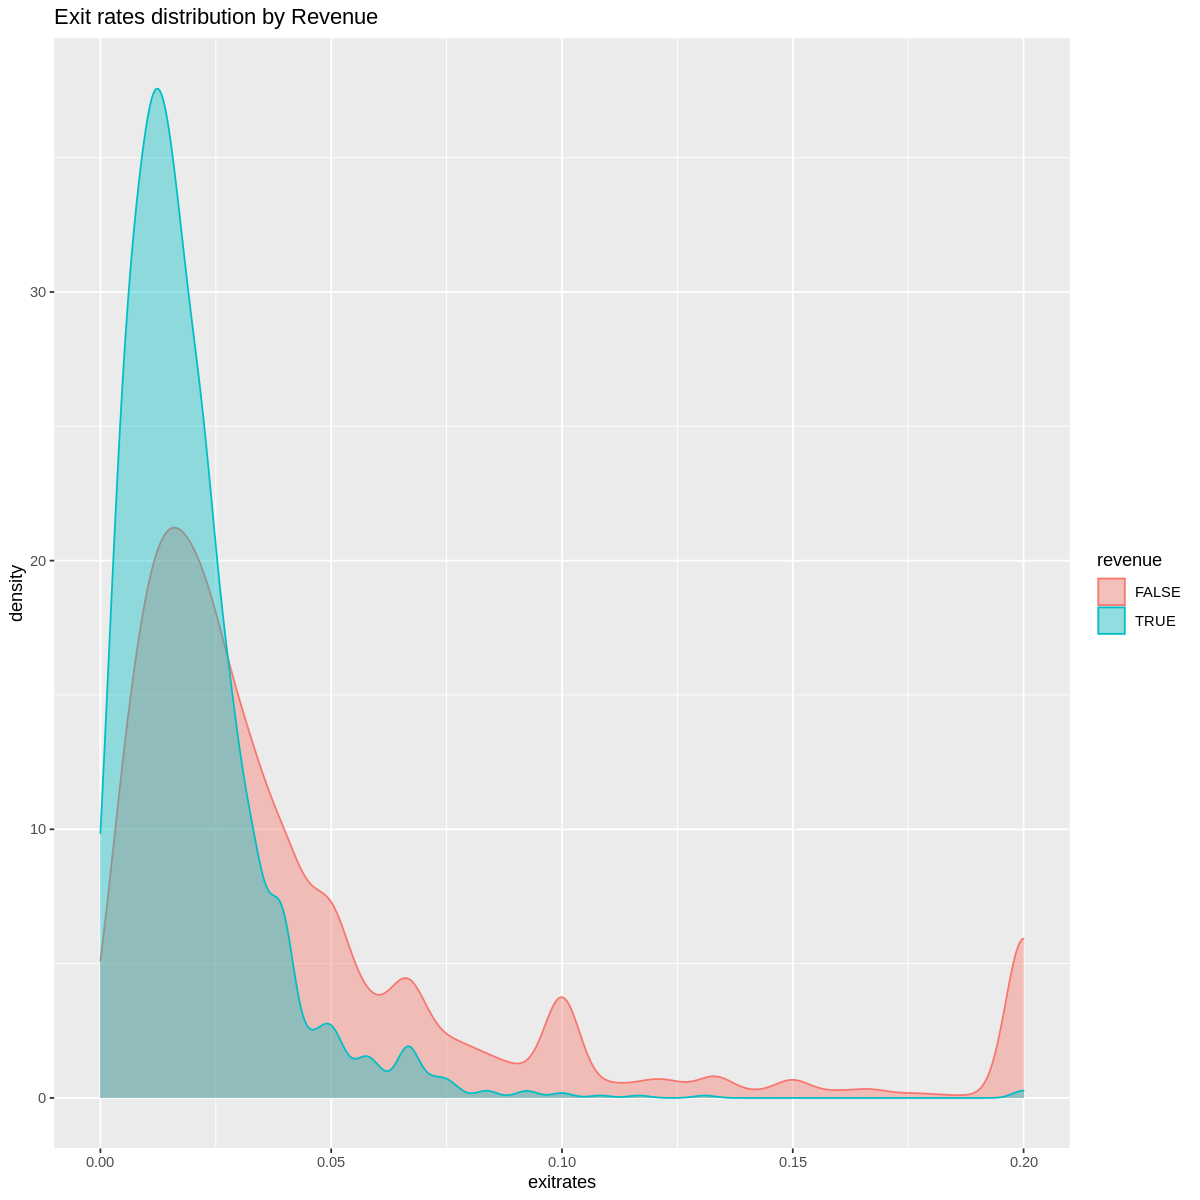

In [60]:
#Exit rates Vs Revenue
library(ggplot2)
ggplot(data_unique, 
       aes(x = exitrates, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Exit rates distribution by Revenue")

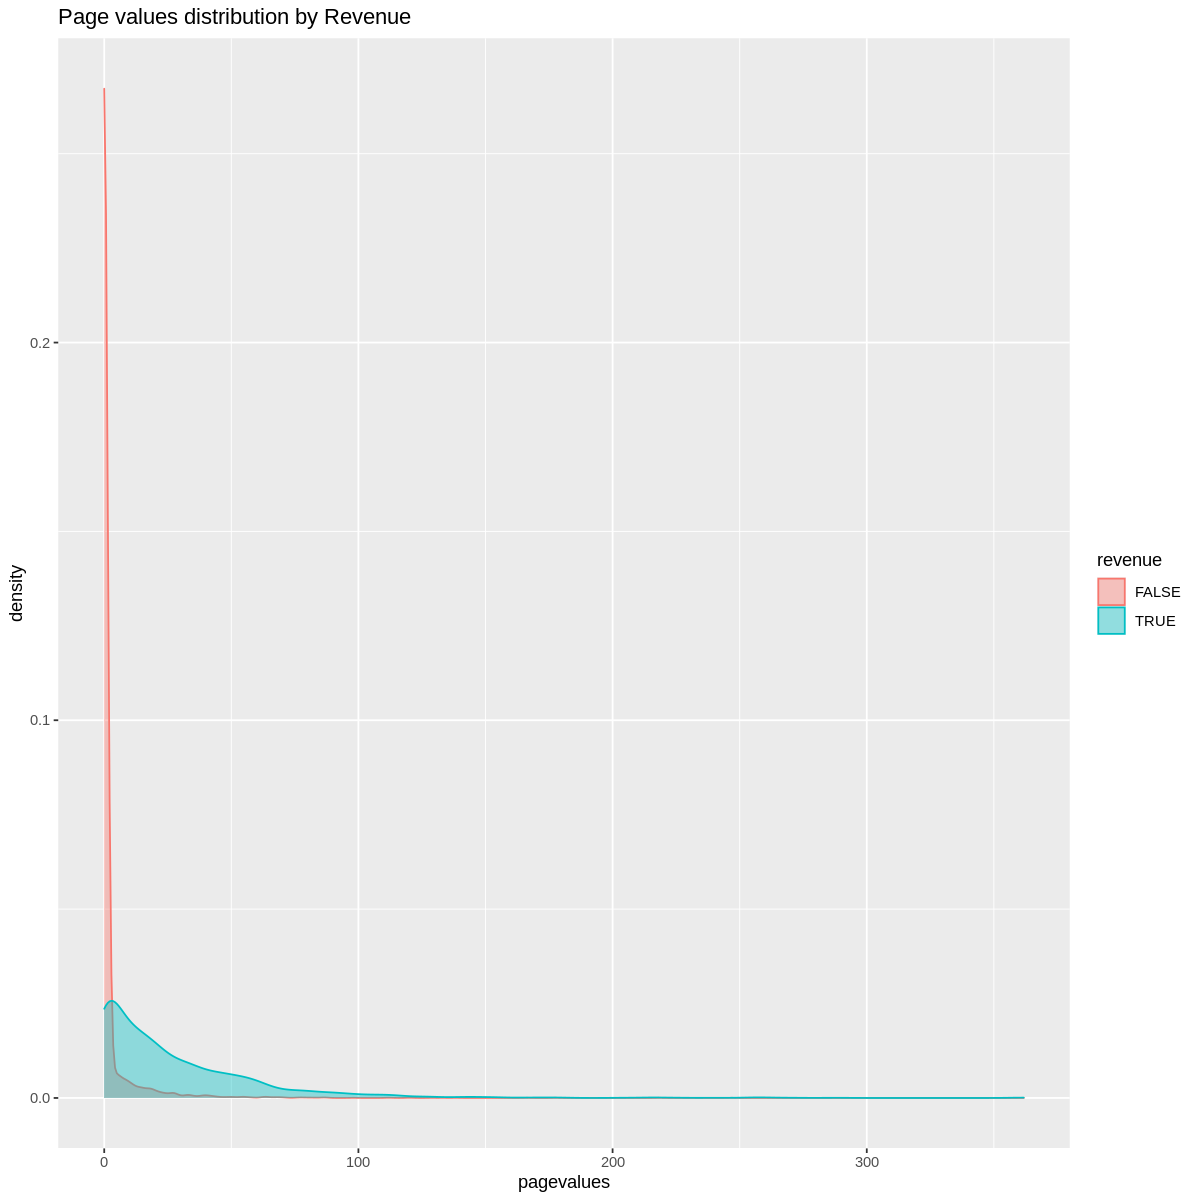

In [61]:
#Page values Vs Revenue.
library(ggplot2)
ggplot(data_unique, 
       aes(x = pagevalues, 
           fill = revenue, color = revenue)) +
  geom_density(alpha = 0.4) +
  labs(title = "Page values distribution by Revenue")

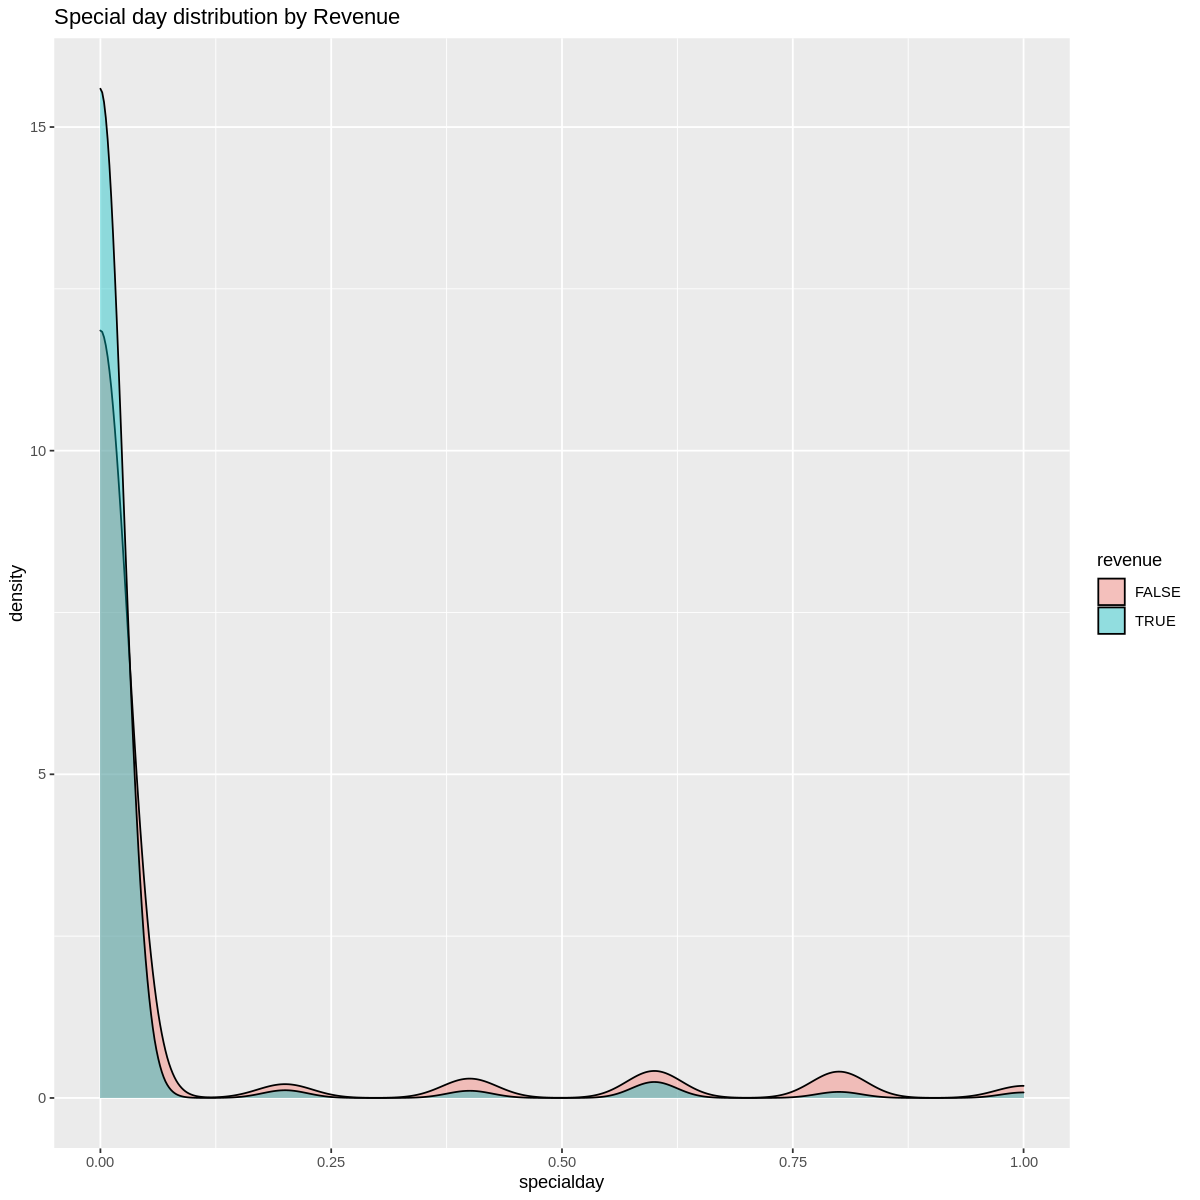

In [62]:
#Special day Vs Revenue.
library(ggplot2)
ggplot(data_unique, 
       aes(x = specialday, 
           fill = revenue)) +
           geom_density(alpha = 0.4) +
  labs(title = "Special day distribution by Revenue")

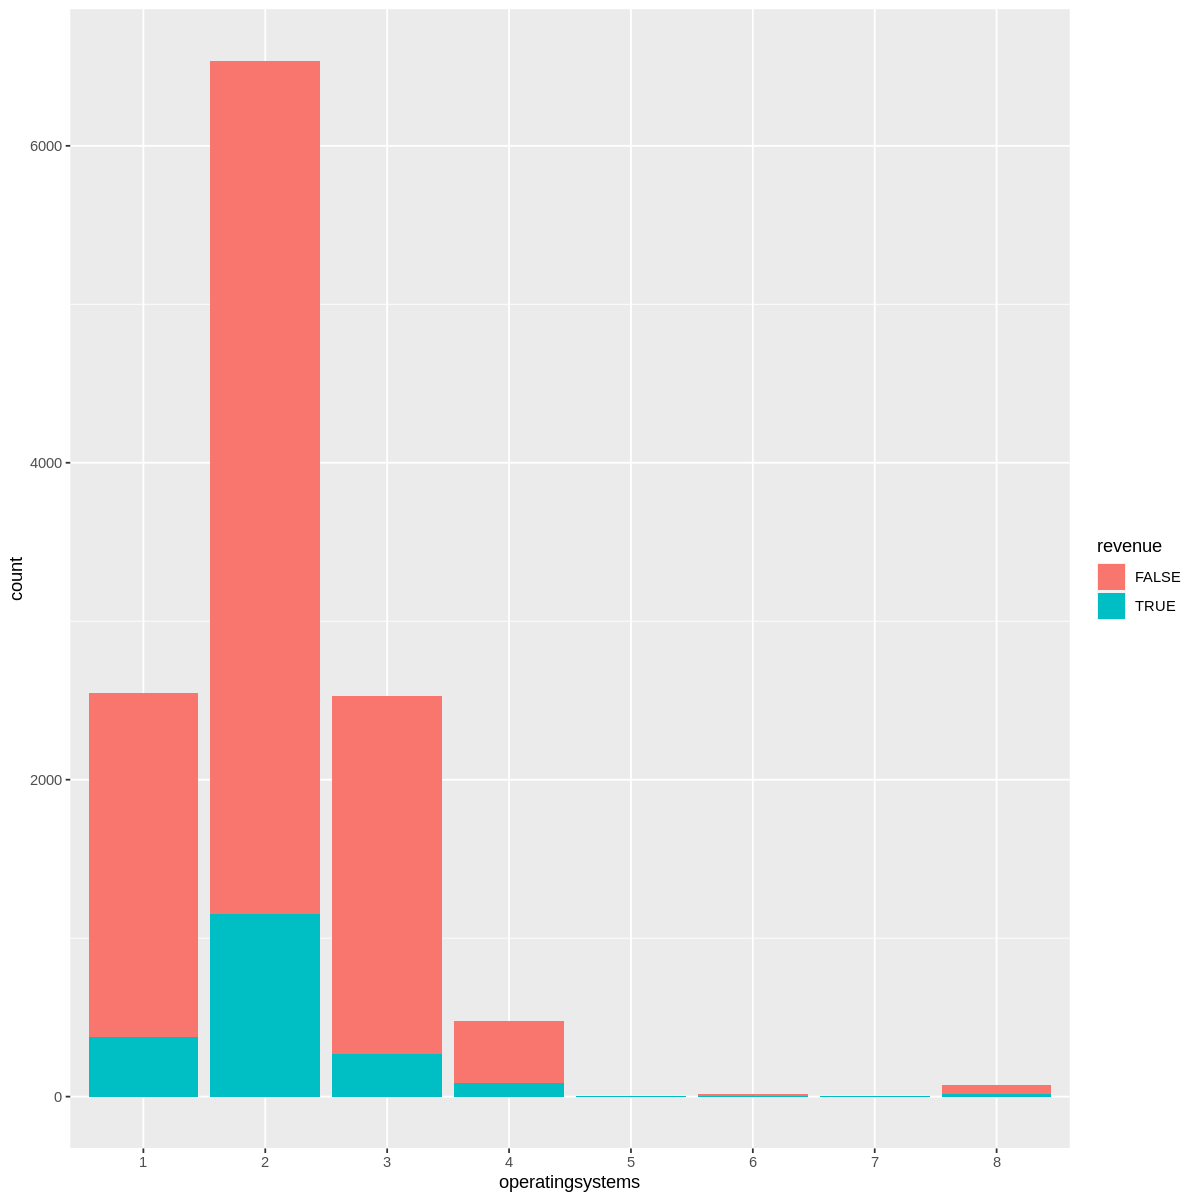

In [63]:
#Operating system Vs Revenue
# stacked bar chart
library(ggplot2)
ggplot(data_unique, 
       aes(x = operatingsystems, 
           fill = revenue)) + 
  geom_bar(position = "stack")

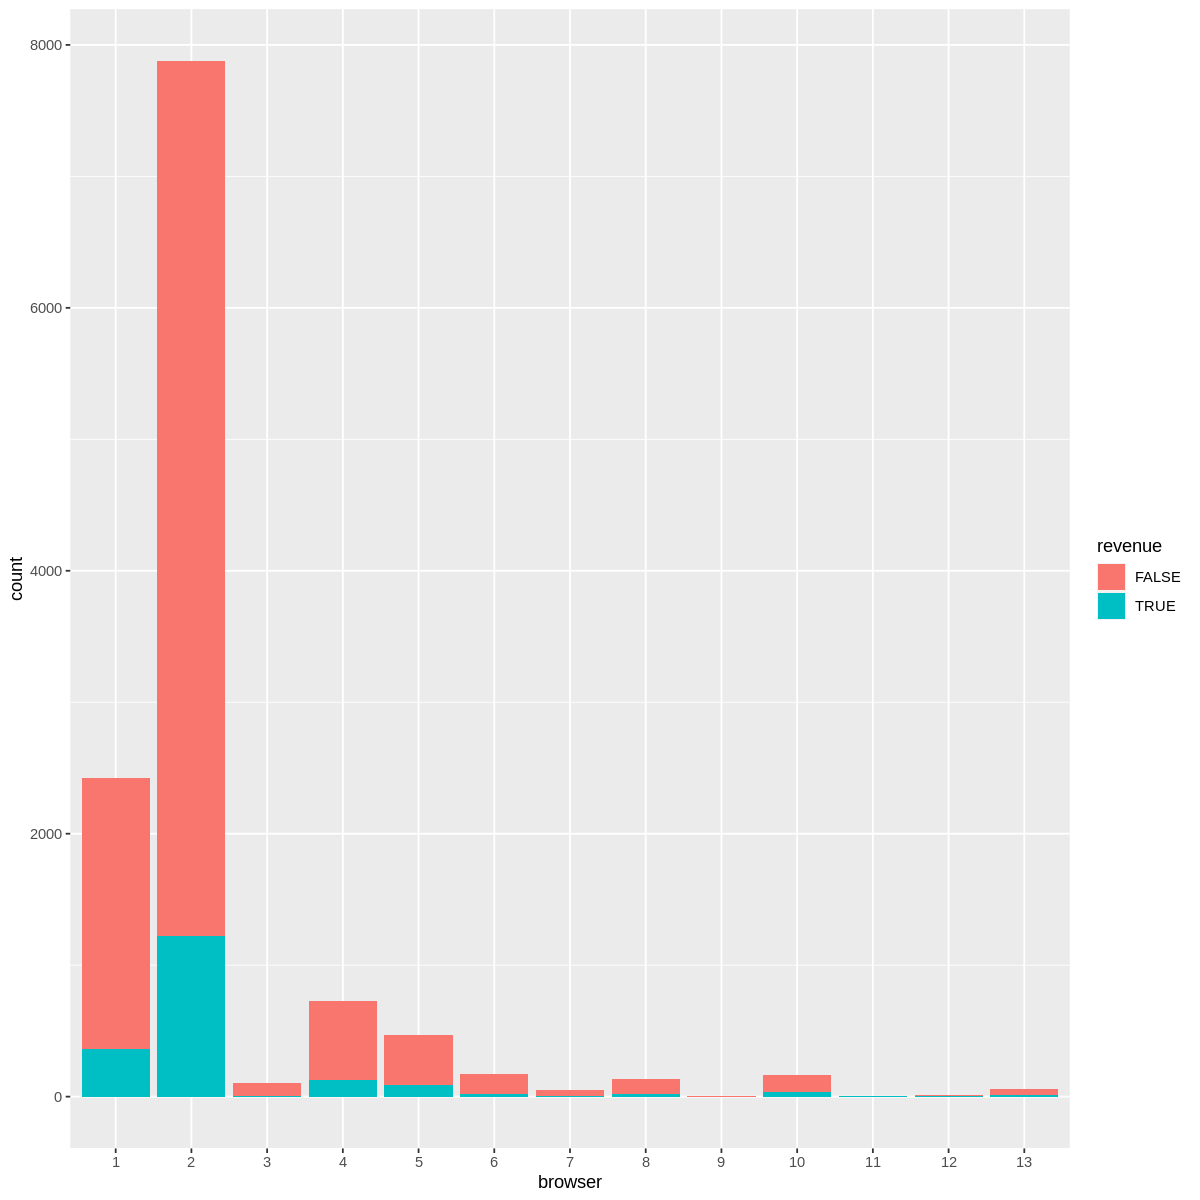

In [64]:
#Browser Vs Revenue
# stacked bar chart
ggplot(data_unique, 
       aes(x = browser, 
           fill = revenue)) + 
  geom_bar(position = "stack")

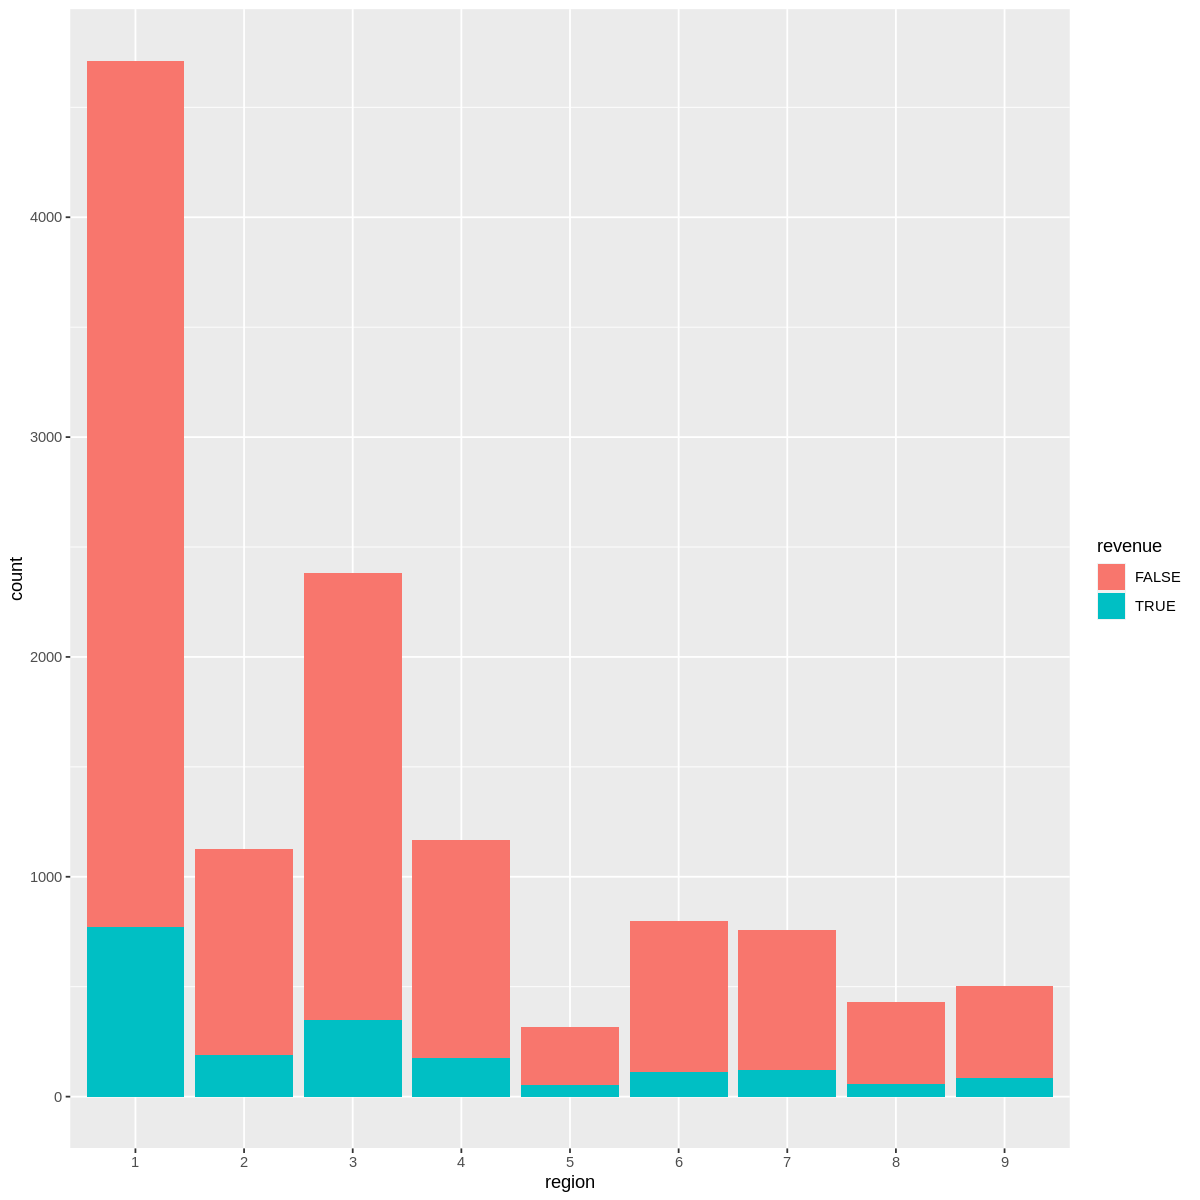

In [65]:
#Region Vs Revenue
# stacked bar chart
ggplot(data_unique, 
       aes(x = region, 
           fill = revenue)) + 
  geom_bar(position = "stack")

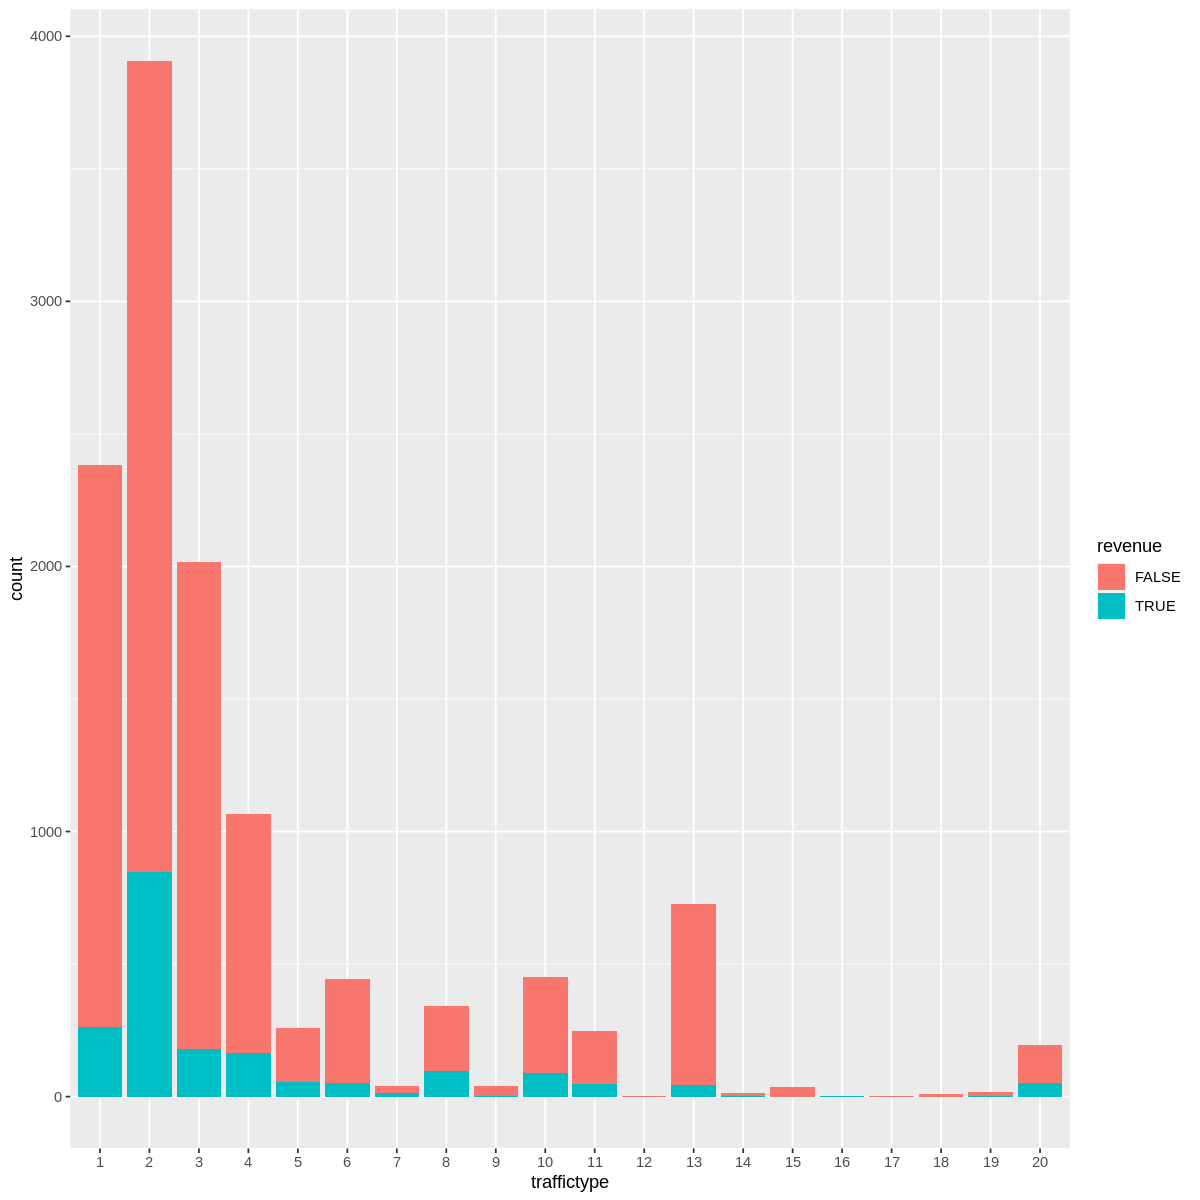

In [66]:
#Traffic type Vs Revenue.
# stacked bar chart
ggplot(data_unique, 
       aes(x = traffictype, 
           fill = revenue)) + 
  geom_bar(position = "stack")

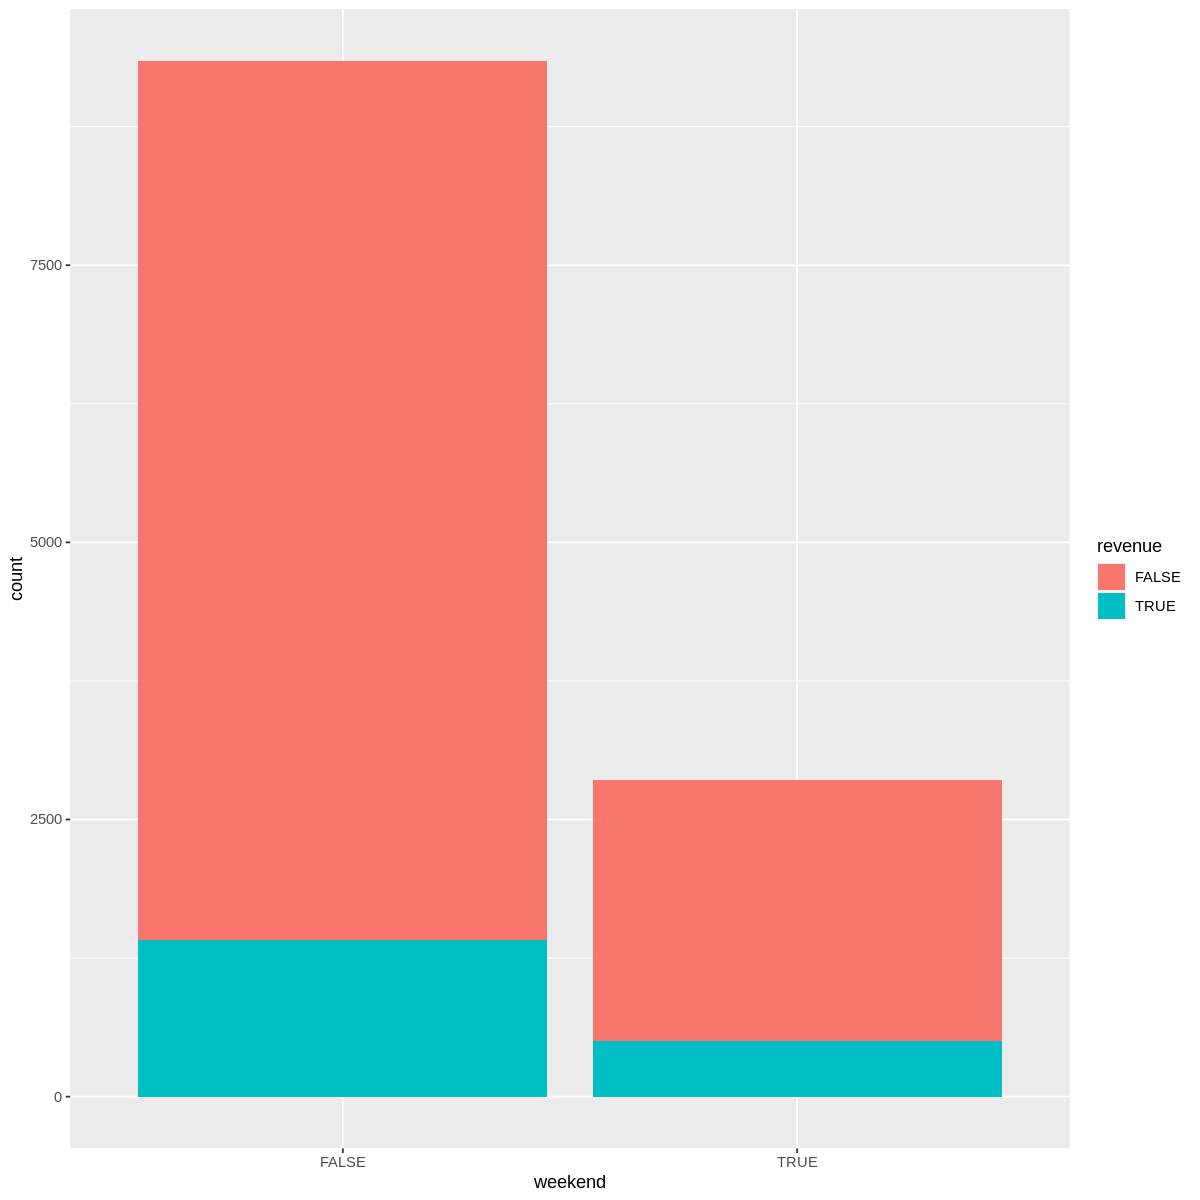

In [67]:
#Weekend Vs Revenue
# stacked bar chart
ggplot(data_unique, 
       aes(x = weekend, 
           fill = revenue)) + 
  geom_bar(position = "stack")

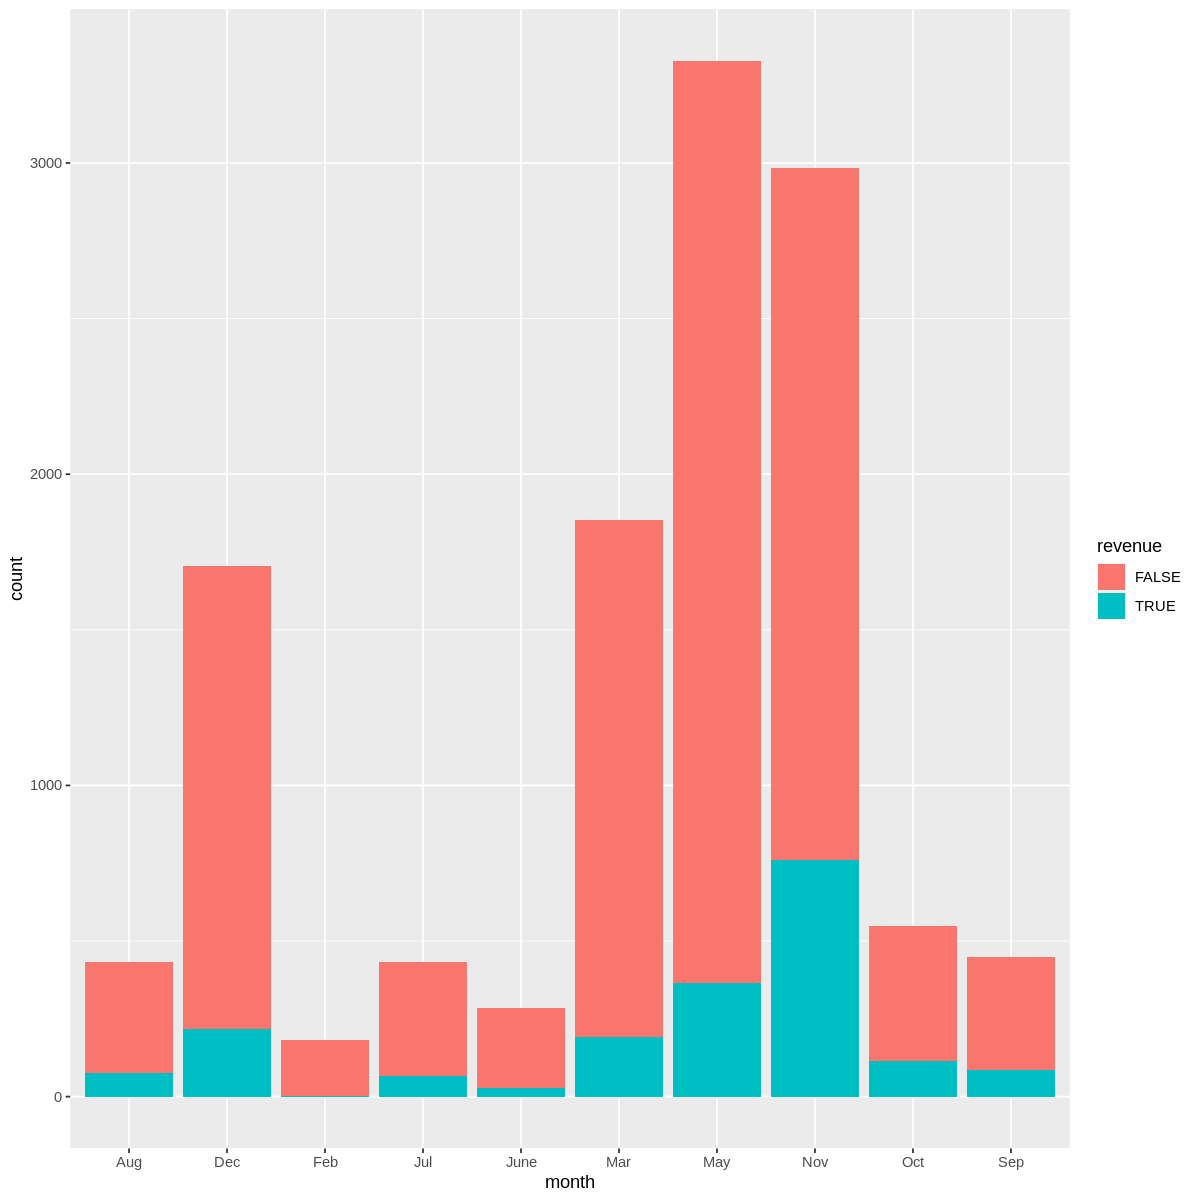

In [68]:
#Month Vs Revenue
# stacked bar chart
ggplot(data_unique, 
       aes(x = month, 
           fill = revenue)) + 
  geom_bar(position = "stack")

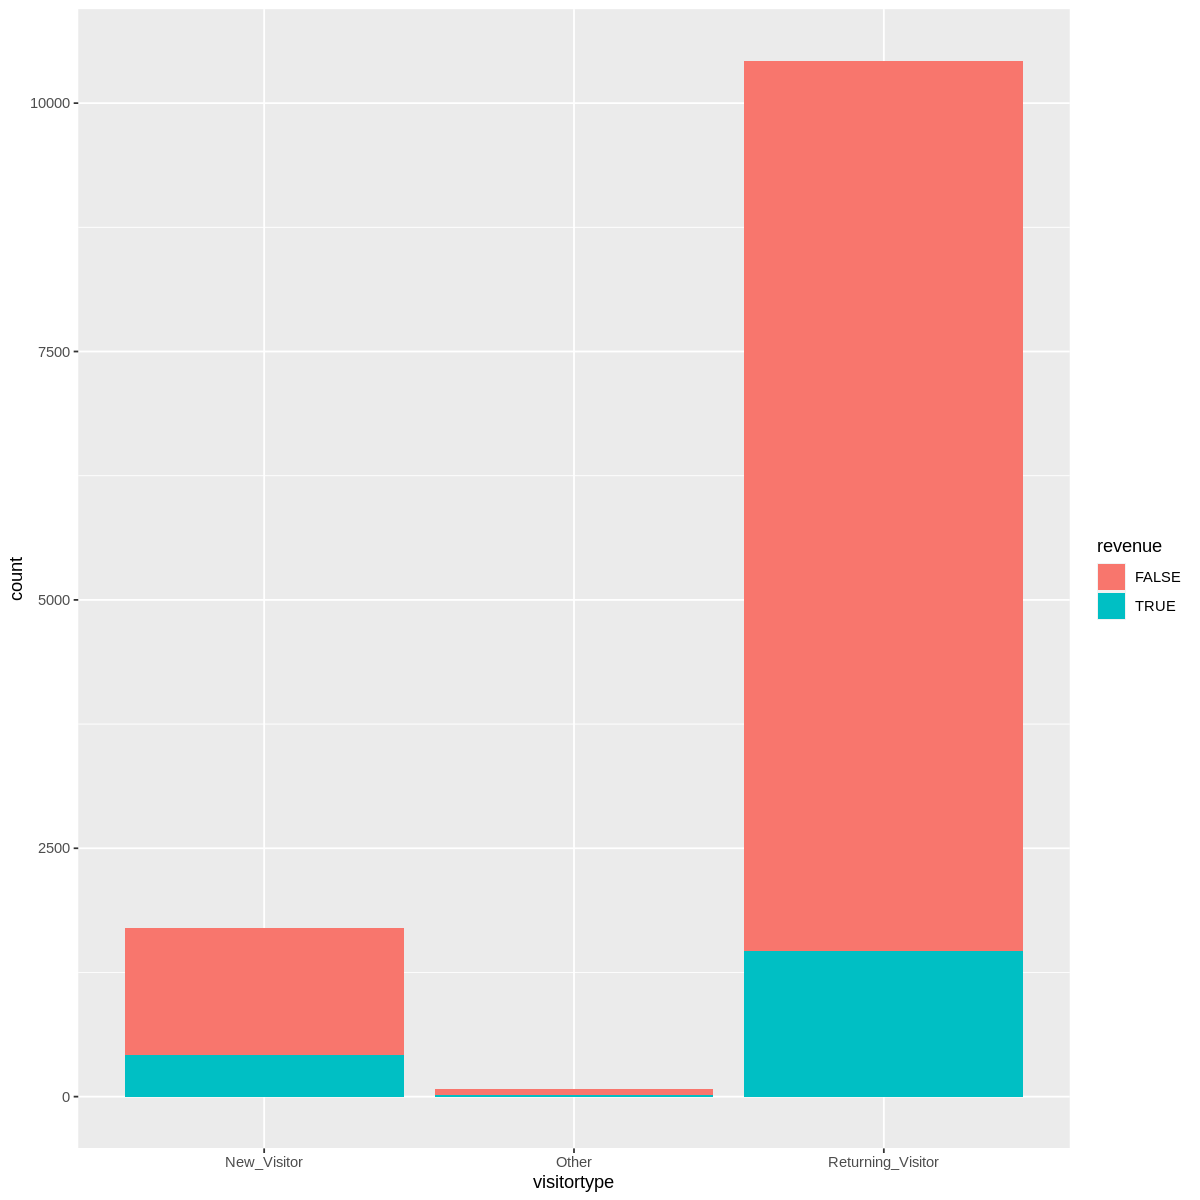

In [69]:
#Visitor type Vs Revenue
# stacked bar chart
ggplot(data_unique, 
       aes(x = visitortype, 
           fill = revenue)) + 
  geom_bar(position = "stack")

#**Multivariate Analysis**

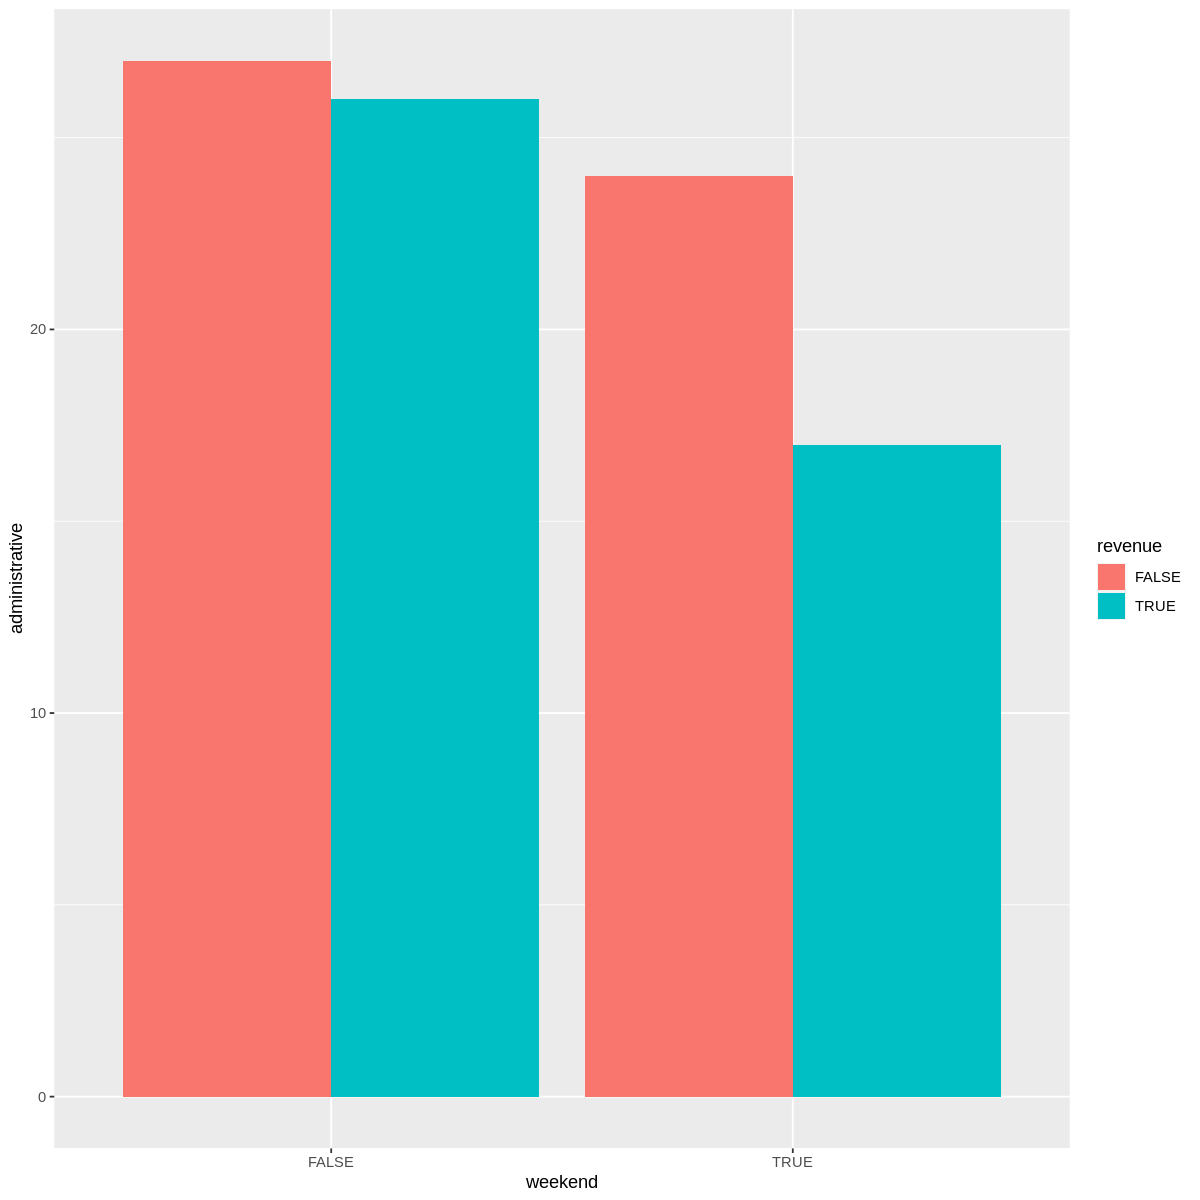

In [70]:
#A multivariate plot showing the relationship between revenue, administrative and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=administrative, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

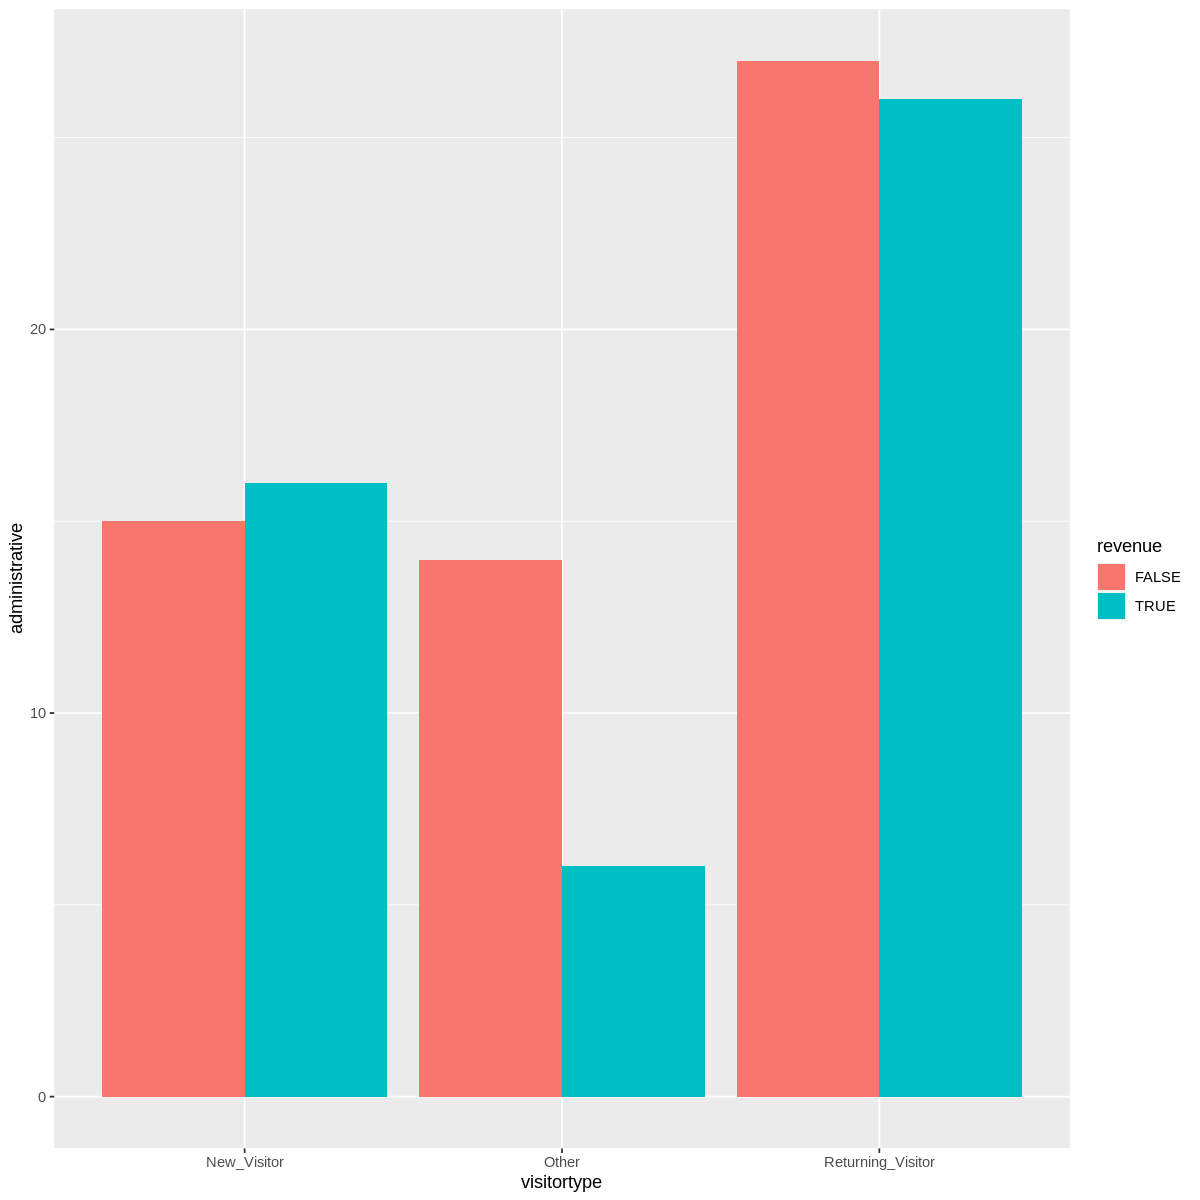

In [71]:
#A multivariate plot showing the relationship between revenue, administrative and visitor type.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=administrative, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

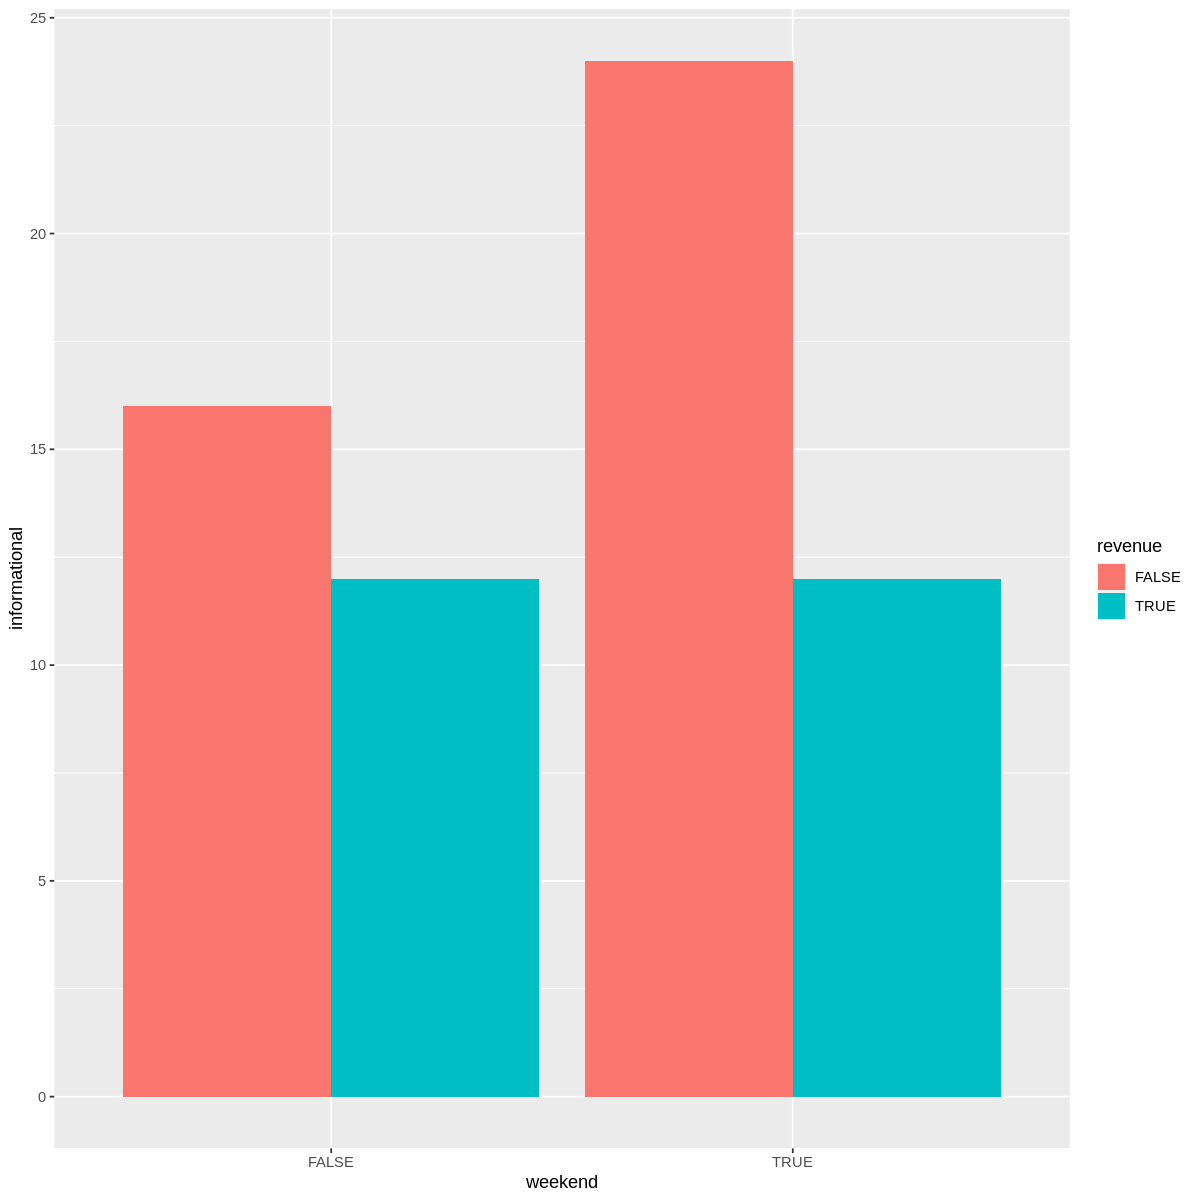

In [72]:
#A multivariate plot showing the relationship between revenue, informational and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=informational, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

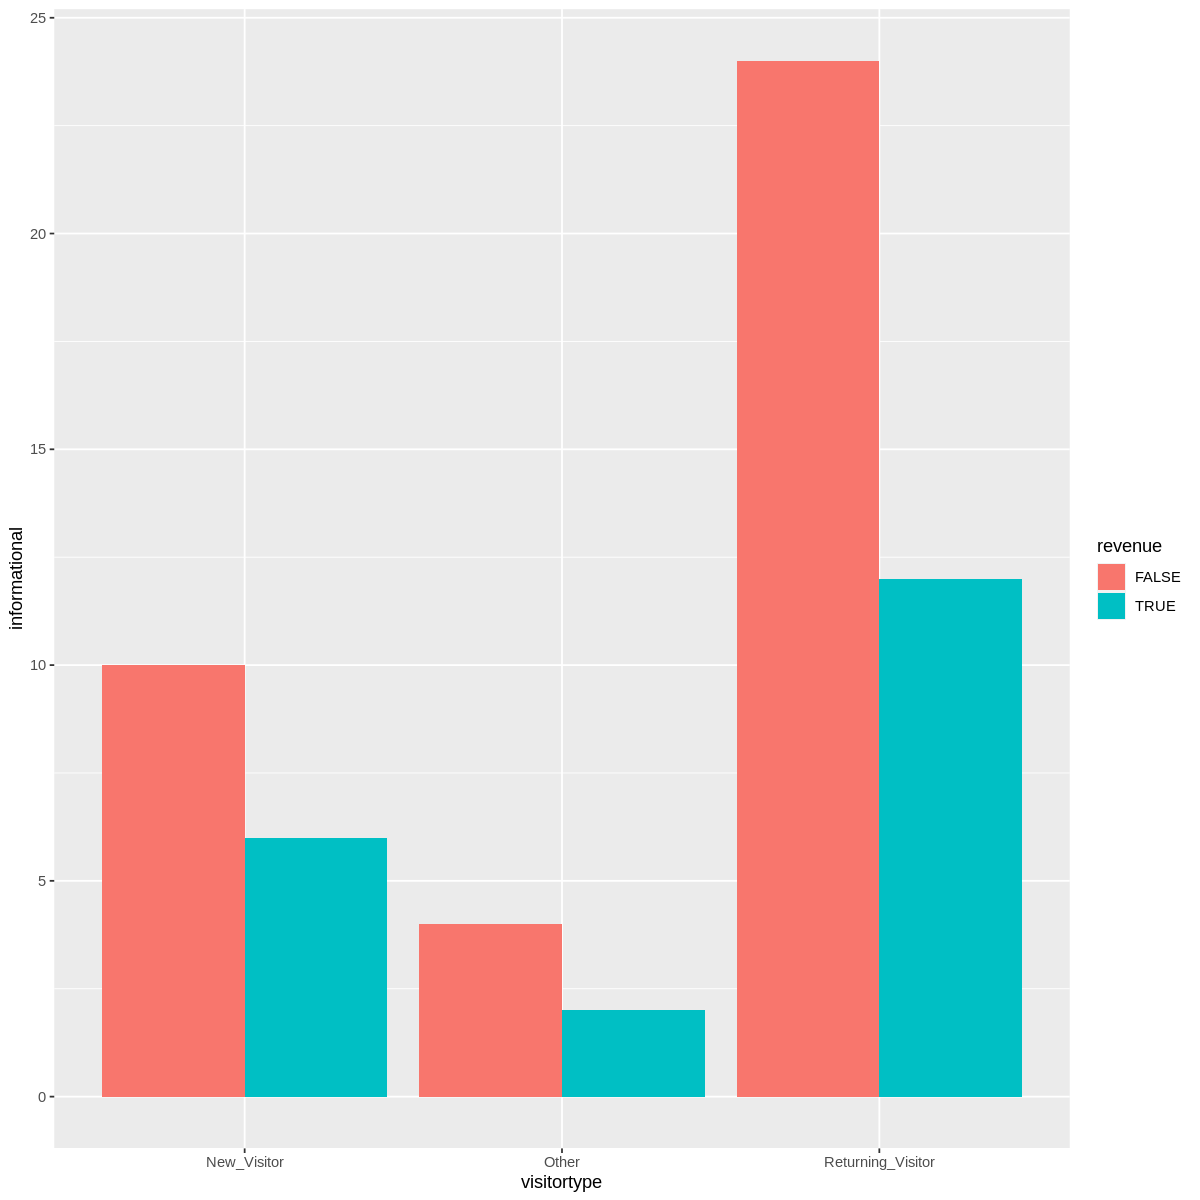

In [73]:
#A multivariate plot showing the relationship between revenue, informational and visitopr type.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=informational, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

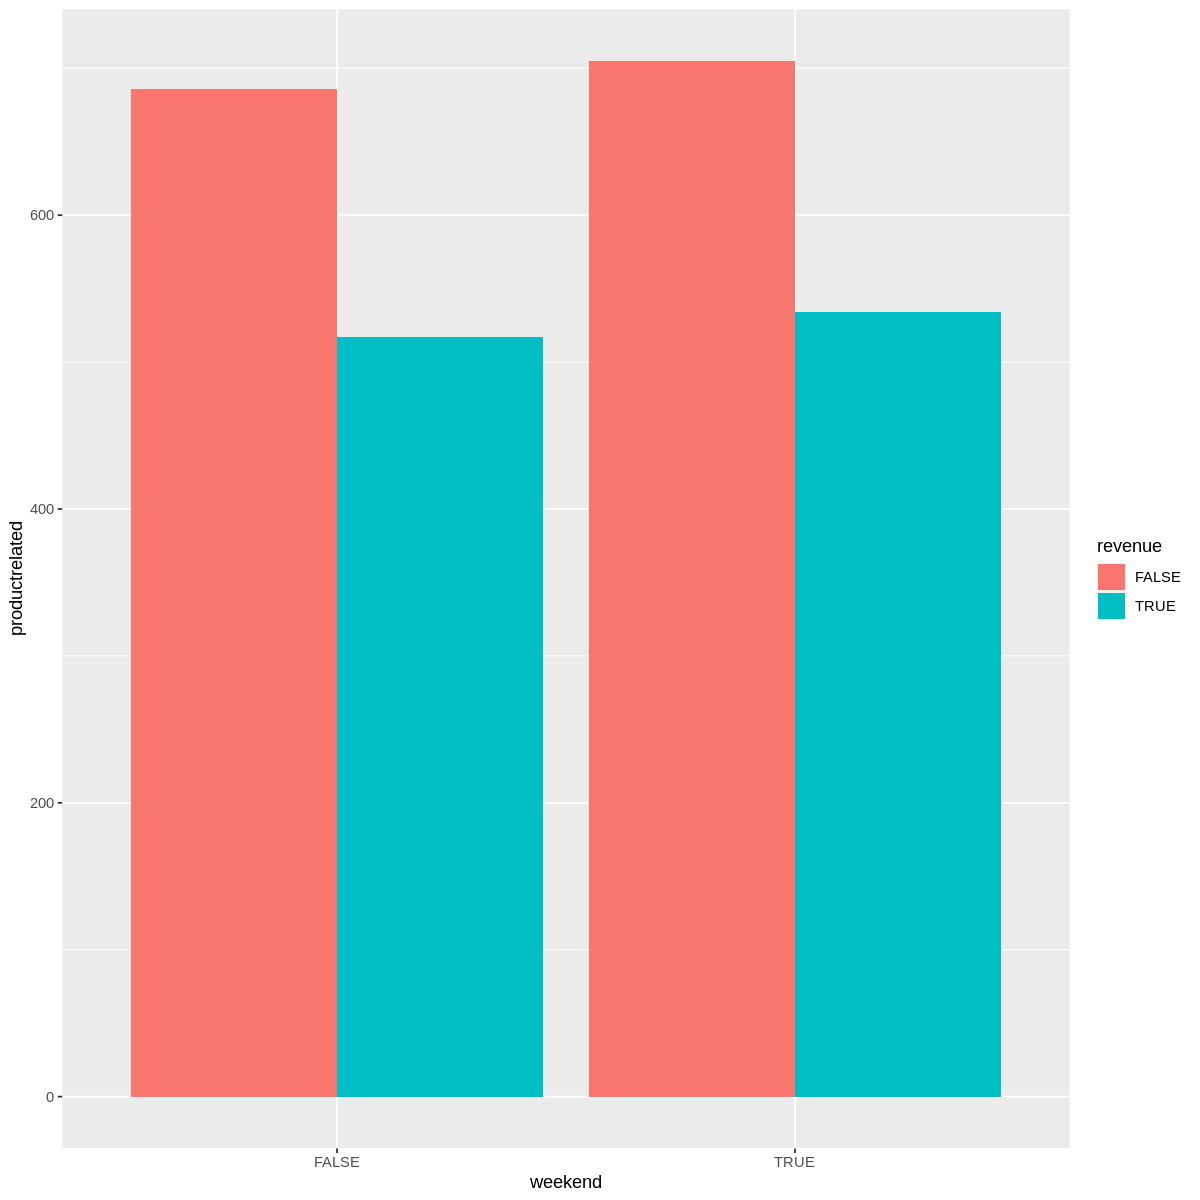

In [74]:
#A multivariate plot showing the relationship between revenue, productrelated and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=productrelated, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

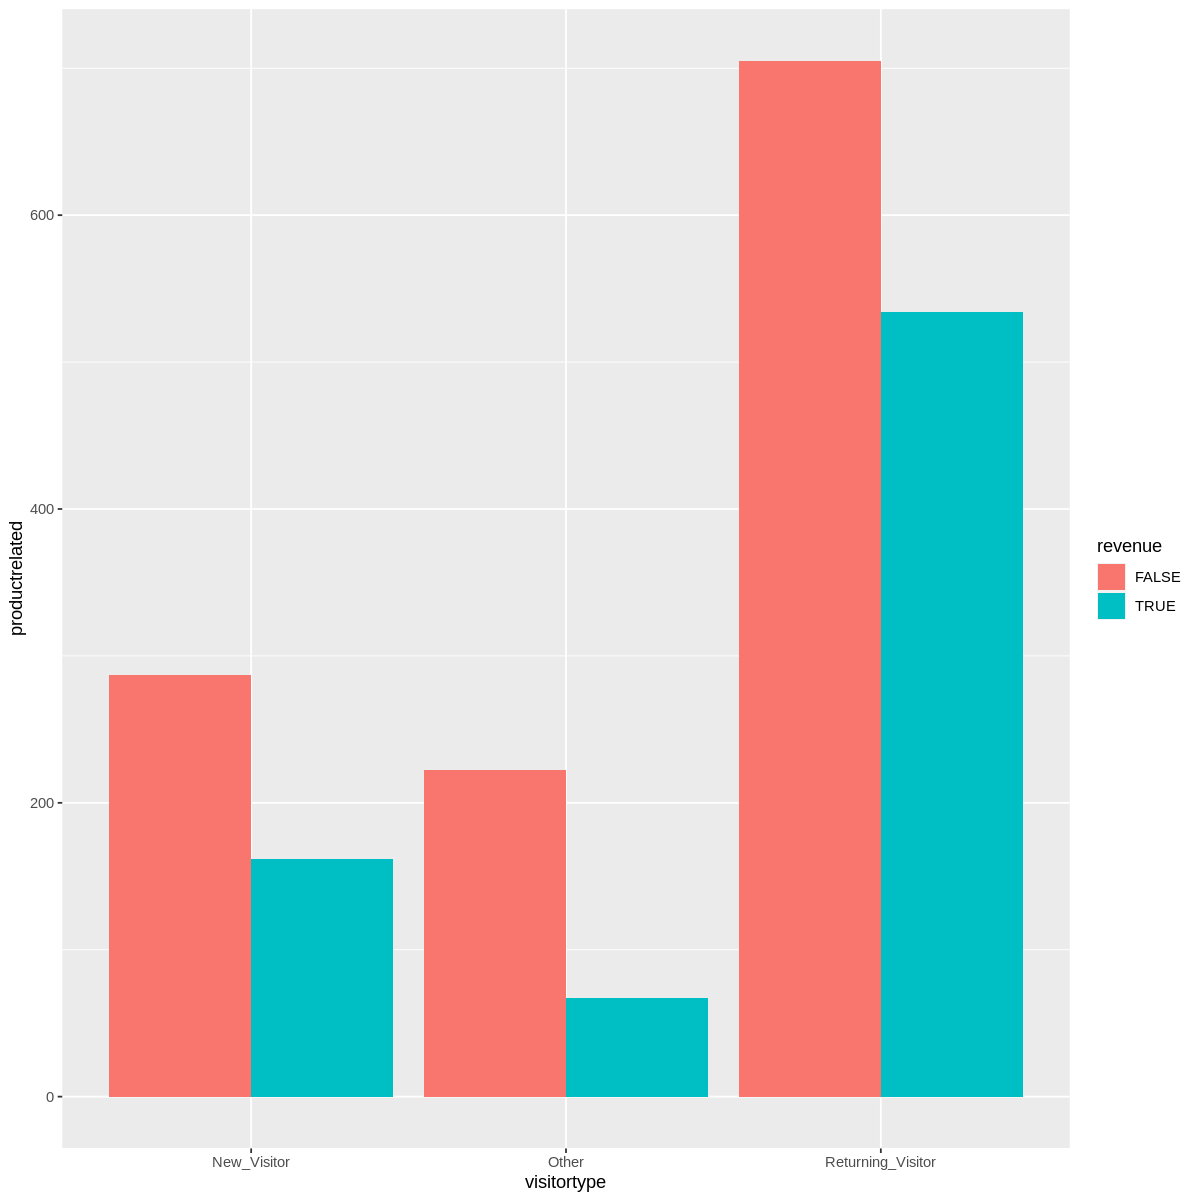

In [75]:
#A multivariate plot showing the relationship between revenue, productrelated and visitor type.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=productrelated, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

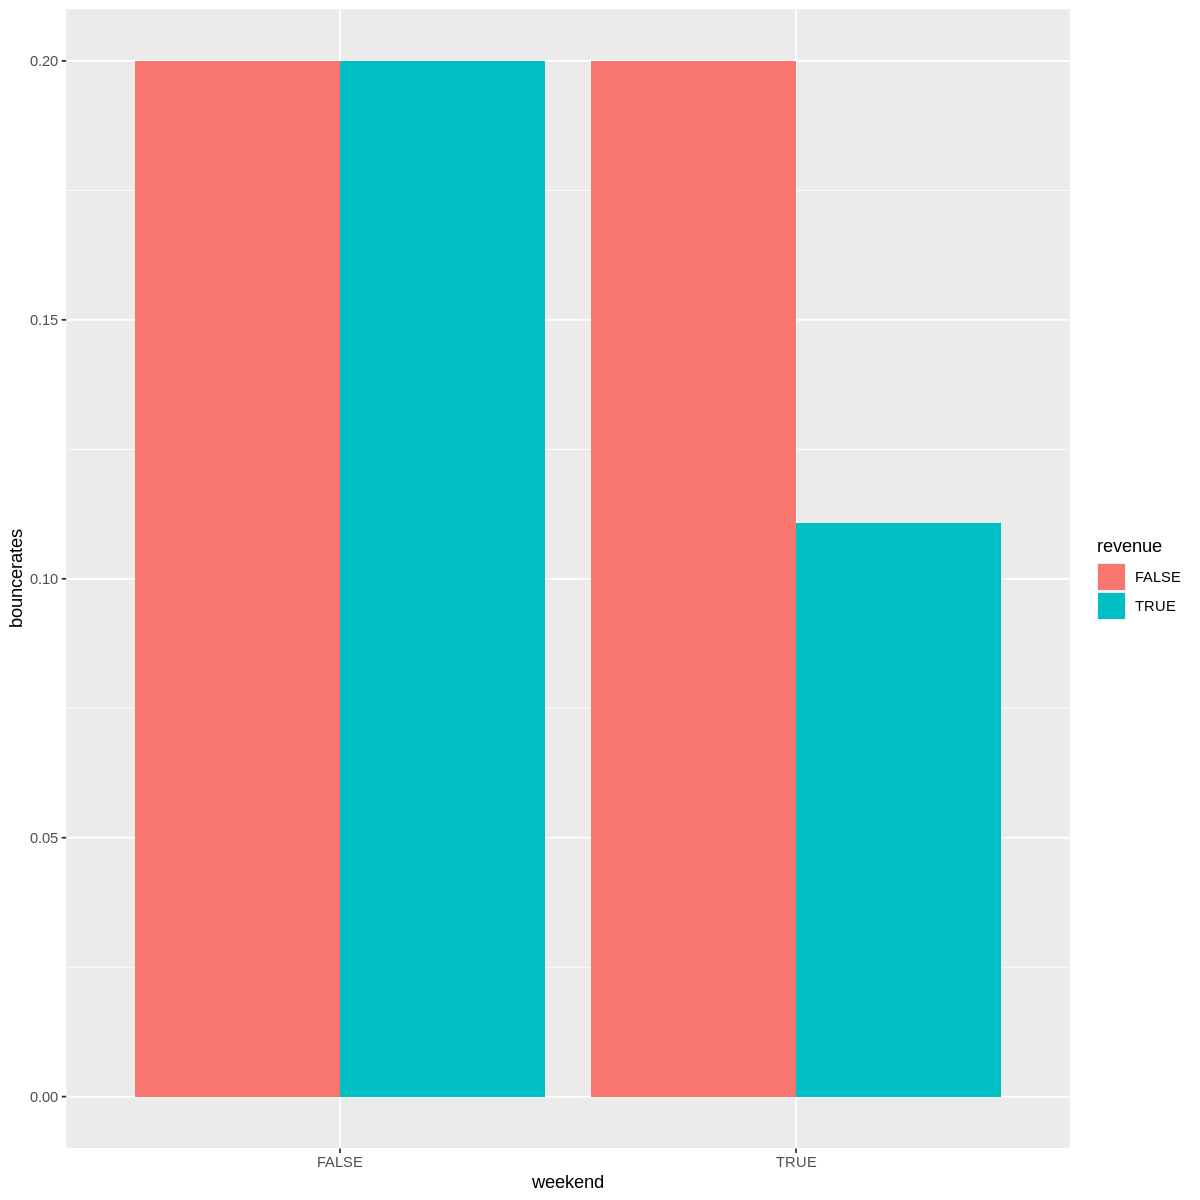

In [76]:
#A multivariate plot showing the relationship between revenue, bouncerates and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=bouncerates, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

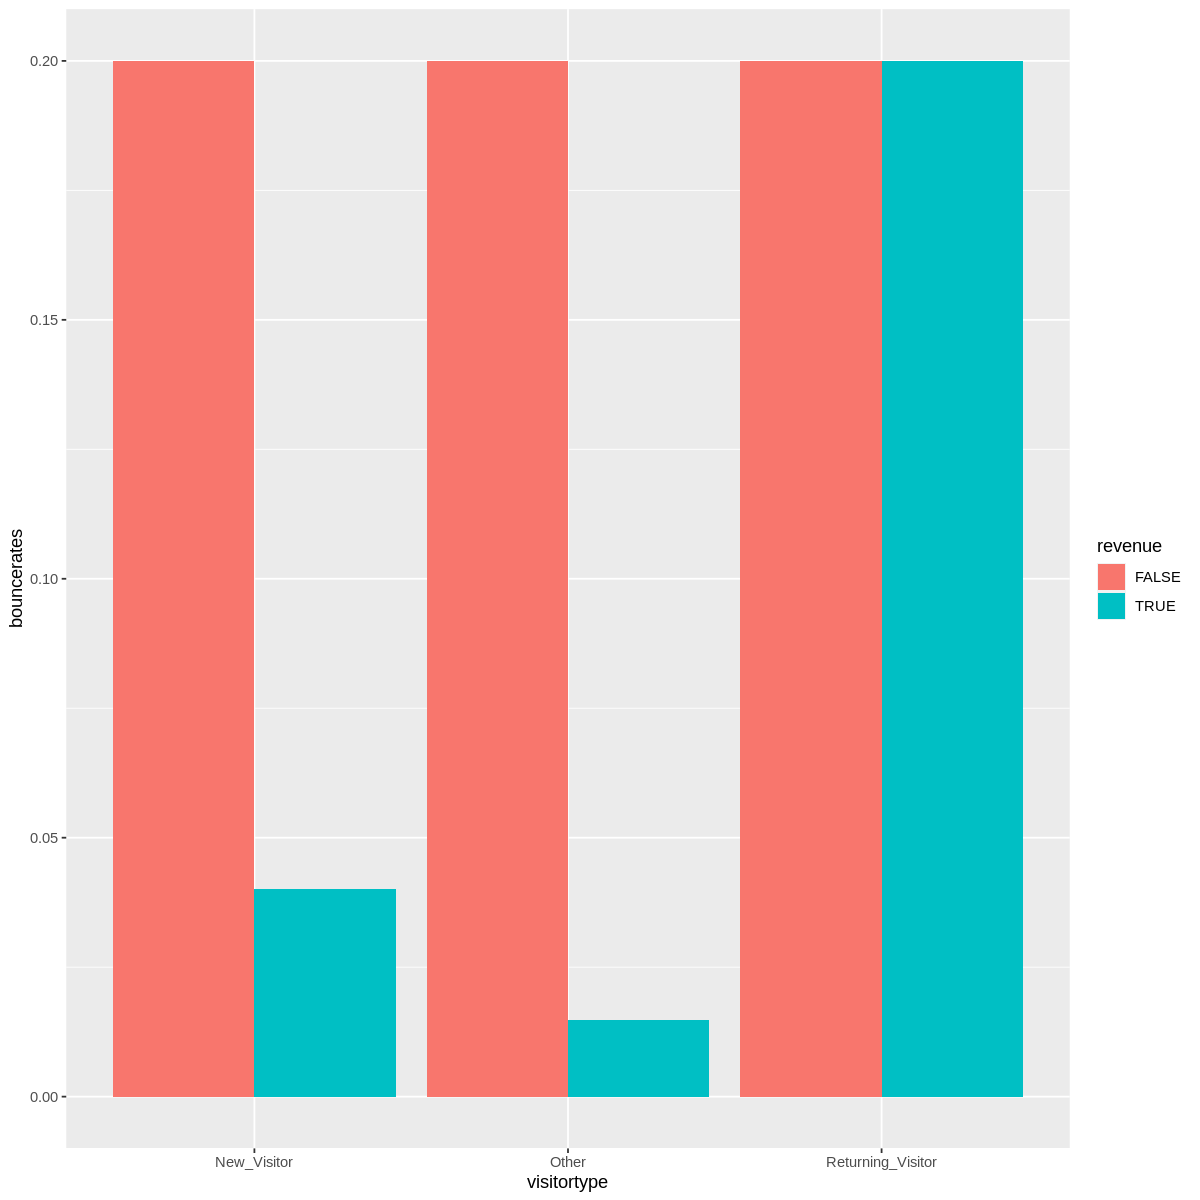

In [77]:
#A multivariate plot showing the relationship between revenue, bounce rates and visitor type.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=bouncerates, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

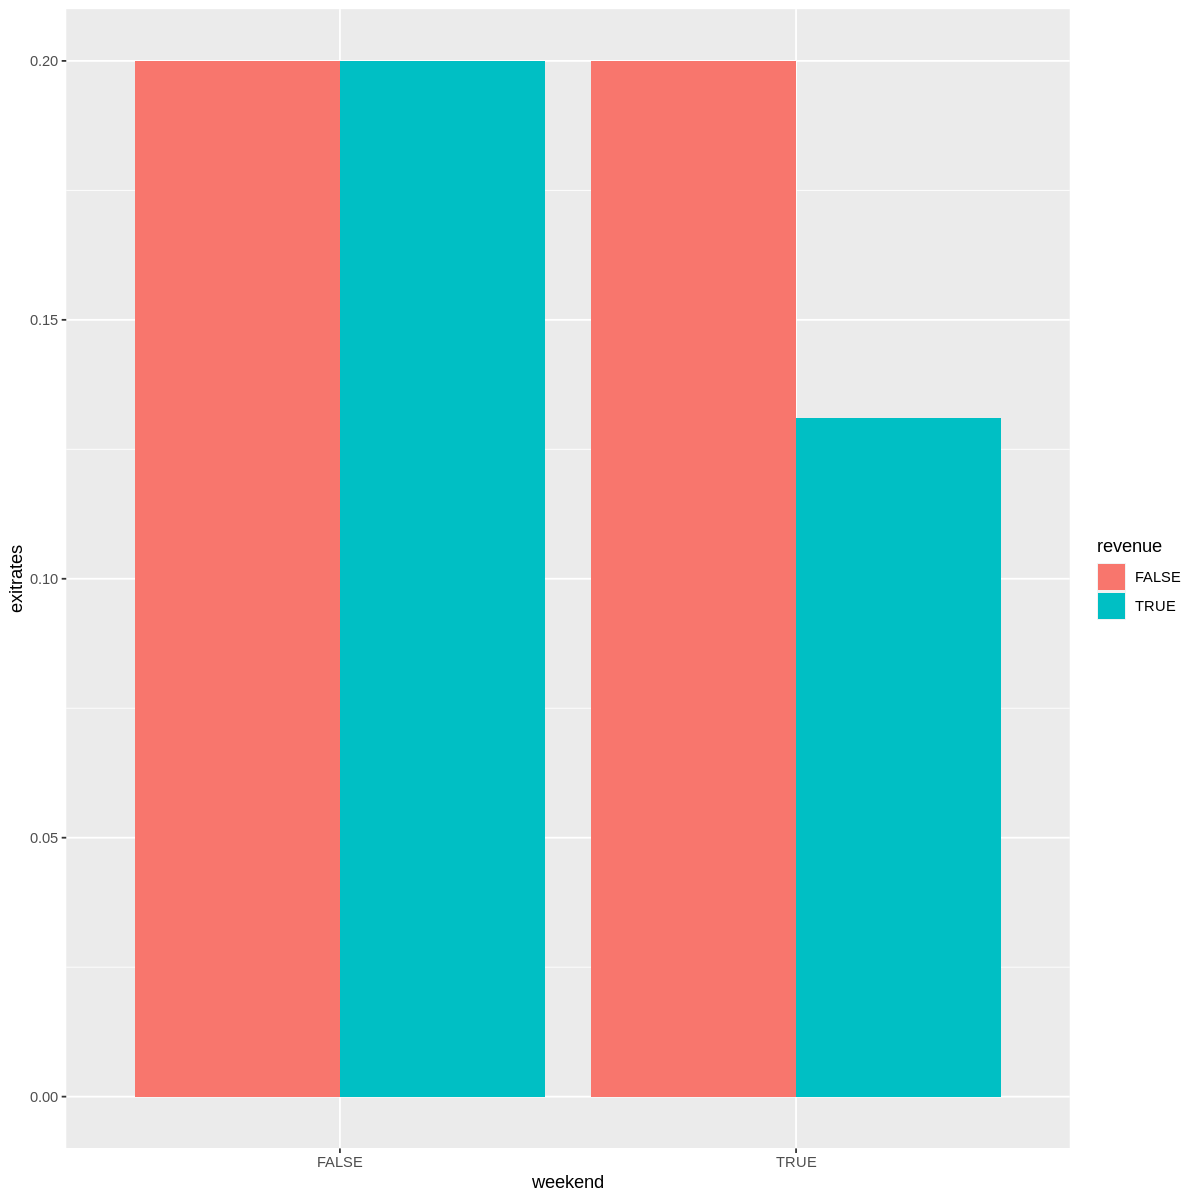

In [78]:
#A multivariate plot showing the relationship between revenue, exitrates and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=exitrates, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

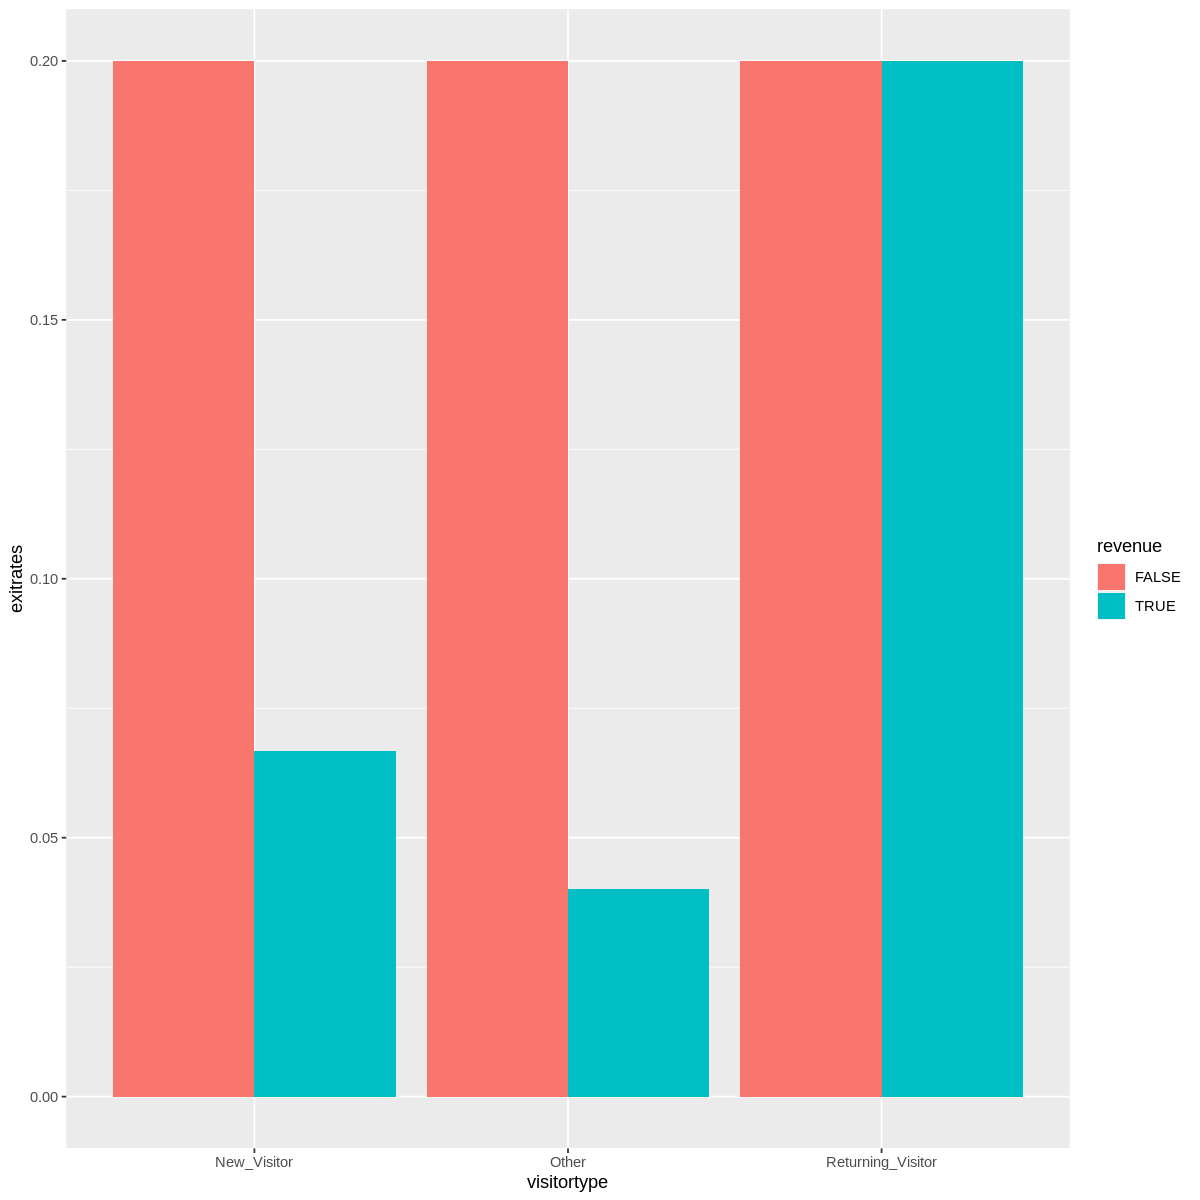

In [79]:
#A multivariate plot showing the relationship between revenue, exitrates and visitor type.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=exitrates, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

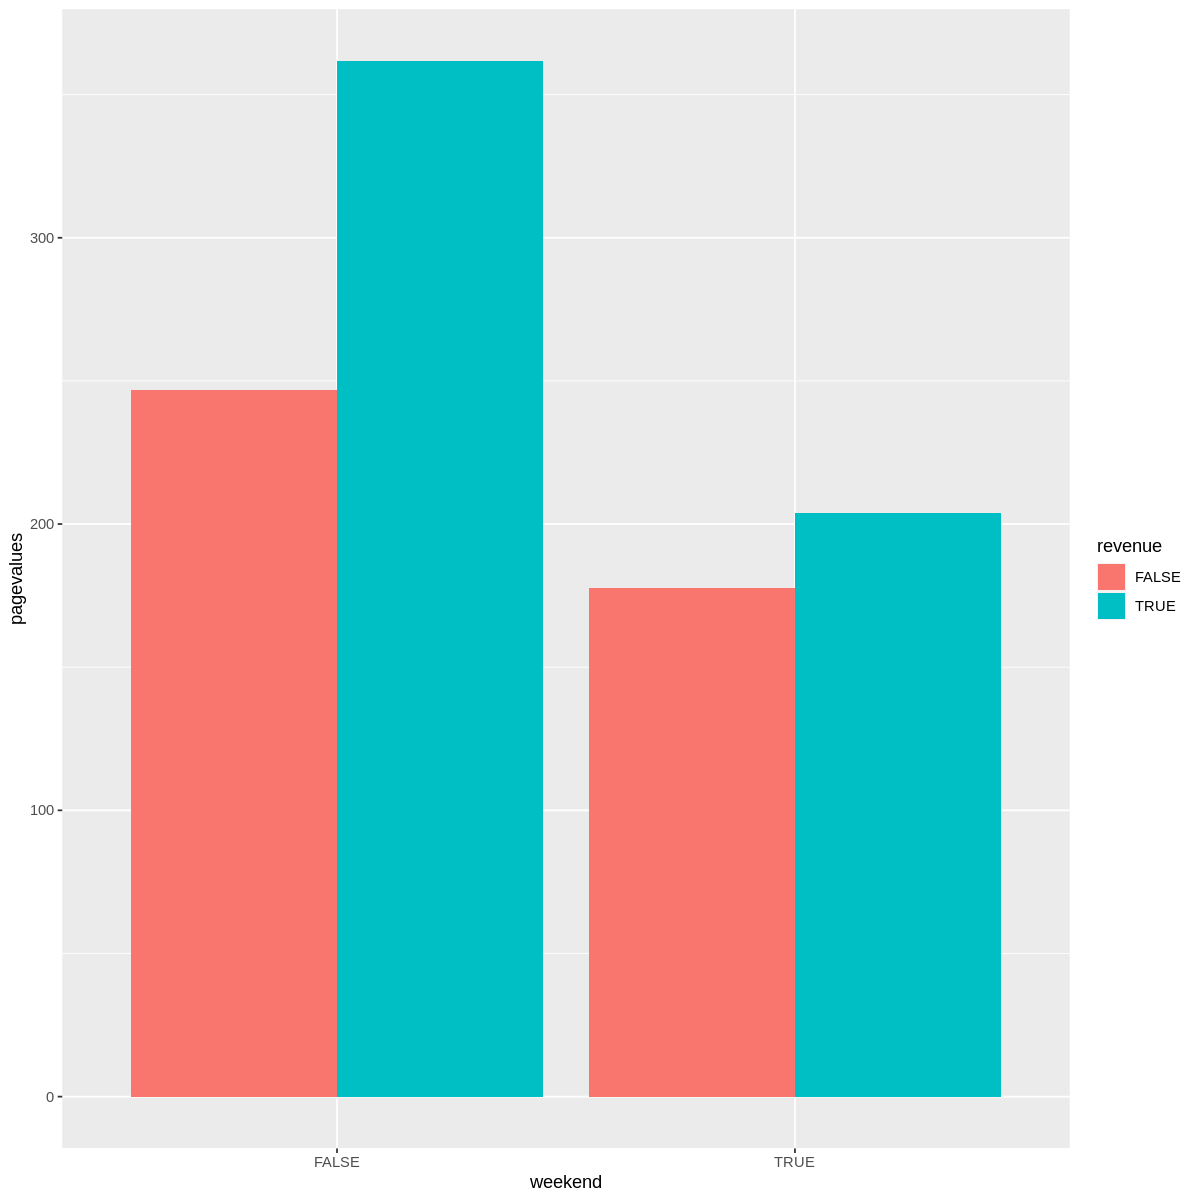

In [80]:
#A multivariate plot showing the relationship between revenue, page values and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=pagevalues, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

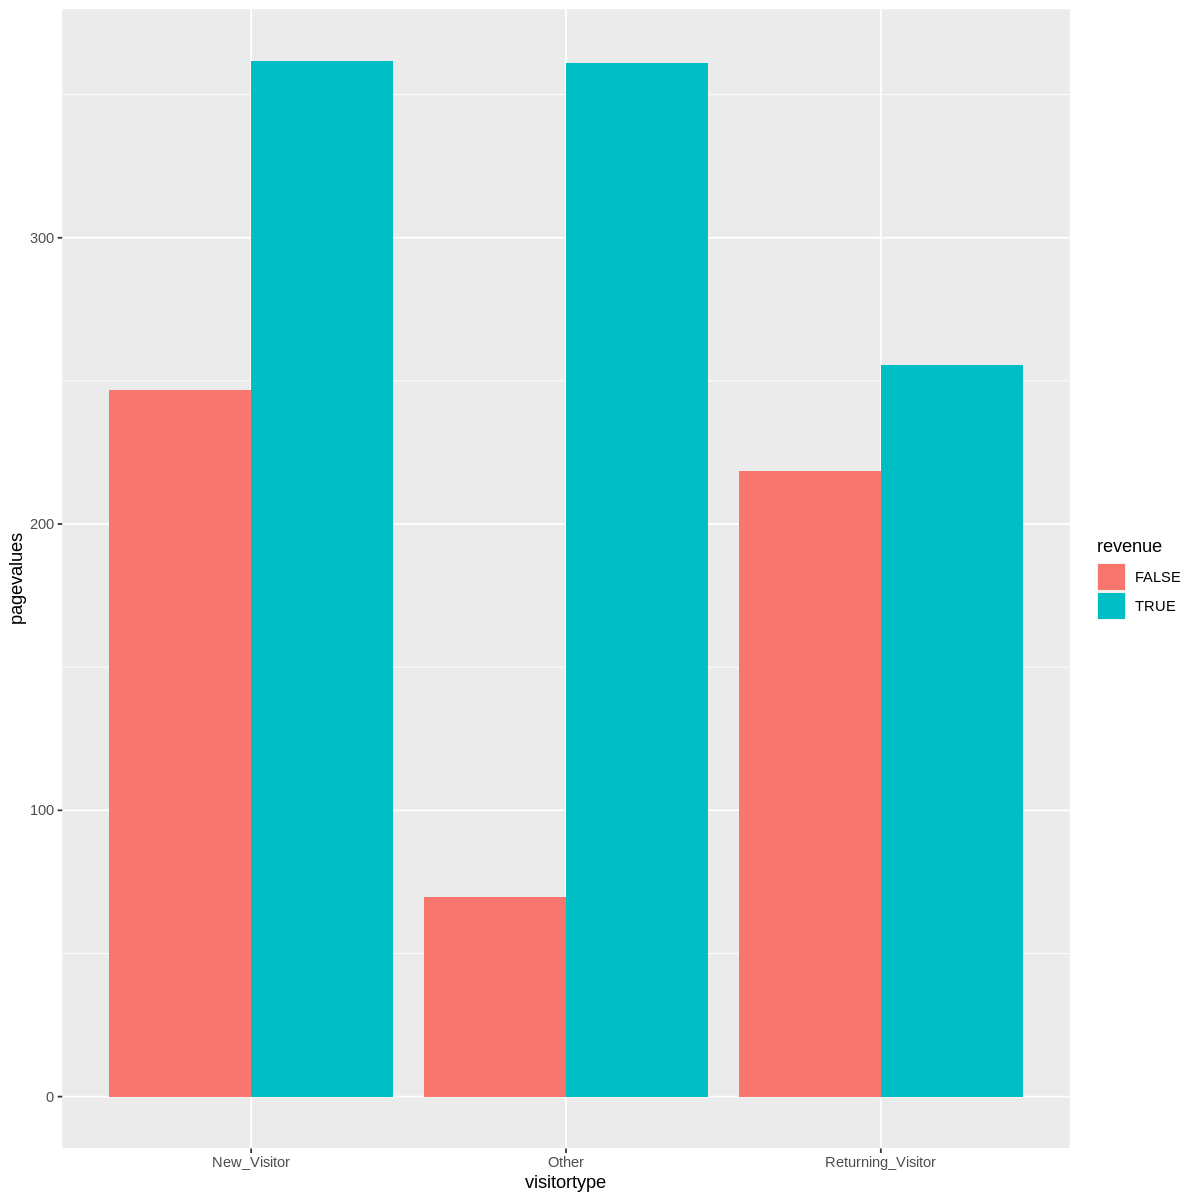

In [81]:
#A multivariate plot showing the relationship between revenue, administrative and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=pagevalues, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

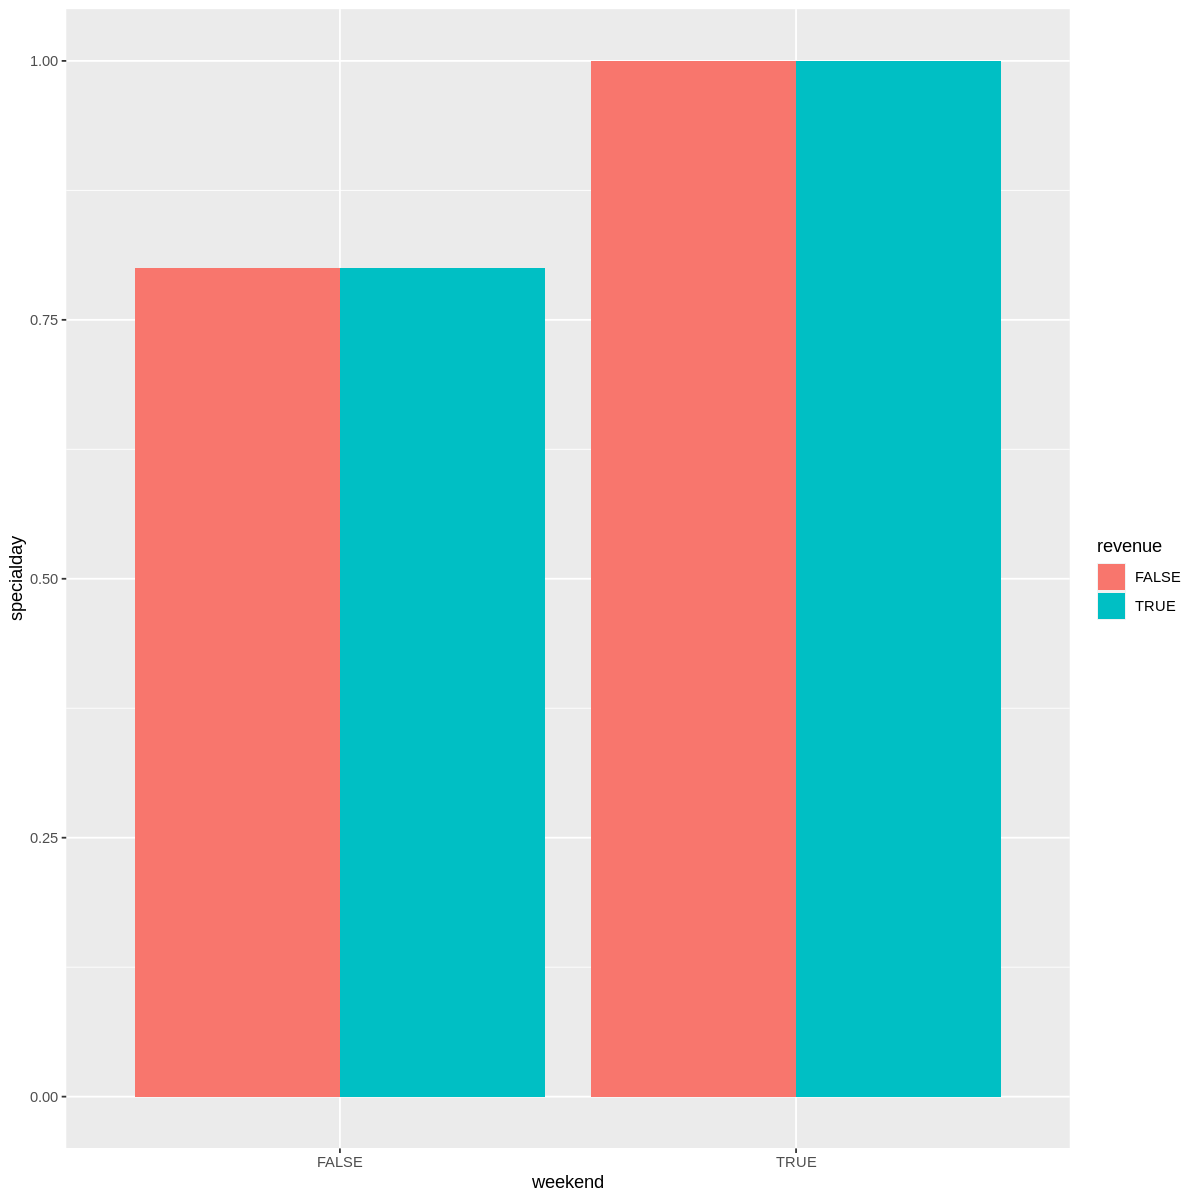

In [82]:
#A multivariate plot showing the relationship between revenue, specialday and weekend.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=specialday, x=weekend)) + 
    geom_bar(position="dodge", stat="identity")

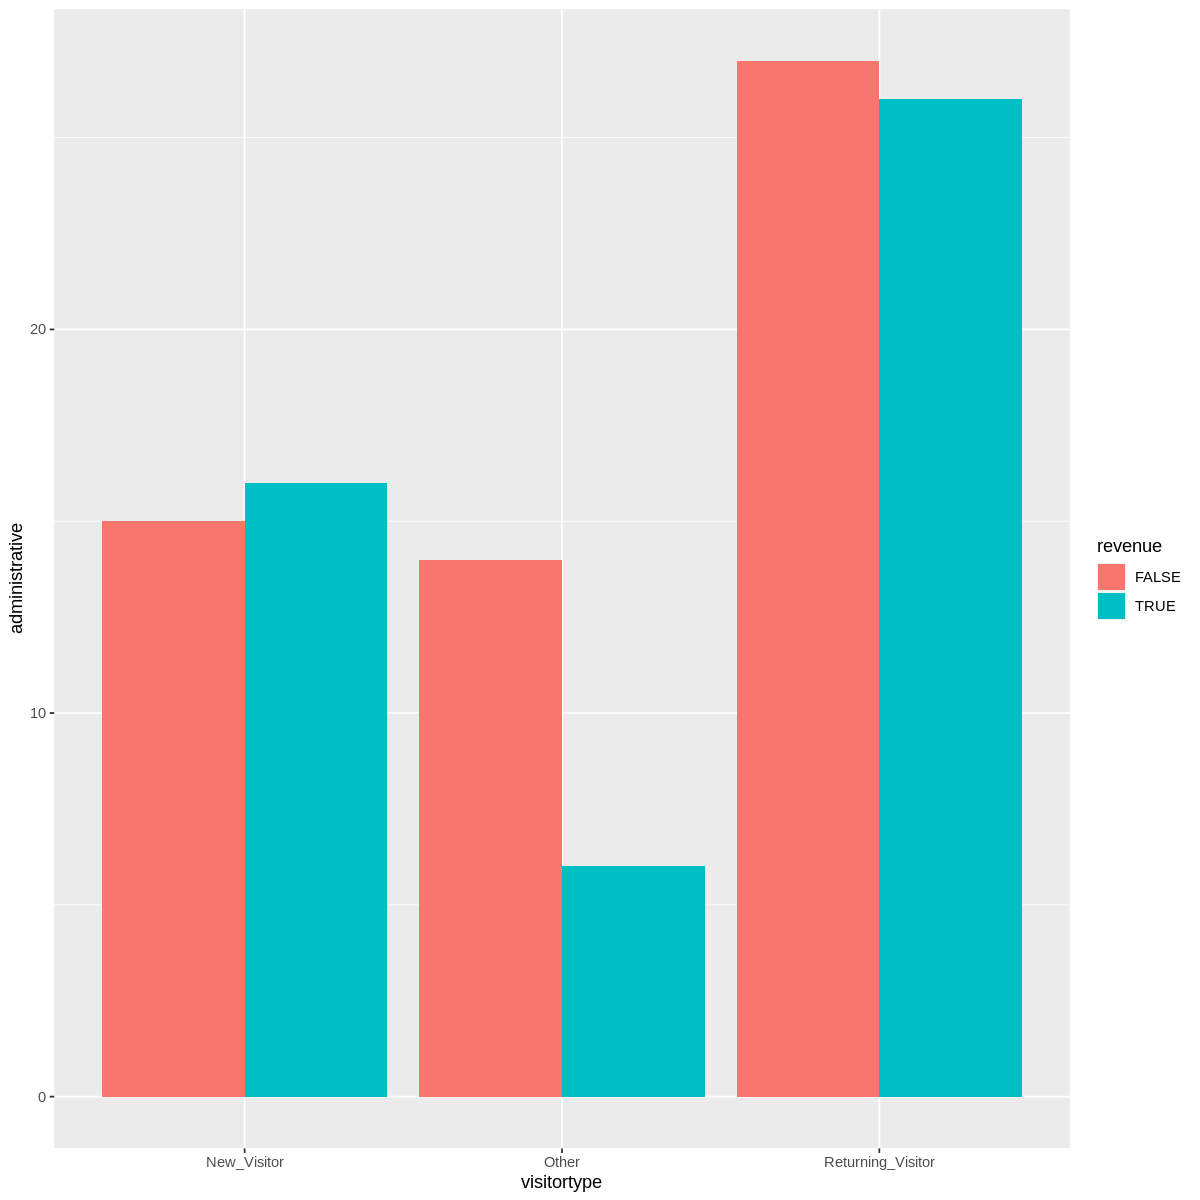

In [83]:
#A multivariate plot showing the relationship between revenue, visitor type and administrative.
library(ggplot2)
ggplot(data_unique, aes(fill=revenue, y=administrative, x=visitortype)) + 
    geom_bar(position="dodge", stat="identity")

#**Reduction**

In [84]:
#Checking the redundant variables.
install.packages('caret', dependencies = TRUE)
library(caret)
findCorrelation(corr_data,cutoff = .6, verbose = TRUE, names = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘lazyeval’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘rex’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘superpc’, ‘Cubist’, ‘cov

Compare row 6  and column  5 with corr  0.86 
  Means:  0.314 vs 0.222 so flagging column 6 
Compare row 1  and column  2 with corr  0.6 
  Means:  0.297 vs 0.207 so flagging column 1 
Compare row 8  and column  7 with corr  0.903 
  Means:  0.278 vs 0.179 so flagging column 8 
Compare row 3  and column  4 with corr  0.619 
  Means:  0.25 vs 0.146 so flagging column 3 
All correlations <= 0.6 


[1] "productrelated_duration" "administrative"         
[3] "exitrates"               "informational"

The highly correlated variables that need to be dropped to avoid redundancy are productrelated duration, administrative, exitrates and informational.

In [85]:
#Dropping the redundant variables.
data_unique = subset(data_unique,select = -c(productrelated_duration, administrative, exitrates, informational))
head(data_unique)

administrative_duration informational_duration productrelated bouncerates
1  0                       0                      1             0.20000000 
2  0                       0                      2             0.00000000 
3 -1                      -1                      1             0.20000000 
4  0                       0                      2             0.05000000 
5  0                       0                     10             0.02000000 
6  0                       0                     19             0.01578947 
  pagevalues specialday month operatingsystems browser region traffictype
1 0          0          Feb   1                1       1      1          
2 0          0          Feb   2                2       1      2          
3 0          0          Feb   4                1       9      3          
4 0          0          Feb   3                2       2      4          
5 0          0          Feb   3                3       1      4          
6 0          0          Feb   2                2       1      3          
  visitortype       weekend revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor TRUE    FALSE  
6 Returning_Visitor FALSE   FALSE

#**Modelling**

#**Supervised Models**

In [86]:
#Encoding the revenue, weekend, month and visitortype columns.
data_unique$weekend <- ifelse(data_unique$weekend == "TRUE",1,0)
data_unique$month <- as.numeric(data_unique$month)
data_unique$visitortype <- as.numeric(data_unique$visitortype)
data_unique$operatingsystems <- as.numeric(data_unique$operatingsystems)
data_unique$browser <- as.numeric(data_unique$browser)
data_unique$region <- as.numeric(data_unique$region)
data_unique$traffictype <- as.numeric(data_unique$traffictype)

head(data_unique)

administrative_duration informational_duration productrelated bouncerates
1  0                       0                      1             0.20000000 
2  0                       0                      2             0.00000000 
3 -1                      -1                      1             0.20000000 
4  0                       0                      2             0.05000000 
5  0                       0                     10             0.02000000 
6  0                       0                     19             0.01578947 
  pagevalues specialday month operatingsystems browser region traffictype
1 0          0          3     1                1       1      1          
2 0          0          3     2                2       1      2          
3 0          0          3     4                1       9      3          
4 0          0          3     3                2       2      4          
5 0          0          3     3                3       1      4          
6 0          0          3     2                2       1      3          
  visitortype weekend revenue
1 3           0       FALSE  
2 3           0       FALSE  
3 3           0       FALSE  
4 3           0       FALSE  
5 3           1       FALSE  
6 3           0       FALSE

In [87]:
# Normalizing the dataset so that no particular attribute 
# has more impact on clustering algorithm than others.
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
data_unique$administrative_duration<- normalize(data_unique$administrative_duration)
data_unique$informational_duration<- normalize(data_unique$informational_duration)
data_unique$productrelated<- normalize(data_unique$productrelated)
data_unique$bouncerates<- normalize(data_unique$bouncerates)
data_unique$pagevalues<- normalize(data_unique$pagevalues)
data_unique$specialday<- normalize(data_unique$specialday)
data_unique$month<- normalize(data_unique$month)
data_unique$operatingsystems<- normalize(data_unique$operatingsystems)
data_unique$browser<- normalize(data_unique$browser)
data_unique$region<- normalize(data_unique$region)
data_unique$traffictype<- normalize(data_unique$traffictype)
data_unique$visitortype<- normalize(data_unique$visitortype)
data_unique$weekend<- normalize(data_unique$weekend)



In [88]:
#Randomizing the data.
shuffle_index <- sample(1:nrow(data_unique))
head(shuffle_index)

[1]  5174  6892  3424 10878  4498  9700

In [89]:
data_unique <- data_unique[shuffle_index, ]
head(data_unique)

administrative_duration informational_duration productrelated bouncerates
1 0.0091183175            0.0068617360           0.140425532    0.00980392 
2 0.0480035297            0.0003920992           0.008510638    0.07142857 
3 0.0380910361            0.0003920992           0.019858156    0.00000000 
4 0.0489741893            0.0003920992           0.066666667    0.04347826 
5 0.0002941393            0.0003920992           0.019858156    0.28571428 
6 0.4688334928            0.0578999820           0.019858156    0.00000000 
  pagevalues specialday month     operatingsystems browser    region
1 0.02018073 0          0.6666667 0.1428571        0.08333333 0.000 
2 0.00000000 0          0.3333333 0.2857143        0.08333333 0.250 
3 0.00000000 0          0.6666667 0.0000000        0.58333333 0.375 
4 0.01633468 0          0.1111111 0.1428571        0.08333333 0.750 
5 0.00000000 0          0.6666667 0.2857143        0.08333333 0.000 
6 0.00000000 0          0.7777778 0.4285714        0.00000000 0.250 
  traffictype visitortype weekend revenue
1 0.00000000  1           1       FALSE  
2 0.00000000  1           0       FALSE  
3 0.15789474  1           1       FALSE  
4 0.05263158  1           0       FALSE  
5 0.63157895  1           0       FALSE  
6 0.36842105  0           0       TRUE

In [90]:
#Splitting the dataset in to train and test using 70-30 splitts.
intrain <- createDataPartition(y = data_unique$revenue, p = 0.7, list = FALSE)
data_train <- data_unique[intrain,]
data_test <- data_unique[-intrain,]

In [91]:
#Checking the dimensions of the splitts.
dim(data_train)
dim(data_test)

[1] 8540   14

[1] 3659   14

In [92]:

# checking the dimensions of our split
prop.table(table(data_unique$revenue)) * 100
prop.table(table(data_train$revenue)) * 100
prop.table(table(data_test$revenue)) * 100


   FALSE     TRUE 
84.35937 15.64063 


   FALSE     TRUE 
84.35597 15.64403 


   FALSE     TRUE 
84.36731 15.63269 

##**KNN**

In [149]:
# splitting into train and test sets without the target variable
train <- data_train[, -14]
test <- data_test[, -14]

# storing the training and test sets' target variable 
train_rev <- data_train[, data_train$revenue]
test_rev <- data_test[, data_test$revenue]

In [150]:
#Checking the dimensions of the train and test splitts.
dim(train)
dim(test)
#Checking the length of the train and test target variables.
length(train_rev)
length(test_rev)

[1] 8540   13

[1] 3659   13

[1] 8540

[1] 3659

In [95]:
#Installing the necessary libraries.
library(class)    
require(class)
model <- knn(train= train,test=test, ,cl= train_rev,k=13)
table(factor(model))
knn_table <- table(test_rev,model)
knn_table


FALSE  TRUE 
 3547   112 

        model
test_rev FALSE TRUE
   FALSE  3057   30
   TRUE    490   82

In [96]:
# Check prediction against actual value in tabular form for k=13
table(model ,test_rev)

       test_rev
model   FALSE TRUE
  FALSE  3057  490
  TRUE     30   82

In [97]:
# calculating accuracy
accuracy <- sum(diag(knn_table)/(sum(rowSums(knn_table)))) * 100
print(paste("KNN accuracy score:", accuracy))

[1] "KNN accuracy score: 85.7884667942061"


In [98]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3)
knnFit <- train(revenue ~ ., data = data_train, method = "knn", trControl = ctrl, preProcess = c("center","scale"),tuneLength = 20)
knnFit

k-Nearest Neighbors 

8540 samples
  13 predictor
   2 classes: 'FALSE', 'TRUE' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7686, 7687, 7686, 7685, 7686, 7686, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8752932  0.4326388
   7  0.8755273  0.4184783
   9  0.8766594  0.4151471
  11  0.8774801  0.4147762
  13  0.8772071  0.4093088
  15  0.8775581  0.4075030
  17  0.8769333  0.3988749
  19  0.8773239  0.3946248
  21  0.8772069  0.3918497
  23  0.8772068  0.3883417
  25  0.8772846  0.3862655
  27  0.8770889  0.3847445
  29  0.8765429  0.3798557
  31  0.8762304  0.3762053
  33  0.8764254  0.3759705
  35  0.8754497  0.3674626
  37  0.8755667  0.3667129
  39  0.8750589  0.3617121
  41  0.8752542  0.3604844
  43  0.8755275  0.3612604

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.

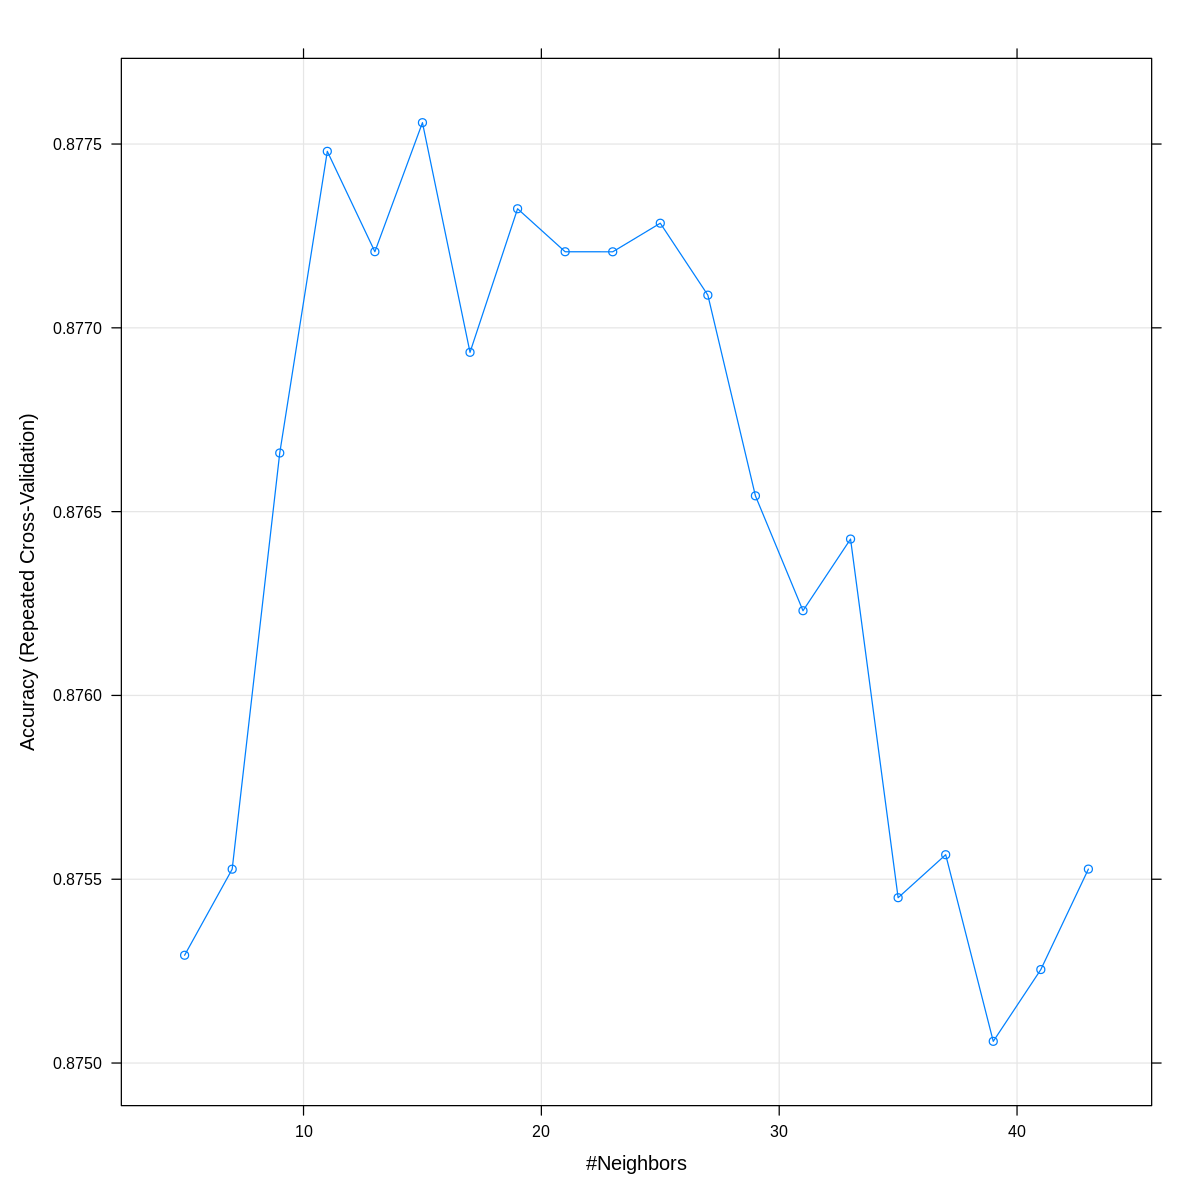

In [99]:
plot(knnFit)

In [151]:
library(class)    
require(class)
model <- knn(train= train,test=test, ,cl= train_rev,k=15)
table(factor(model))
knn_table <- table(test_rev,model)
knn_table


FALSE  TRUE 
 3557   102 

        model
test_rev FALSE TRUE
   FALSE  3060   27
   TRUE    497   75

In [152]:
# calculating accuracy
accuracy <- sum(diag(knn_table)/(sum(rowSums(knn_table)))) * 100
print(paste("KNN accuracy score:", accuracy))

[1] "KNN accuracy score: 85.6791473080077"


The accuracy of the KNN model has an accuracy of 85.78% but after tuning the parameters the accuracy reduces to 85.67%

##**Decision Trees**

In [102]:
#Installing libraries
install.packages('rpart')
install.packages('caret')
install.packages('rpart.plot')
install.packages('rattle')
 
#Loading libraries
library(rpart,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)
#Fitting the model
#data splicing
set.seed(12345)
train <- sample(1:nrow(data_unique),size = ceiling(0.80*nrow(data_unique)),replace = FALSE)
# training set
dt_train <- data_unique[train,]
# test set
dt_test <- data_unique[-train,]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [103]:
#Checking the dimensions of the splitts.
dim(dt_test)
dim(dt_train)

[1] 2439   14

[1] 9760   14

In [104]:
# penalty matrix
penalty.matrix <- matrix(c(0,1,10,0), byrow=TRUE, nrow=2)

In [105]:
# building the classification tree with rpart
tree <- rpart(revenue~.,
data=dt_train,
parms = list(loss = penalty.matrix),
method = "class")

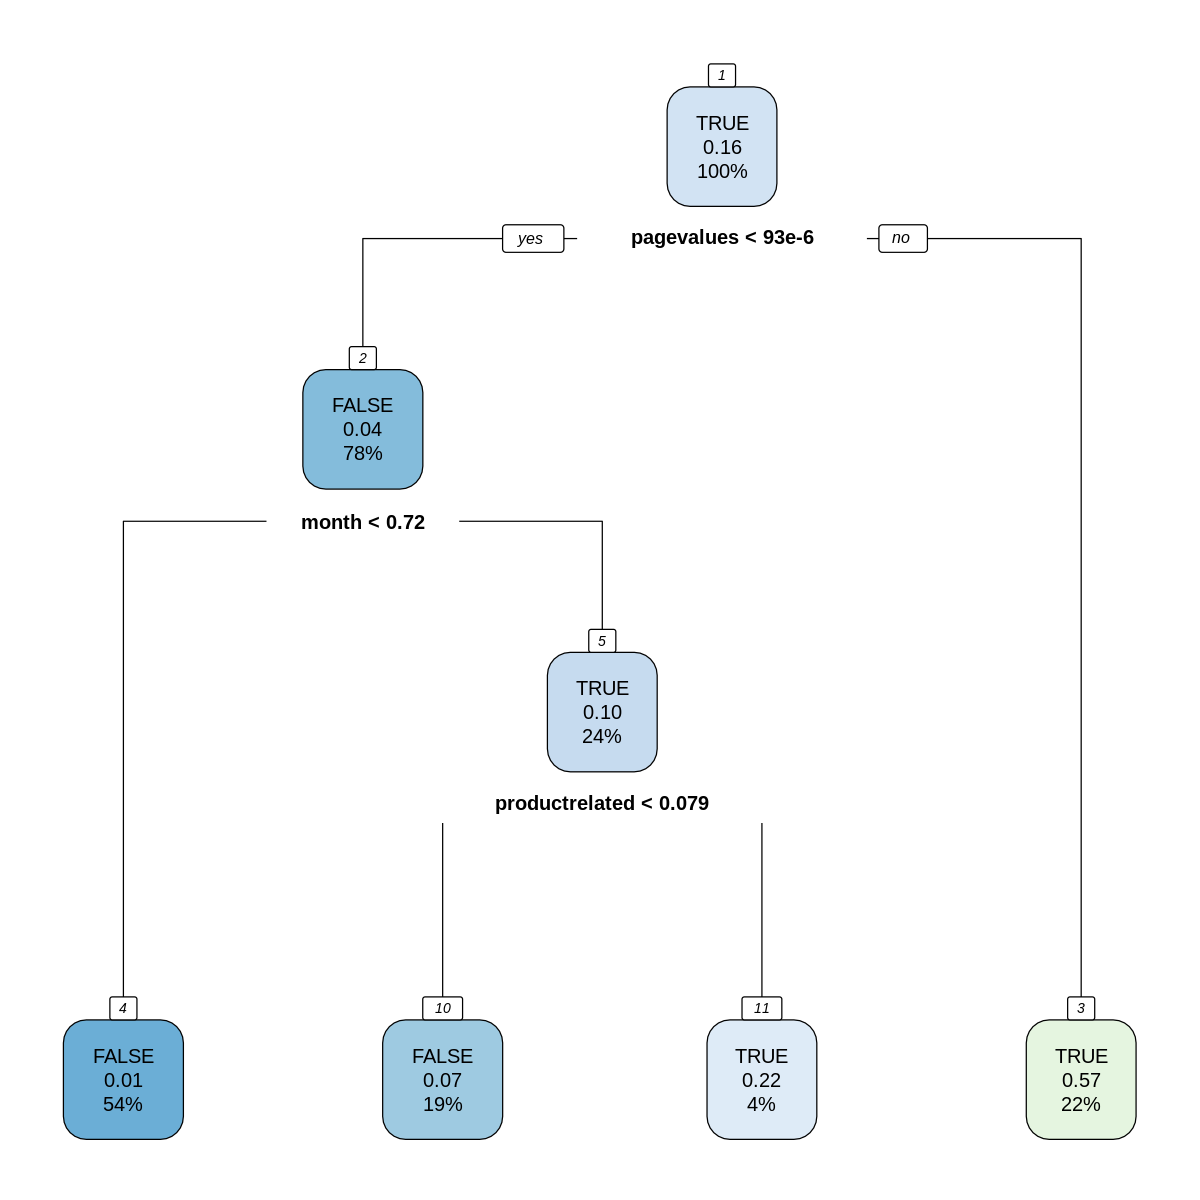

In [106]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE)

In [107]:
#Testing the model
pred <- predict(object=tree,dt_test[,-14],type="class")
pred

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
 TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
 TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
 TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
 TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
  326   327   328   329   330   331   332   333   334 

In [108]:
#Calculating accuracy
t <- table(dt_test$revenue,pred)
confusionMatrix(t)

Confusion Matrix and Statistics

       pred
        FALSE TRUE
  FALSE  1718  334
  TRUE     59  328
                                          
               Accuracy : 0.8389          
                 95% CI : (0.8237, 0.8533)
    No Information Rate : 0.7286          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5315          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9668          
            Specificity : 0.4955          
         Pos Pred Value : 0.8372          
         Neg Pred Value : 0.8475          
             Prevalence : 0.7286          
         Detection Rate : 0.7044          
   Detection Prevalence : 0.8413          
      Balanced Accuracy : 0.7311          
                                          
       'Positive' Class : FALSE           
                                      

From our decision trees we get an accuracy of 83.89%.

##**SVM**

In [109]:
#Checking the structure of the data.
str(data_unique)

Classes ‘data.table’ and 'data.frame':	12199 obs. of  14 variables:
 $ administrative_duration: num  0.009118 0.048004 0.038091 0.048974 0.000294 ...
 $ informational_duration : num  0.006862 0.000392 0.000392 0.000392 0.000392 ...
 $ productrelated         : num  0.14043 0.00851 0.01986 0.06667 0.01986 ...
 $ bouncerates            : num  0.0098 0.0714 0 0.0435 0.2857 ...
 $ pagevalues             : num  0.0202 0 0 0.0163 0 ...
 $ specialday             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ month                  : num  0.667 0.333 0.667 0.111 0.667 ...
 $ operatingsystems       : num  0.143 0.286 0 0.143 0.286 ...
 $ browser                : num  0.0833 0.0833 0.5833 0.0833 0.0833 ...
 $ region                 : num  0 0.25 0.375 0.75 0 0.25 1 0.25 0.25 0.375 ...
 $ traffictype            : num  0 0 0.1579 0.0526 0.6316 ...
 $ visitortype            : num  1 1 1 1 1 0 1 1 1 0 ...
 $ weekend                : num  1 0 1 0 0 0 0 0 0 0 ...
 $ revenue                : Factor w/ 2 levels "FALS

In [110]:
#Fitting SVM to the Training set
install.packages('e1071')
library(e1071)
install.packages('caret')
library('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [111]:
#Splitting the dataset to train and test using 70-30 splitts.
intrain <- createDataPartition(y = data_unique$revenue, p= 0.7, list = FALSE)
training <- data_unique[intrain,]
testing <- data_unique[-intrain,]

In [112]:
#Checking the dimensions of the splitts.
dim(training); 
dim(testing);

[1] 8540   14

[1] 3659   14

In [113]:
#Checking if there is any missing data.
anyNA(data)

[1] TRUE

In [114]:
#Changing the target variable to factor.
training[["revenue"]] = factor(training[["revenue"]])

In [115]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [116]:
#Training the model.
svm_Linear <- train(revenue ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [117]:
svm_Linear

Support Vector Machines with Linear Kernel 

8540 samples
  13 predictor
   2 classes: 'FALSE', 'TRUE' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7686, 7686, 7686, 7686, 7687, 7685, ... 
Resampling results:

  Accuracy   Kappa    
  0.8835285  0.4576628

Tuning parameter 'C' was held constant at a value of 1

In [118]:
#Making predictions
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
  [37] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [157] FALSE FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [361] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [385] TRUE  FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE TRUE  FALSE
 [481] FALSE FALSE TRUE  FALSE FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  FALSE FALSE
 [589] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [119]:
#Computing the confusion matrix
confusionMatrix(table(test_pred, testing$revenue))

Confusion Matrix and Statistics

         
test_pred FALSE TRUE
    FALSE  3006  325
    TRUE     81  247
                                         
               Accuracy : 0.889          
                 95% CI : (0.8784, 0.899)
    No Information Rate : 0.8437         
    P-Value [Acc > NIR] : 1.766e-15      
                                         
                  Kappa : 0.4909         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9738         
            Specificity : 0.4318         
         Pos Pred Value : 0.9024         
         Neg Pred Value : 0.7530         
             Prevalence : 0.8437         
         Detection Rate : 0.8215         
   Detection Prevalence : 0.9104         
      Balanced Accuracy : 0.7028         
                                         
       'Positive' Class : FALSE          
                                         

Warning message:
“model fit failed for Fold01.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold02.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold03.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold04.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold05.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold06.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold07.Rep1: C=0.00 Error in .l

Support Vector Machines with Linear Kernel 

9150 samples
  13 predictor
   2 classes: 'FALSE', 'TRUE' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 8234, 8236, 8235, 8235, 8235, 8235, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.00        NaN        NaN
  0.01  0.8849543  0.4573426
  0.05  0.8859745  0.4693195
  0.10  0.8856830  0.4689405
  0.25  0.8856831  0.4695268
  0.50  0.8856830  0.4696413
  0.75  0.8856830  0.4696413
  1.00  0.8857195  0.4698640
  1.25  0.8856830  0.4696413
  1.50  0.8856830  0.4696413
  1.75  0.8856830  0.4696413
  2.00  0.8857195  0.4698640
  5.00  0.8856830  0.4696413

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.05.

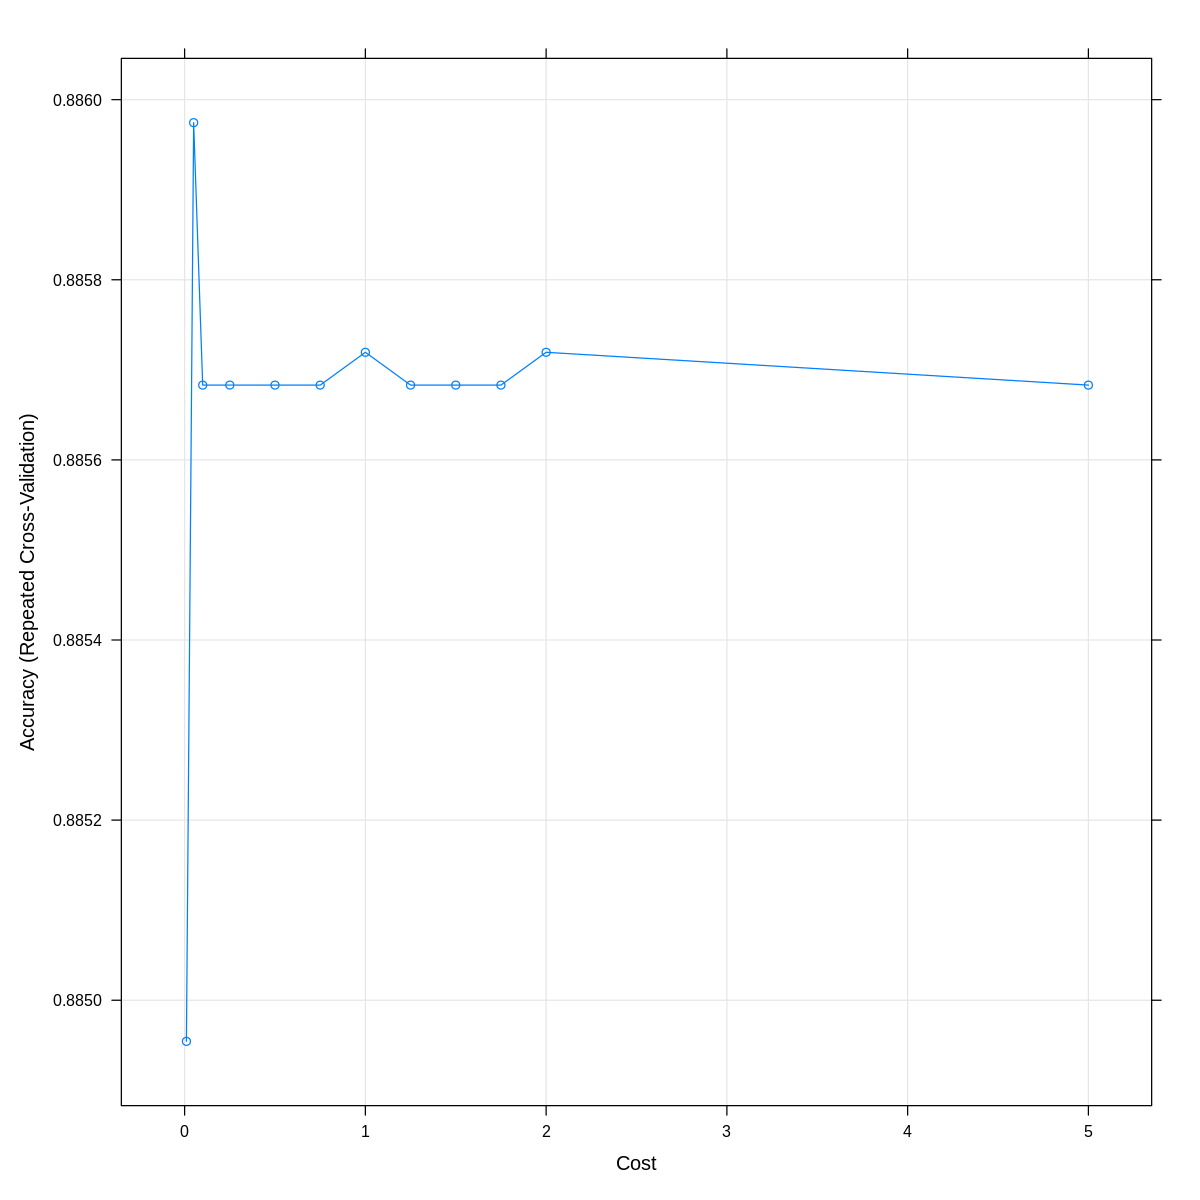

In [153]:
#Hyperparameter tuning.
grid <- expand.grid(C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,5))
svm_Linear_Grid <- train(revenue ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneGrid = grid,
tuneLength = 10)
svm_Linear_Grid
plot(svm_Linear_Grid)

In [121]:
#Using the best parameters to predict
test_pred_grid <- predict(svm_Linear_Grid, newdata = testing)
test_pred_grid

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
  [37] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [157] FALSE FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [361] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [385] TRUE  FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE TRUE  FALSE
 [481] FALSE FALSE TRUE  FALSE FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  FALSE FALSE
 [589] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [122]:
#Confusion matrix
confusionMatrix(table(test_pred_grid, testing$revenue))

Confusion Matrix and Statistics

              
test_pred_grid FALSE TRUE
         FALSE  3006  325
         TRUE     81  247
                                         
               Accuracy : 0.889          
                 95% CI : (0.8784, 0.899)
    No Information Rate : 0.8437         
    P-Value [Acc > NIR] : 1.766e-15      
                                         
                  Kappa : 0.4909         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9738         
            Specificity : 0.4318         
         Pos Pred Value : 0.9024         
         Neg Pred Value : 0.7530         
             Prevalence : 0.8437         
         Detection Rate : 0.8215         
   Detection Prevalence : 0.9104         
      Balanced Accuracy : 0.7028         
                                         
       'Positive' Class : FALSE          
                                  

The SVM accuracy is 88.9% before and after tuning the parameters.

##**Naive bayes**

In [123]:
#Loading required packages
install.packages('tidyverse')
library(tidyverse)
install.packages('ggplot2')
library(ggplot2)
install.packages('caret')
library(caret)
install.packages('caretEnsemble')
library(caretEnsemble)
install.packages('psych')
library(psych)
install.packages('Amelia')
library(Amelia)
install.packages('mice')
library(mice)
install.packages('GGally')
library(GGally)
install.packages('rpart')
library(rpart)
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tidyr   1.1.3     ✔ dplyr   1.0.5
✔ readr   1.4.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()     masks psych::%+%()
✖ ggplot2::alpha()   masks psych::alpha()
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::lift()      masks caret::lift()
✖ purrr::transpose() masks data.table::transpose()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecifie

In [155]:
#Building a model
#split data into training and test data sets
indxTrain <- createDataPartition(y = data_unique$revenue,p = 0.75,list = FALSE)
training <- data_unique[indxTrain,]
testing <- data_unique[-indxTrain,]

In [156]:
#Check dimensions of the split 
prop.table(table(data_unique$revenue)) * 100
prop.table(table(training$revenue)) * 100
prop.table(table(testing$revenue)) * 100


   FALSE     TRUE 
84.35937 15.64063 


   FALSE     TRUE 
84.36066 15.63934 


   FALSE     TRUE 
84.35553 15.64447 

In [157]:
#create objects x which holds the predictor variables and y which holds the response variables
x = training[,-14]
y = training$revenue

In [158]:
library(e1071)

In [159]:
install.packages("klaR")
library(klaR)
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))
 
model

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 181”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 280”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 320”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 358”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 458”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 613”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 687”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 690”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 736”
Warning message i

Naive Bayes 

9150 samples
  13 predictor
   2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 8235, 8235, 8235, 8235, 8235, 8235, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.8522383  0.4582599
   TRUE      0.8797812  0.4810782

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

In [160]:
#Model Evaluation
#Predict testing set
Predict <- predict(model,newdata = testing ) 
#Get the confusion matrix to see accuracy value and other parameter values 
confusionMatrix(Predict, testing$revenue)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2457  280
     TRUE    115  197
                                         
               Accuracy : 0.8704         
                 95% CI : (0.858, 0.8822)
    No Information Rate : 0.8436         
    P-Value [Acc > NIR] : 1.596e-05      
                                         
                  Kappa : 0.4287         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9553         
            Specificity : 0.4130         
         Pos Pred Value : 0.8977         
         Neg Pred Value : 0.6314         
             Prevalence : 0.8436         
         Detection Rate : 0.8058         
   Detection Prevalence : 0.8977         
      Balanced Accuracy : 0.6841         
                                         
       'Positive' Class : FALSE          
                                         

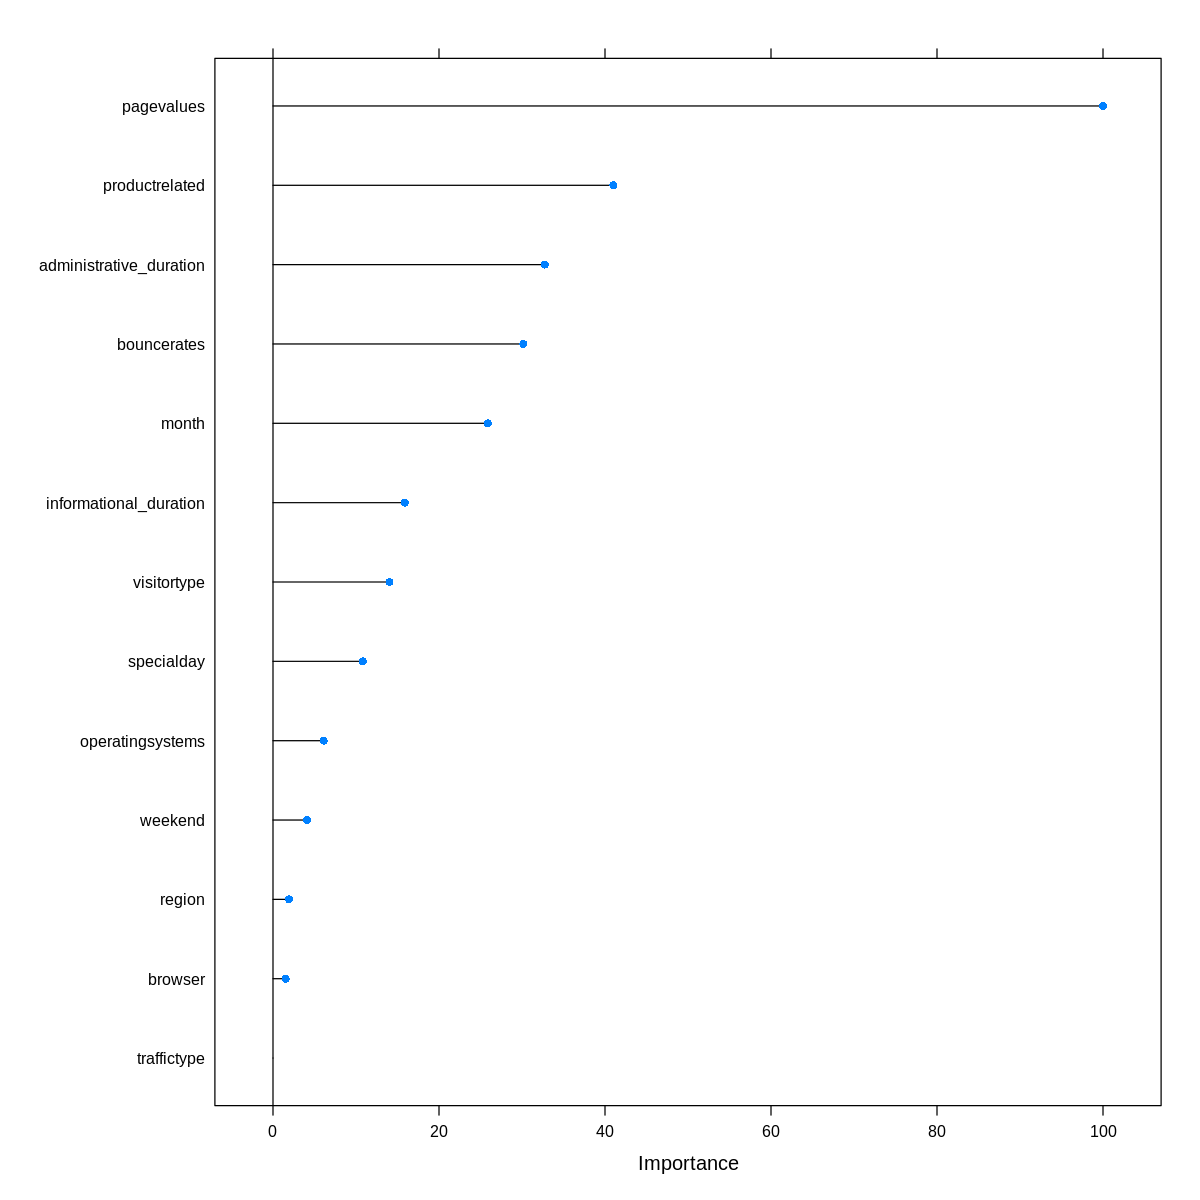

In [161]:
#Plot Variable performance
X <- varImp(model)
plot(X)

The accuracy of the Naive bayes model is 87.04%
The most important variables that help in predicting whether revenue is true or false are pagevalues being the first followed by product related and administrative duration follow respectively.


#**Unsupervised Models.**

##**K-Means - Clustering**

In [174]:
#Splitting the data
data_new <- data_unique[, c(1:13)]
data_class <- data_unique$revenue
head(data_new)

administrative_duration informational_duration productrelated bouncerates
1 0.0091183175            0.0068617360           0.140425532    0.00980392 
2 0.0480035297            0.0003920992           0.008510638    0.07142857 
3 0.0380910361            0.0003920992           0.019858156    0.00000000 
4 0.0489741893            0.0003920992           0.066666667    0.04347826 
5 0.0002941393            0.0003920992           0.019858156    0.28571428 
6 0.4688334928            0.0578999820           0.019858156    0.00000000 
  pagevalues specialday month     operatingsystems browser    region
1 0.02018073 0          0.6666667 0.1428571        0.08333333 0.000 
2 0.00000000 0          0.3333333 0.2857143        0.08333333 0.250 
3 0.00000000 0          0.6666667 0.0000000        0.58333333 0.375 
4 0.01633468 0          0.1111111 0.1428571        0.08333333 0.750 
5 0.00000000 0          0.6666667 0.2857143        0.08333333 0.000 
6 0.00000000 0          0.7777778 0.4285714        0.00000000 0.250 
  traffictype visitortype weekend
1 0.00000000  1           1      
2 0.00000000  1           0      
3 0.15789474  1           1      
4 0.05263158  1           0      
5 0.63157895  1           0      
6 0.36842105  0           0

In [163]:
#Previewing the data
head(data_class)

[1] FALSE FALSE FALSE FALSE FALSE TRUE 
Levels: FALSE TRUE

In [164]:
#installing packages that will enable us to compute the number of clusters
#loading the packages
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)
library(factoextra)
library(NbClust)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



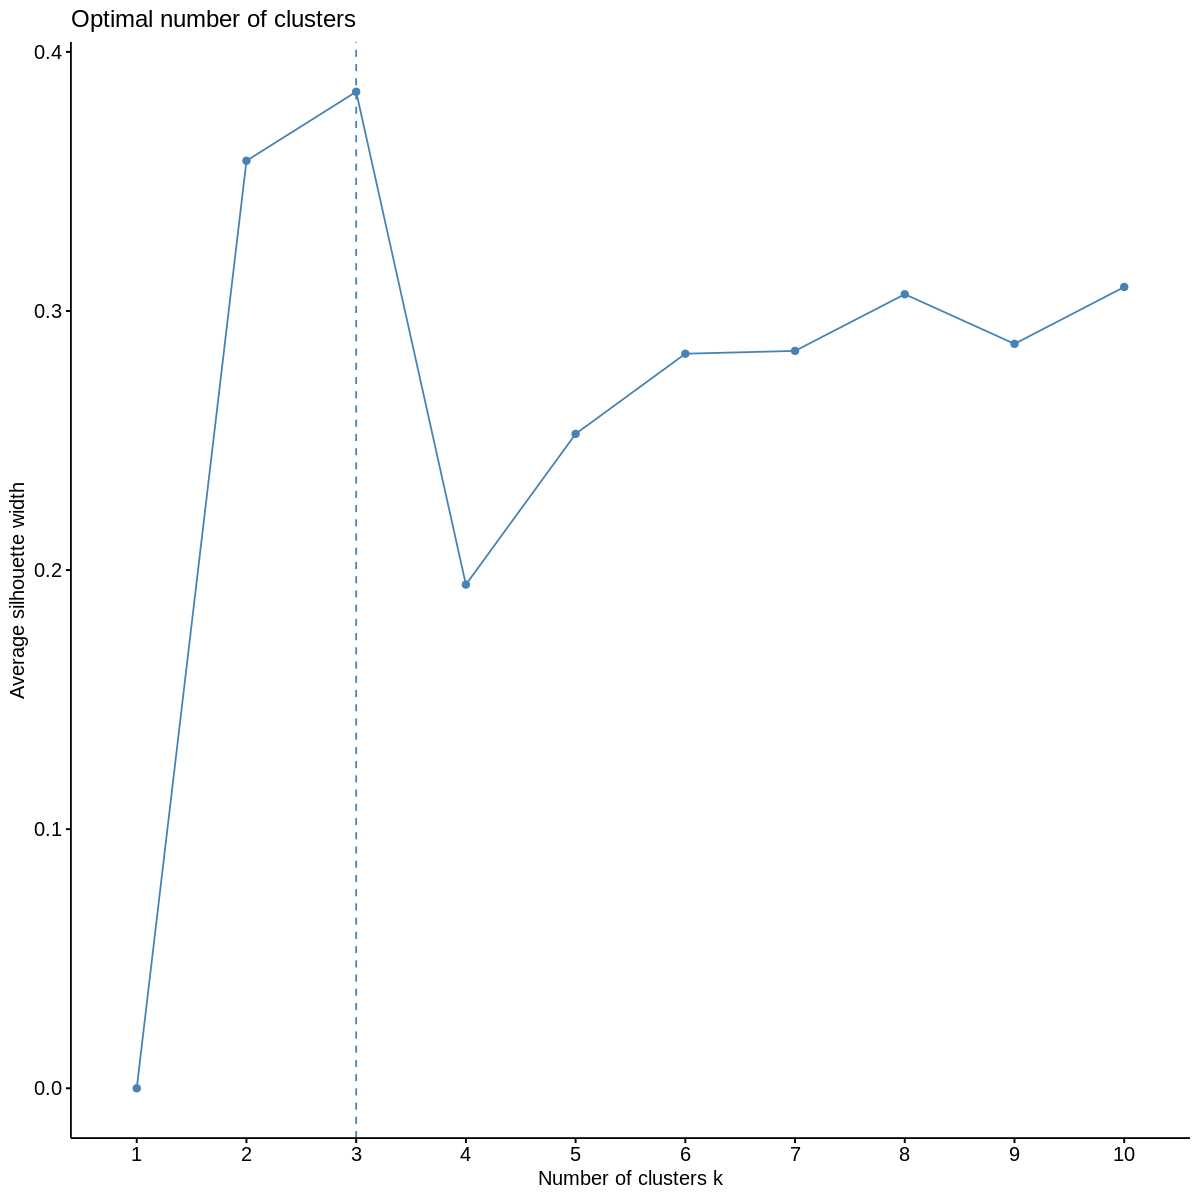

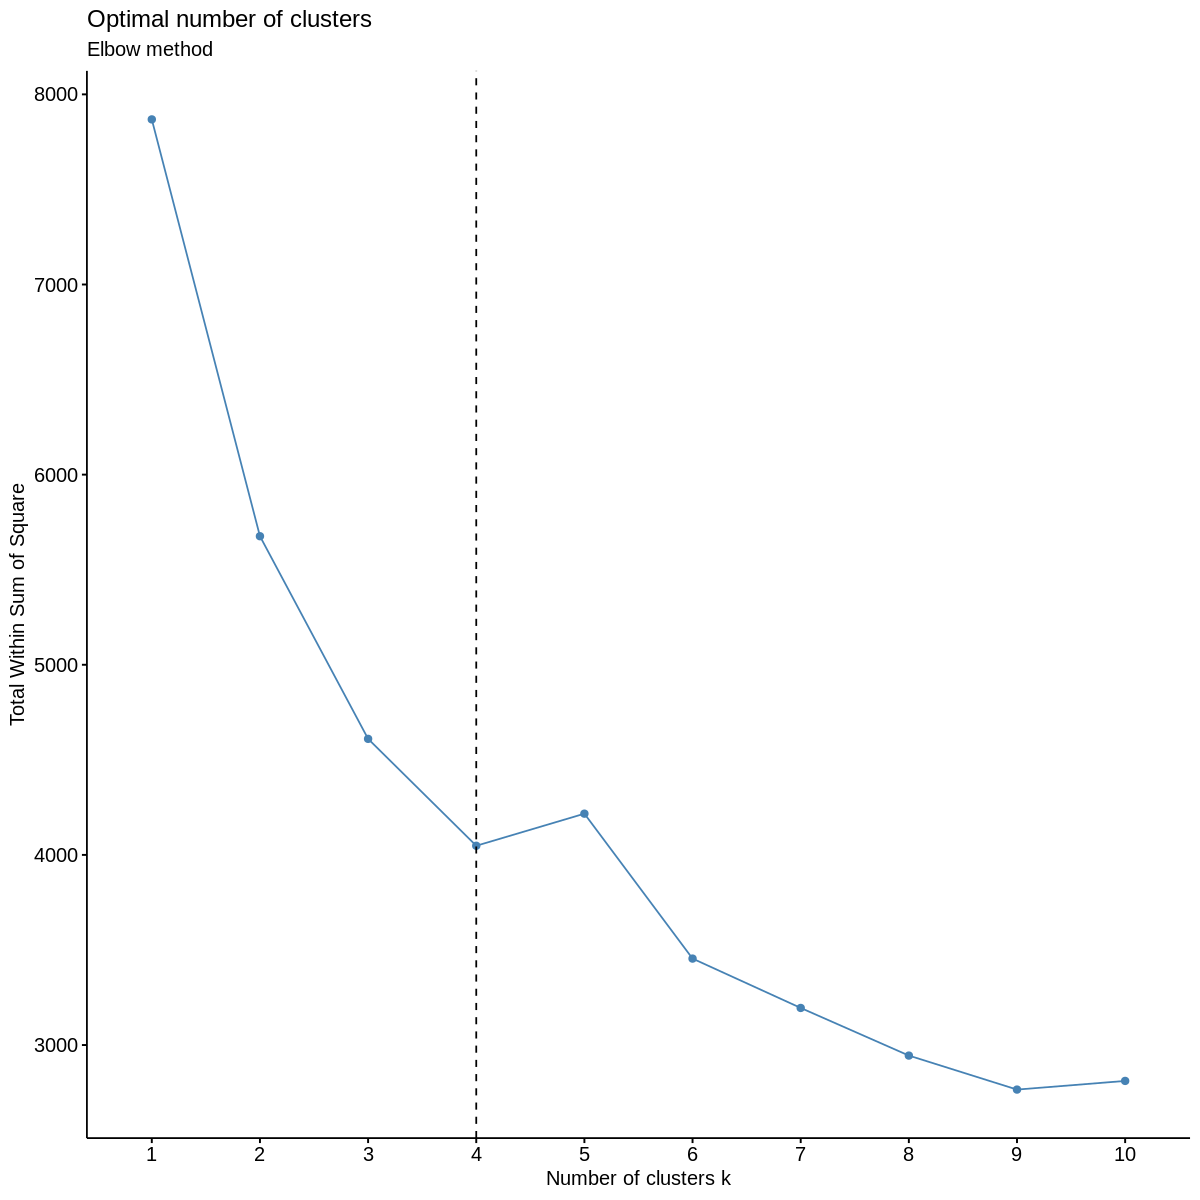

Streaming output truncated to the last 5000 lines.
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterati

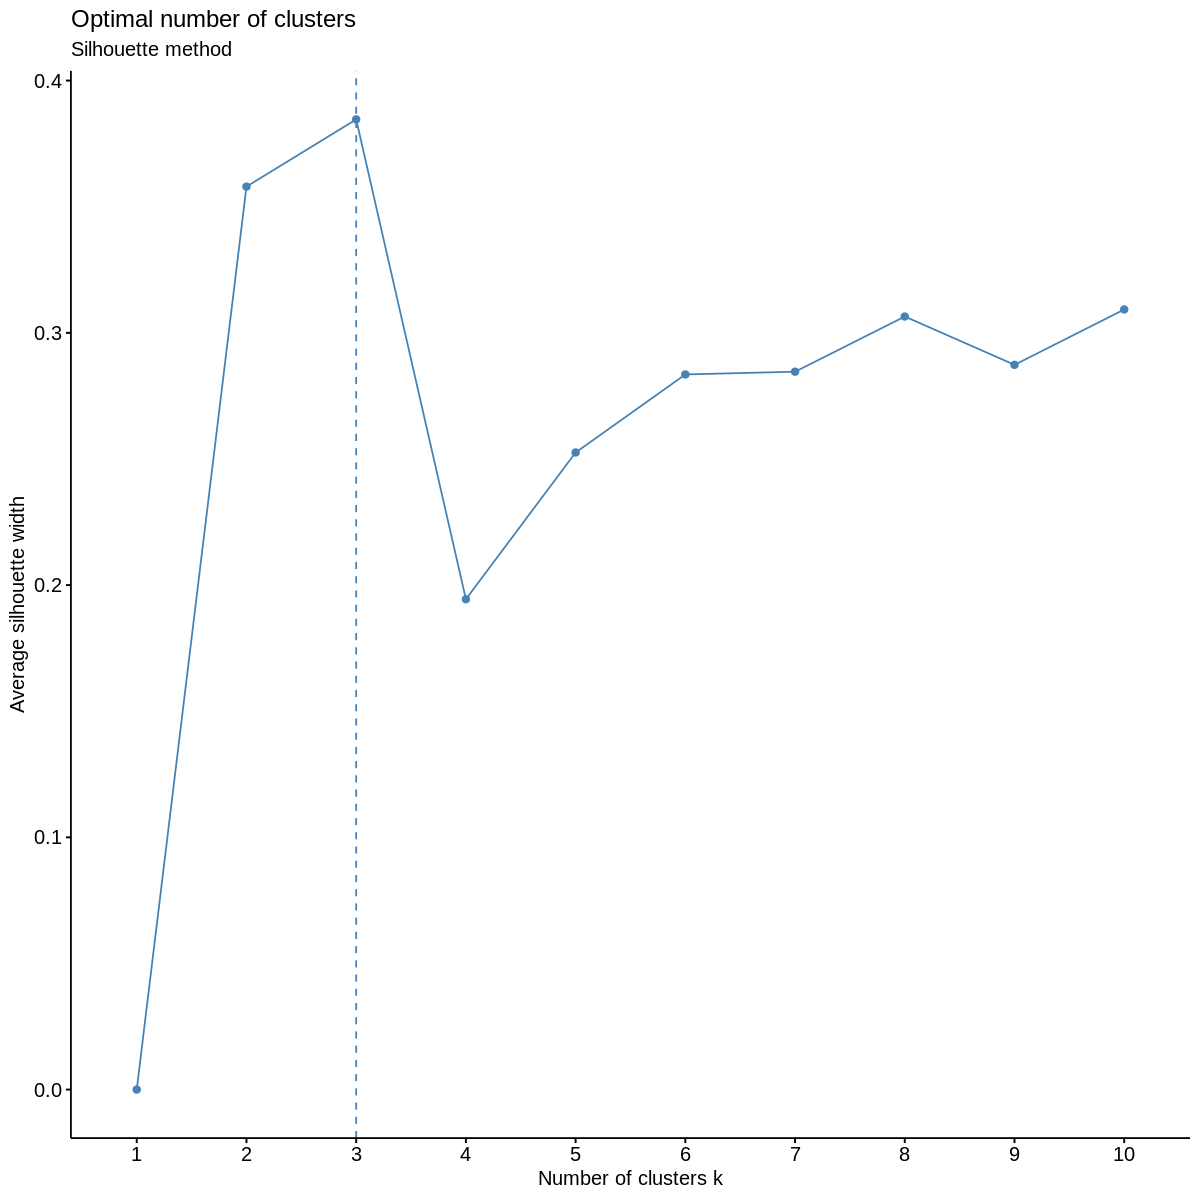

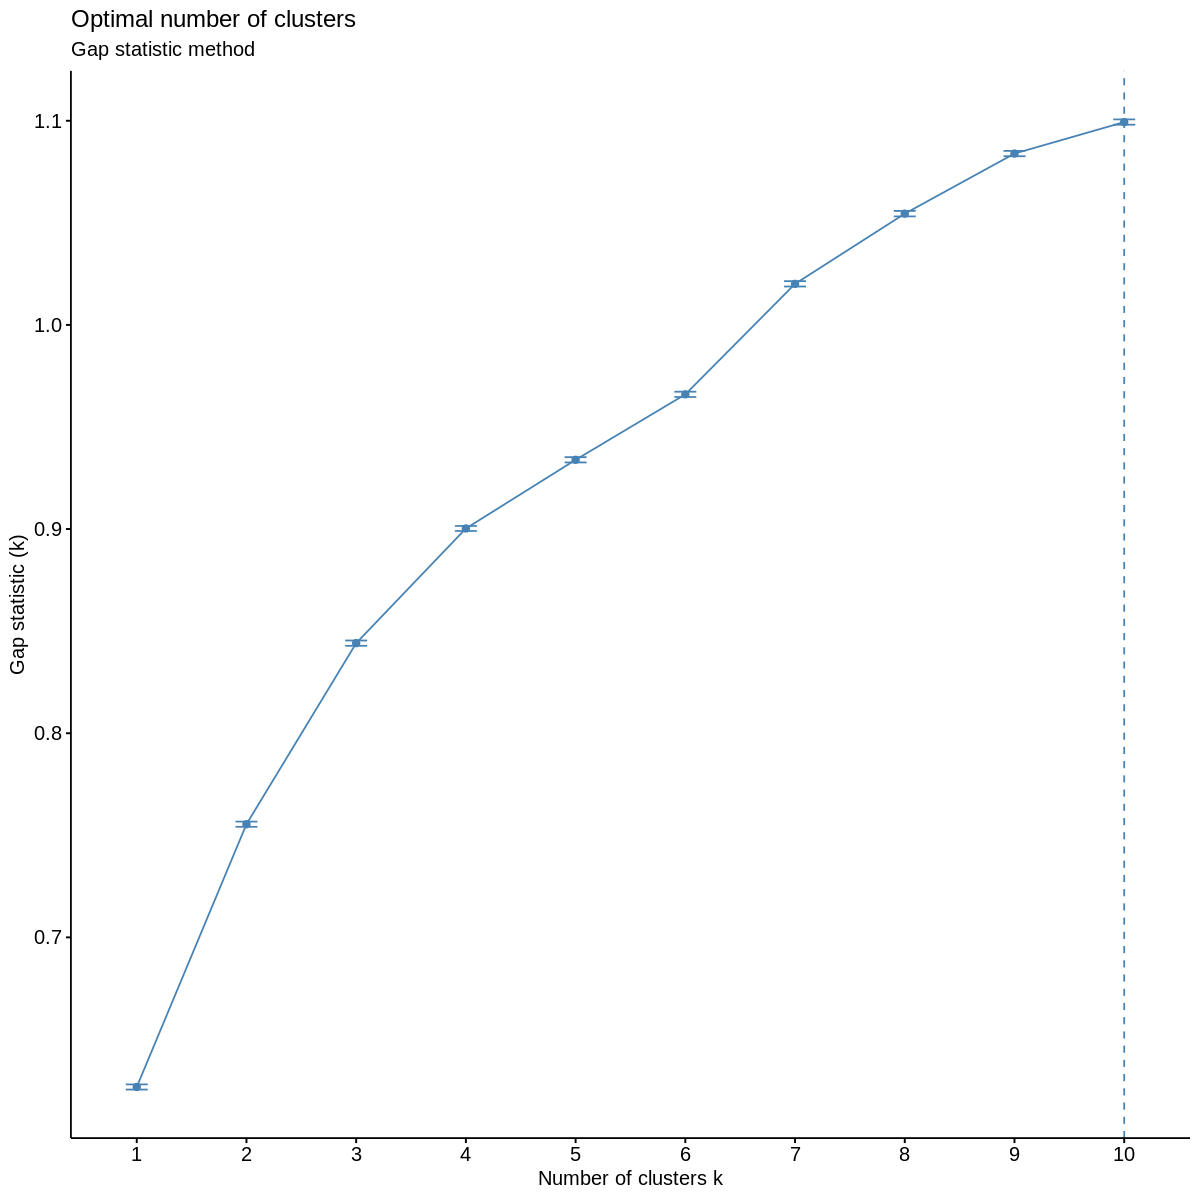

In [165]:
fviz_nbclust(data_new, FUNcluster = kmeans, method = c("silhouette", "wss", "gap_stat"))
# Elbow method
fviz_nbclust(data_new, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")

# Silhouette method
fviz_nbclust(data_new, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")

# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(data_new, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method")

In [179]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3
# ---
# 
result<- kmeans(data_new,3) 

# Previewing the no. of records in each cluster
# 
result$size 

[1] 2763 2856 6580

In [180]:
# Getting the value of cluster center datapoint value(6 centers for k=6)
# ---
# 
result$centers

administrative_duration informational_duration productrelated bouncerates
1 0.02483914              0.009615304            0.03580444     0.06388144 
2 0.02558730              0.016384511            0.04704343     0.08728349 
3 0.02355207              0.014902211            0.04885124     0.12482713 
  pagevalues specialday month     operatingsystems browser   region   
1 0.02222873 0.03250090 0.5499658 0.1652965        0.1328266 0.5669110
2 0.01747125 0.05560224 0.5885854 0.1610644        0.1029704 0.2682511
3 0.01358781 0.07711246 0.5781662 0.1584672        0.1093592 0.1445289
  traffictype visitortype weekend
1 0.1676286   0.5488599   0      
2 0.1608801   0.8310574   1      
3 0.1597904   0.9993161   0

In [181]:
# Getting the cluster vector that shows the cluster where each record falls
# ---
# 
result$cluster

[1] 2 3 2 1 3 1 1 3 3 1 1 2 3 3 3 1 3 3 3 2 3 3 3 1 3 2 2 2 2 3 2 3 3 3 1 3
   [37] 2 1 3 3 1 3 2 3 3 2 2 2 3 2 2 3 3 3 3 2 3 2 1 1 3 2 3 3 3 3 3 2 3 3 3 1
   [73] 3 3 3 3 2 1 3 2 2 2 2 3 3 3 3 1 1 3 3 1 2 3 2 3 2 2 3 2 2 2 3 3 3 2 3 1
  [109] 3 2 3 3 3 2 3 3 2 3 1 2 1 3 3 3 2 1 2 2 1 1 2 1 2 3 1 2 3 3 2 3 2 2 3 2
  [145] 3 3 3 3 2 3 3 2 3 2 3 2 3 2 1 3 3 3 1 2 2 3 1 3 2 1 2 3 3 2 2 1 3 2 3 1
  [181] 1 1 2 3 3 2 3 3 3 3 3 1 1 1 3 3 3 1 3 3 2 1 1 3 3 2 2 3 3 2 3 1 3 1 3 2
  [217] 3 3 2 3 2 3 3 1 2 3 1 3 2 3 3 3 2 1 2 1 3 3 3 2 1 3 1 2 3 2 3 2 3 2 3 2
  [253] 3 3 2 2 3 2 1 3 3 3 2 1 3 3 3 3 3 3 3 3 3 2 1 3 3 3 2 1 3 3 3 2 3 2 1 3
  [289] 2 1 3 3 3 1 2 1 1 1 2 3 3 3 3 3 3 1 3 1 2 3 3 3 1 1 1 1 2 3 3 1 3 2 3 1
  [325] 3 3 3 3 3 3 1 1 2 3 2 3 3 3 3 3 1 3 2 2 3 3 2 3 2 1 1 3 1 2 3 2 3 3 3 3
  [361] 3 3 3 2 3 1 1 3 3 2 3 3 2 2 3 2 3 1 1 1 2 3 2 3 3 2 3 3 3 2 3 3 1 3 2 3
  [397] 2 3 1 3 3 2 1 2 2 2 1 3 3 3 3 1 1 3 1 3 2 1 3 3 1 1 2 2 2 3 1 3 3 3 3 1
  [433] 3 3 1 3 2 3 2 1 1 1 1 2 3 3 3 3 3 2 2 3 2 3 2 2 3 1 2 2 2 2 2 3 1 3 3 1
  [469] 3 3 2 1 3 1 3 3 3 2 1 3 2 3 1 3 3 1 1 3 2 1 1 1 2 1 2 1 1 1 3 1 2 3 3 3
  [505] 3 1 1 3 2 3 2 2 3 3 2 3 2 3 1 3 3 1 3 3 3 3 3 2 3 3 1 3 3 3 3 3 3 3 3 3
  [541] 3 2 2 3 2 3 1 3 3 3 3 3 2 1 3 1 3 3 3 3 2 1 2 3 3 3 1 2 1 3 3 3 3 1 1 2
  [577] 2 1 3 3 2 3 1 1 3 1 2 3 2 3 3 1 3 2 3 3 2 3 3 2 1 1 1 2 3 3 2 3 2 2 3 1
  [613] 1 1 2 3 3 3 3 3 3 3 1 3 2 2 3 3 1 3 1 1 3 3 3 3 3 2 3 3 3 2 3 1 3 2 3 1
  [649] 3 3 3 3 2 3 3 3 1 1 1 2 3 3 1 2 1 2 2 1 2 3 2 3 3 1 3 1 1 3 3 3 3 1 1 3
  [685] 2 2 2 2 1 3 2 3 3 3 3 3 2 3 3 1 1 3 1 3 2 1 1 3 2 2 3 3 3 3 3 1 1 3 3 3
  [721] 1 2 1 2 1 3 2 3 3 3 3 1 2 3 3 2 3 1 3 3 3 1 2 3 2 2 3 3 2 1 3 3 1 3 3 2
  [757] 3 3 1 2 2 1 3 2 3 3 1 3 2 1 2 3 1 2 2 2 3 2 3 3 3 3 1 2 3 3 2 3 3 3 1 3
  [793] 3 2 2 2 3 3 1 3 1 3 3 3 2 2 3 3 1 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
  [829] 3 1 3 3 1 1 2 2 1 3 3 2 2 2 3 1 2 3 2 2 1 3 3 2 3 1 3 3 3 3 3 2 1 2 2 3
  [865] 3 2 2 3 3 2 2 2 1 3 3 2 3 1 3 2 3 2 3 2 2 1 1 3 3 3 3 3 2 3 1 3 3 2 3 2
  [901] 2 3 3 3 2 3 3 3 3 3 2 2 3 1 3 3 2 3 3 1 3 3 3 3 2 3 2 3 3 3 3 3 1 3 2 3
  [937] 2 2 3 2 1 1 3 1 3 3 2 3 3 3 3 2 2 3 1 2 2 2 3 3 2 3 1 2 3 1 1 2 3 1 3 3
  [973] 1 3 3 1 2 2 3 3 3 3 2 2 3 3 3 3 1 1 3 3 3 1 3 3 3 2 3 3 1 2 3 1 2 3 2 1
 [1009] 3 3 2 3 3 3 3 1 3 1 3 3 2 3 3 3 1 1 3 1 1 2 2 1 3 3 3 3 2 3 2 3 2 1 3 3
 [1045] 2 1 1 3 3 1 3 1 3 3 3 1 1 2 3 3 3 2 1 1 2 3 3 3 1 2 3 1 3 1 2 3 3 2 3 3
 [1081] 3 1 3 3 3 3 3 2 1 2 3 1 3 3 1 2 3 2 2 1 3 3 3 2 3 2 2 3 1 2 2 3 2 3 1 3
 [1117] 3 2 1 3 3 3 3 3 3 3 1 3 2 2 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 3 3 1 3 3 3 3
 [1153] 2 1 2 3 3 1 2 3 1 3 2 3 3 1 2 1 1 1 2 3 2 1 3 1 1 1 3 3 1 1 1 3 3 1 1 3
 [1189] 3 1 3 2 3 3 3 3 2 2 3 3 1 1 3 3 1 1 3 3 3 3 2 3 3 1 3 1 3 3 2 1 3 2 1 2
 [1225] 1 3 1 3 2 3 2 3 3 3 3 3 2 3 3 1 2 3 3 3 1 2 3 1 1 1 1 1 1 1 3 3 1 1 3 3
 [1261] 3 1 3 3 2 1 3 3 1 2 3 1 1 3 2 3 1 2 3 3 3 3 3 3 3 3 3 2 3 2 3 2 1 3 3 2
 [1297] 2 3 3 1 1 3 3 3 3 2 3 3 1 3 1 3 2 3 3 2 2 3 3 2 1 3 2 2 3 1 1 1 1 3 3 3
 [1333] 1 3 2 3 2 3 3 1 2 2 3 3 2 2 1 3 1 3 3 3 1 3 1 3 3 2 1 3 2 3 3 1 2 2 1 3
 [1369] 3 2 2 3 3 3 3 1 2 3 3 3 3 2 3 2 3 2 1 3 2 3 3 2 3 3 1 3 3 3 3 2 3 2 2 3
 [1405] 3 3 3 3 3 3 3 2 2 3 1 2 3 3 3 1 2 2 3 1 3 3 1 1 2 3 3 3 1 3 3 3 1 2 1 3
 [1441] 3 3 2 3 3 1 3 2 1 3 1 3 3 1 3 3 3 1 3 3 1 3 2 3 3 1 3 3 1 1 3 1 3 1 1 1
 [1477] 1 3 3 2 3 1 3 1 3 2 3 3 2 3 1 3 3 2 3 3 3 3 3 2 1 3 3 3 2 2 3 2 1 3 2 3
 [1513] 3 3 1 3 3 2 3 3 3 3 3 3 1 3 3 3 2 1 1 3 3 2 2 3 1 3 2 3 3 1 3 3 2 2 1 2
 [1549] 3 1 3 3 3 2 2 2 3 3 3 2 1 3 3 2 3 2 2 3 2 3 1 2 3 2 3 1 3 2 3 2 3 3 3 3
 [1585] 2 2 3 3 3 1 3 1 3 3 1 3 3 1 1 2 3 2 2 2 3 3 1 2 2 2 2 1 3 3 3 3 3 3 3 1
 [1621] 1 1 3 2 1 2 1 3 1 3 2 3 3 1 3 3 1 3 3 2 3 1 2 1 1 3 2 2 2 3 2 3 1 3 3 3
 [1657] 3 1 3 3 3 1 3 3 2 3 3 3 2 2 3 3 3 1 2 3 3 3 1 3 3 1 2 3 1 3 3 1 3 1 2 3
 [1693] 1 3 1 1 3 3 3 1 2 3 1 2 1 2 2 3 3 1 3 3 1 3 3 2 2 3 2 3 3 3 3 1 1 3 2 3
 [1729] 2 2 3 2 2 3 3 2 3 1 3 1 3 3 2 2 1 2 2 3 3 1 3 3 3 3 1 1 3 3 3 3 3 1 1 2
 [1765] 3 2 3 2 3 3 3 3 2 3 2 3 3 1 1 2 1 1 3 3 2 2 3 2 3 3 3 3 1 3 3 2 3 3 1 3
 [18

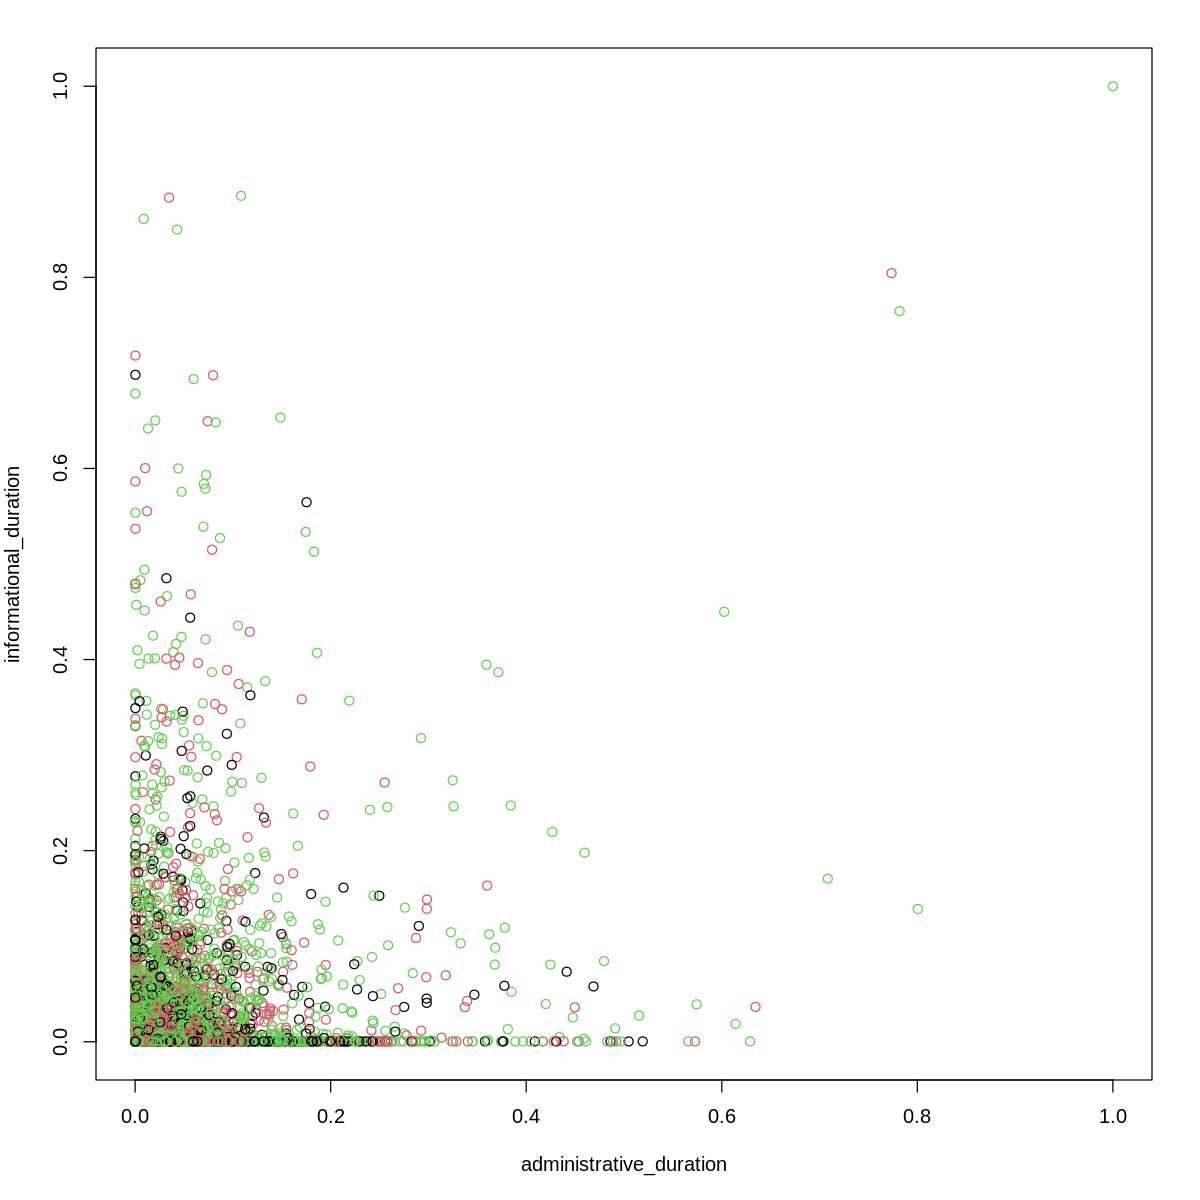

In [182]:
# Verifying the results of clustering
# ---
# 
par(mfrow = c(1,1), mar = c(5,4,2,2))

# Plotting to see how different variable data points have been distributed in clusters
plot(data_new[,1:2], col = result$cluster)

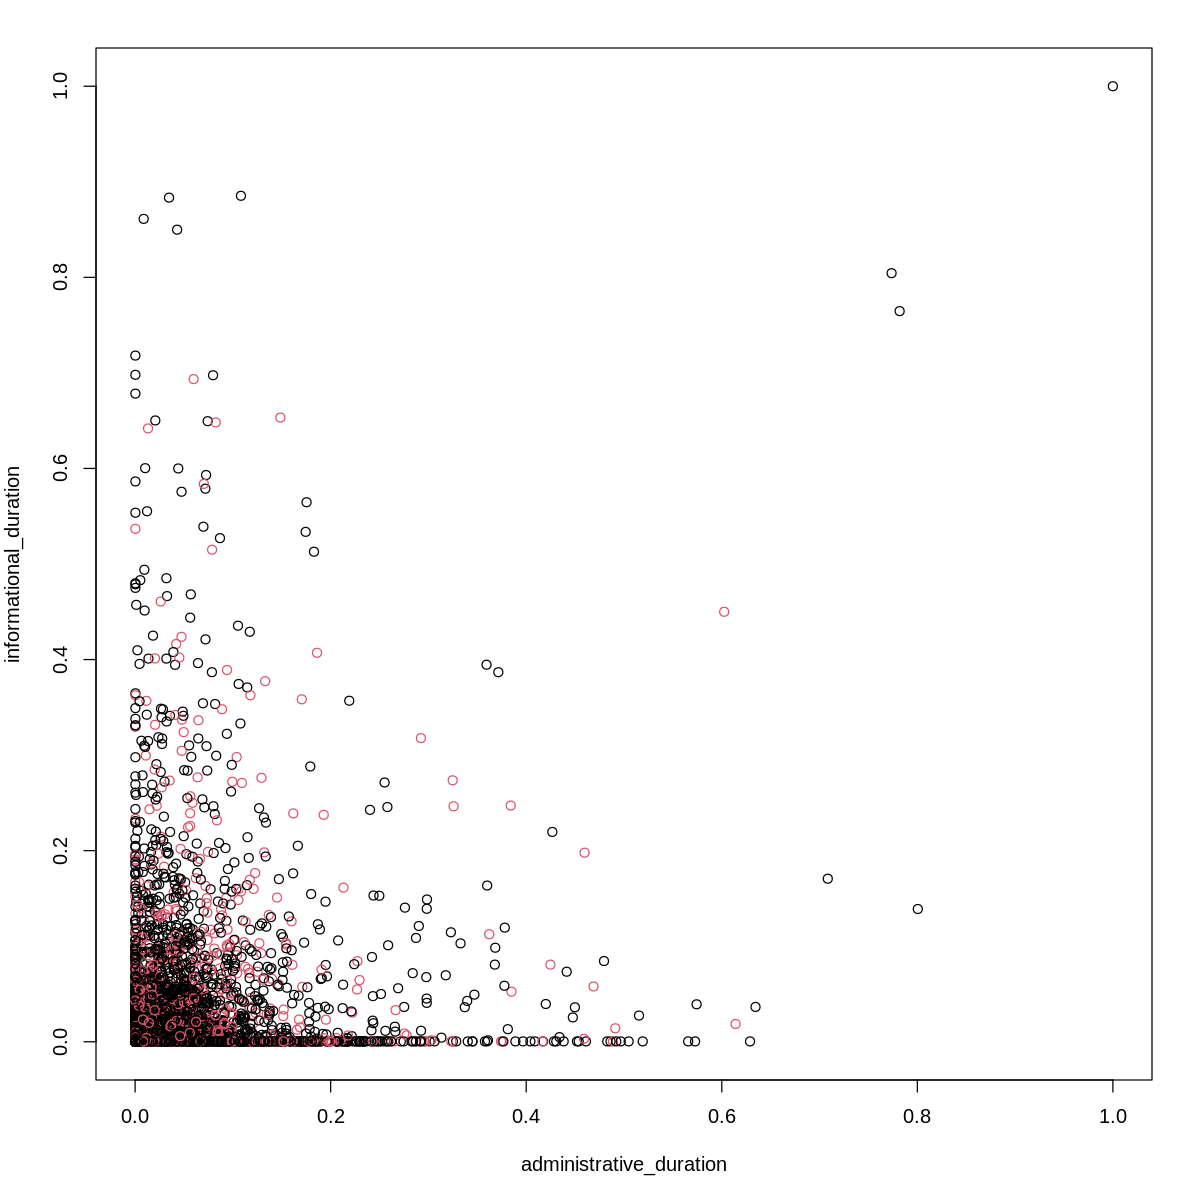

In [183]:
# Plotting to see how different variable data points have been distributed 
# originally as per "class" attribute in dataset
# ---
#
# visualizing the clusters
#set_plot_dimensions(6, 6)
par(mfrow = c(1,1), mar = c(5,4,2,2))
# plotting Administrative vs Informational
plot(data_new[,1:2], col = data_class)

In [184]:
# showing how the clusters respond to the classes
table(result$cluster, data_class)

   data_class
    FALSE TRUE
  1  2249  514
  2  2357  499
  3  5685  895

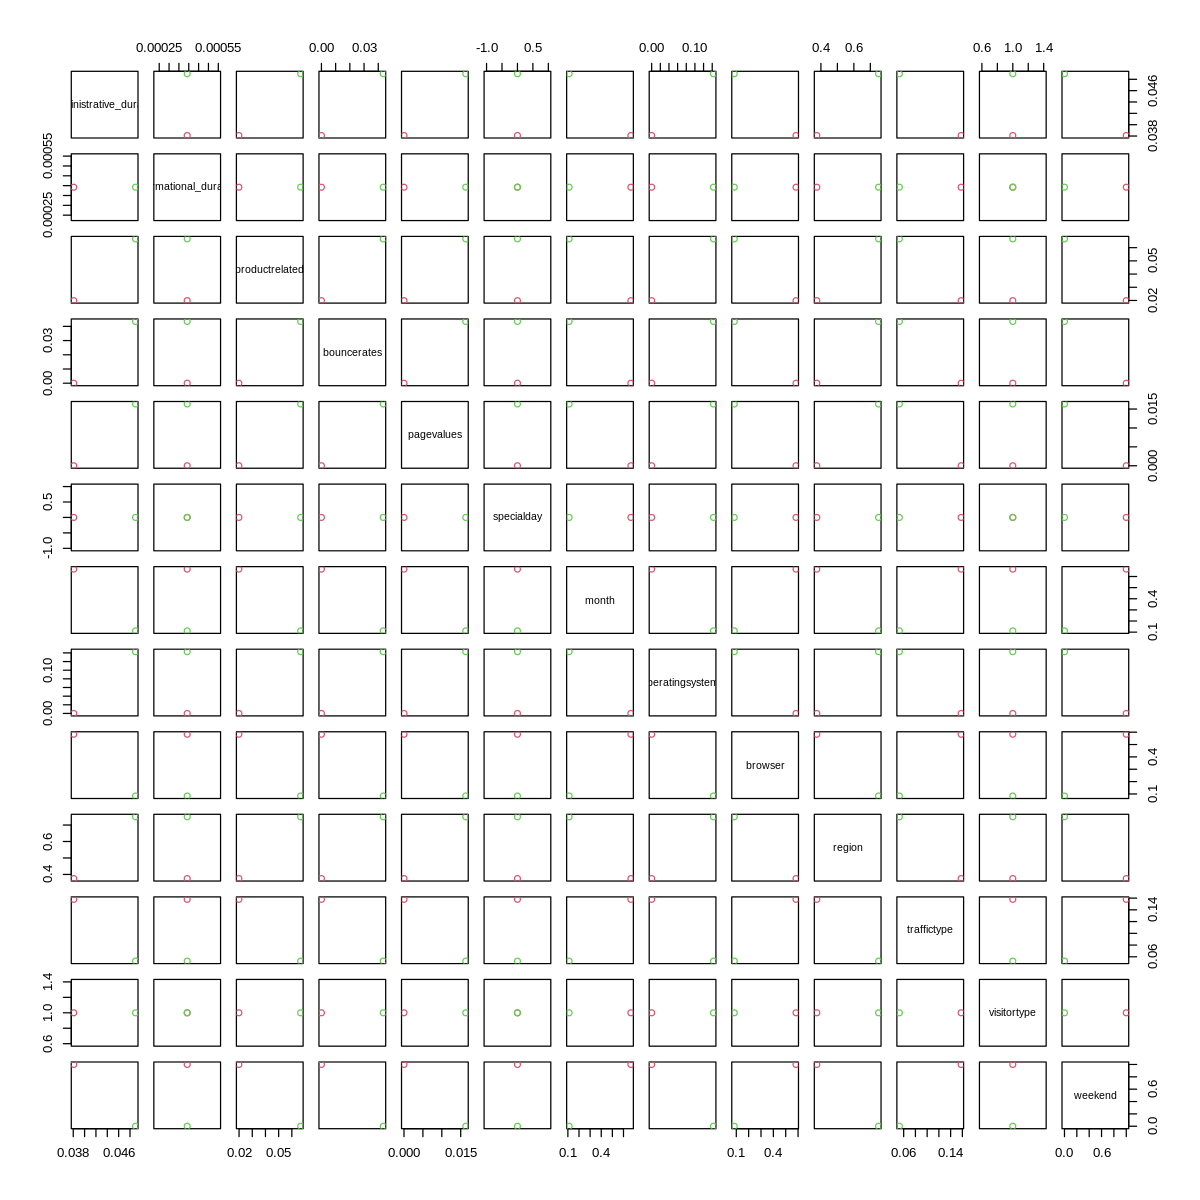

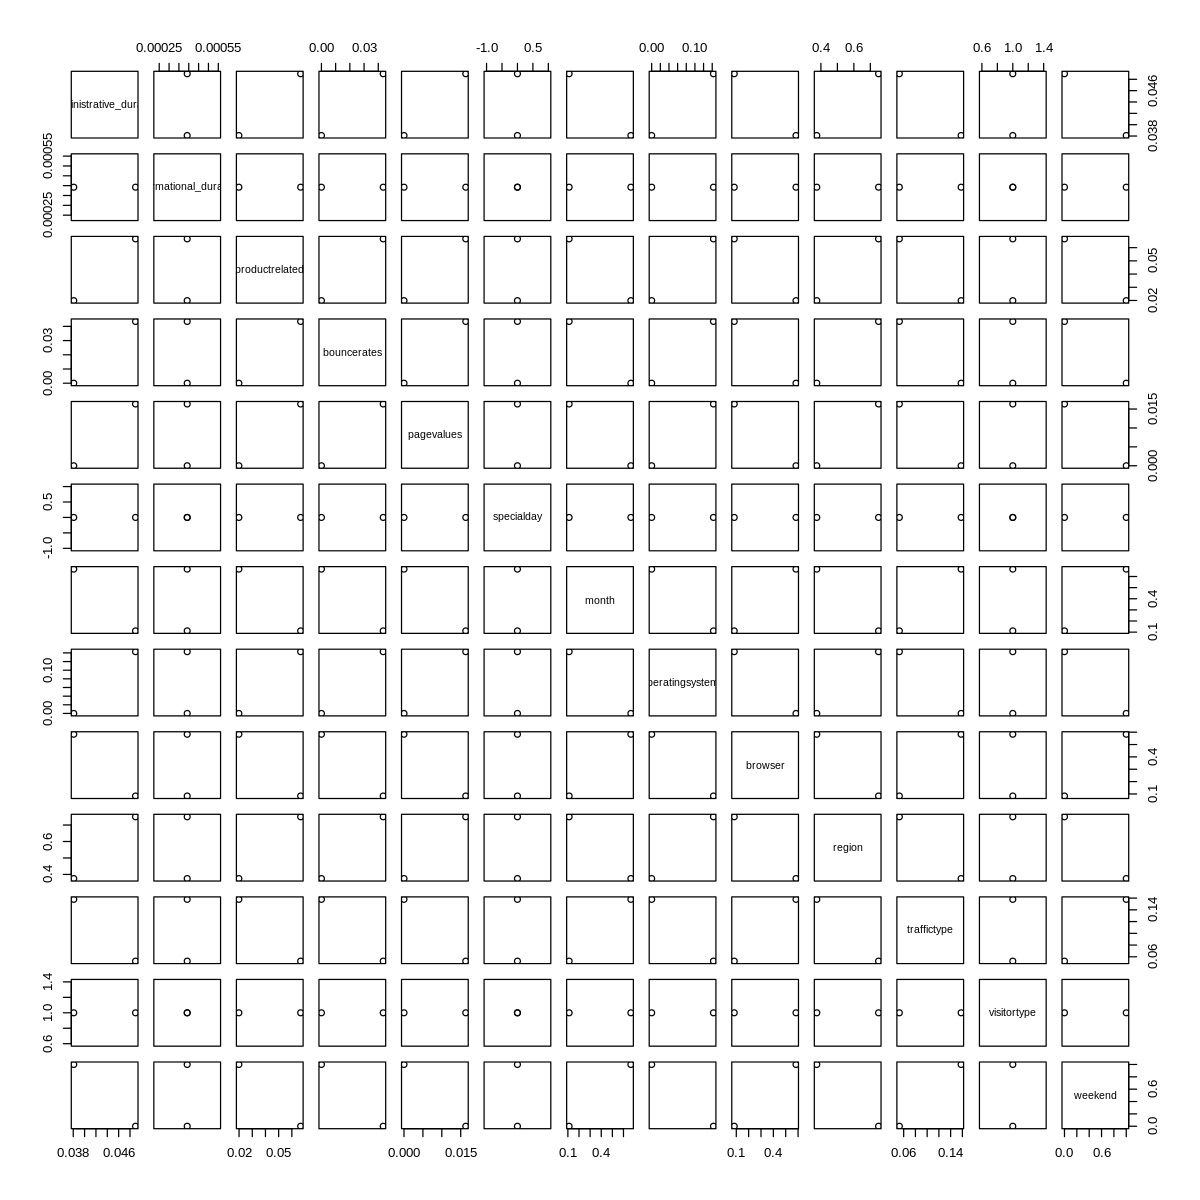

In [185]:
# Plotting to see how different variable data points have been distributed in clusters
# ---
# 
plot(data_new[c(3,4)], col = result$cluster)
plot(data_new[c(3,4)], col = data_class)

In [186]:
# Result of table shows that Cluster 1 corresponds to Virginica, 
# Cluster 2 corresponds to Versicolor and Cluster 3 to Setosa.
# ---
# 
table(result$cluster, data_class)

   data_class
    FALSE TRUE
  1  2249  514
  2  2357  499
  3  5685  895

##**Hierachical_clustering**

In [175]:
#Assigning a variable to numerical data
num_data <- subset(data_unique, select = -revenue)

In [176]:
# first we compute the euclidean distance
d <- dist(num_data, method = "euclidean")

In [177]:
# then we compute hierarchical clustering using the Ward method
hier <- hclust(d, method = "ward.D2" )

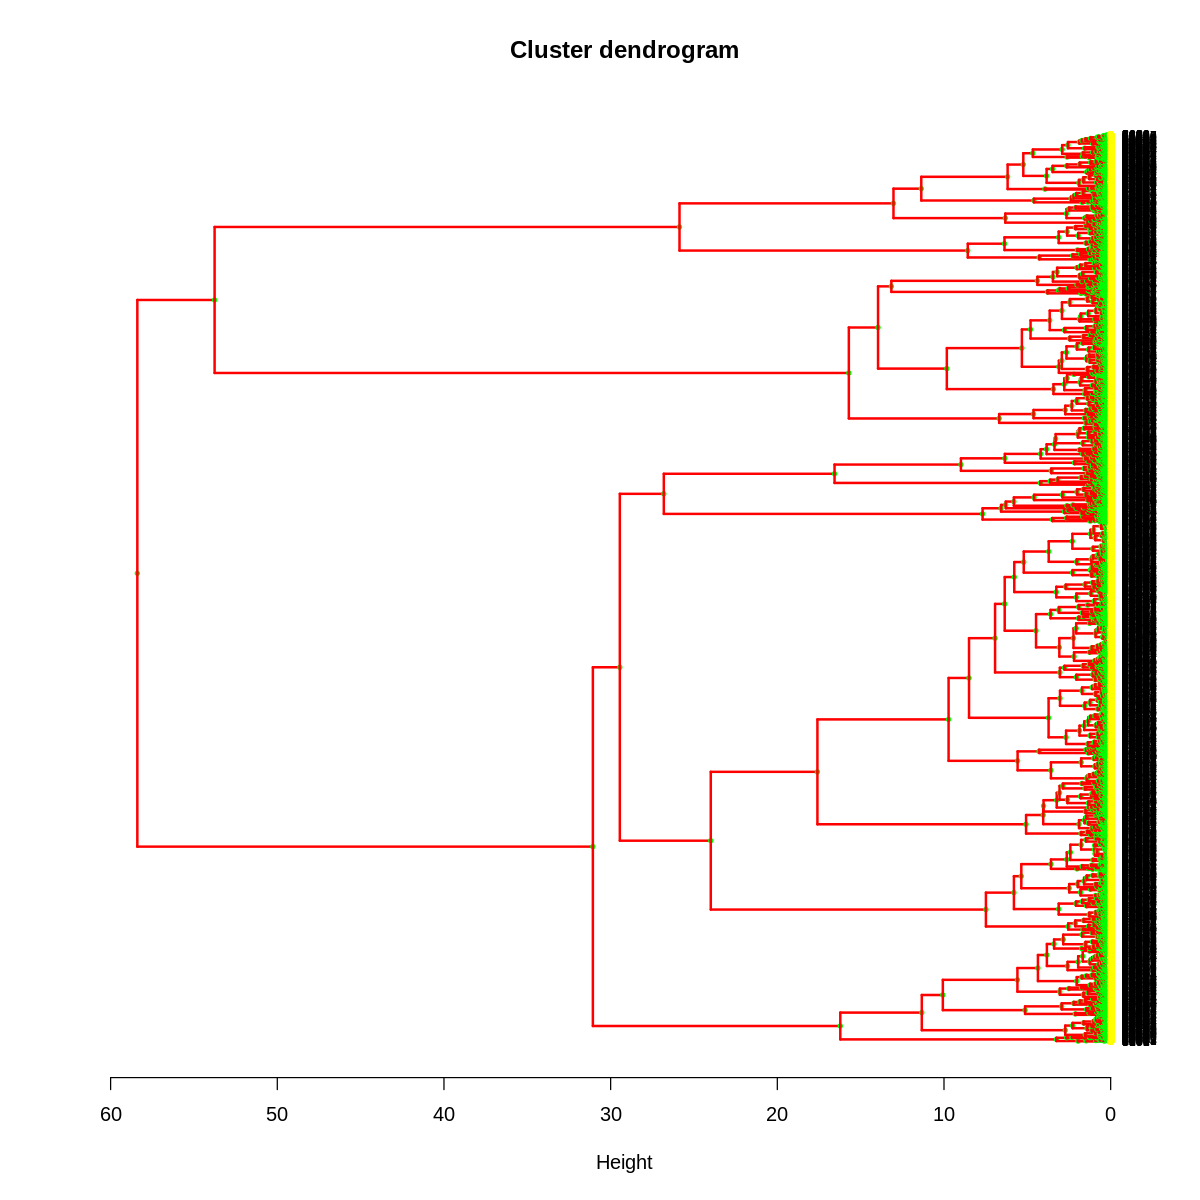

In [178]:
# Convert hclust into a dendrogram and plot
hcd <- as.dendrogram(hier)
# Define nodePar
nodePar <- list(lab.cex = 0.6, pch = c(20, 19),
                cex = 0.7, col = c("green","yellow"))
plot(hcd,  xlab = "Height", nodePar = nodePar, main = "Cluster dendrogram",
     edgePar = list(col = c("red","blue"), lwd = 2:1), horiz = TRUE)

#**Challenging the solution**
The data contained outliers and missing data. The null values were dropped causing us to lose some data and that might have affected our analysis and modelling and maybe we could have had better accuracies. Prescence of outliers may have also affected our modelling and analysis.

#**Follow up questions**
**Did we have the right data?**
 - Yes

**Did we have the right research question?**
 - Yes
 
**Did we have enough data?**
 - Yes, but maybe if we did not have any missing values modells could have performed better.

#**Conclusions**
 - Most customers have a false revenue.
 - Most customers use operating system 2.
 - Browser 2 is the most frequently used.
 - Region 1 is the most frequent.
 - Traffic type 2 is the most frequent.
 - Weekdays are more frequent than weekends.
 - The most frequent month is May followed by November.
 - Most visitors are returning visitors.
 
The accuracy of the supervised models are as follows;
- KNN - 87.78% before tuning and 87.67% after tuning.
- Decision Trees - 83.89%
- SVM - 88.9%
- Naive Bayes - 87.04%

#**Recommendations**
The company should use the SVM model to predict if the revenue is true or false.
The company should also concentrate on the most frequent variables for example, operation system 2, browser 2, etc.
